In [9]:
library(pheatmap)
library(RColorBrewer)
library(pvclust)
library(vegan)
library(UpSetR)
#source('scripts/color_palettes.R')
library(cowplot)
library(ggridges)
library(tidyverse)
library(data.table)
library(ape)
library(phangorn)
#source('scripts/working_genomes.R')
#length(genomes_keep)

# Phylogenemic concordance analysis

clean up the concord.cf.tree

In [328]:
# Function to clean up the support values in the Newick format data
clean_support_values <- function(newick_str) {
  # Pattern to match nodes with four support values and transform them to three
  pattern_four <- "(\\d+)/(\\d+)/(\\d+\\.?\\d*)/(\\d+\\.?\\d*)"
  # Transform four values to three by removing the second value
  cleaned_str <- gsub(pattern_four, "\\1/\\3/\\4", newick_str)
  
  # Pattern to match nodes with more than three support values and handle them
  pattern_more <- "(\\d+)/(\\d+\\.?\\d*)/(\\d+\\.?\\d*)/(\\d+\\.?\\d*)"
  cleaned_str <- gsub(pattern_more, "\\1/\\2/\\3", cleaned_str)
  
  return(cleaned_str)
}

# Path to the original file
file_path <- "concord.cf.tree"

# Read the file content
newick_content <- readLines(file_path, warn = FALSE)
newick_content <- paste(newick_content, collapse = "")

# Clean the content
cleaned_content <- clean_support_values(newick_content)

# Save the cleaned content back to a file
cleaned_file_path <- "cleaned_concord.cf.tree"
writeLines(cleaned_content, cleaned_file_path)

cat("Cleaned file saved to:", cleaned_file_path, "\n")


Cleaned file saved to: cleaned_concord.cf.tree 


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



'data.frame':	67 obs. of  19 variables:
 $ ID    : int  71 72 73 74 75 76 77 78 79 80 ...
 $ gCF   : num  4.13 49.45 13.99 19.01 40.99 ...
 $ gCF_N : int  29 361 102 138 298 322 631 207 271 675 ...
 $ gDF1  : num  4.56 0.82 5.21 2.48 7.02 ...
 $ gDF1_N: int  32 6 38 18 51 58 1 80 99 11 ...
 $ gDF2  : num  66.24 7.26 3.02 1.38 1.79 ...
 $ gDF2_N: int  465 53 22 10 13 45 1 166 161 6 ...
 $ gDFP  : num  25.1 42.5 77.8 77.1 50.2 ...
 $ gDFP_N: int  176 310 567 560 365 307 94 264 191 41 ...
 $ gN    : int  702 730 729 726 727 732 727 717 722 733 ...
 $ sCF   : num  16.3 77.4 60.4 30.6 54.6 ...
 $ sCF_N : num  87.3 890.7 1423 545.5 992.1 ...
 $ sDF1  : num  73.69 3.96 22.32 42.77 18.66 ...
 $ sDF1_N: num  425.1 54.9 340.3 1149.4 335.4 ...
 $ sDF2  : num  10.1 18.6 17.3 26.6 26.7 ...
 $ sDF2_N: num  44.3 302.1 309.7 469.3 685 ...
 $ sN    : num  557 1248 2073 2164 2012 ...
 $ Label : int  100 100 95 100 100 100 100 99 100 100 ...
 $ Length: num  0.000852 0.012377 0.004676 0.017599 0.010672 ..

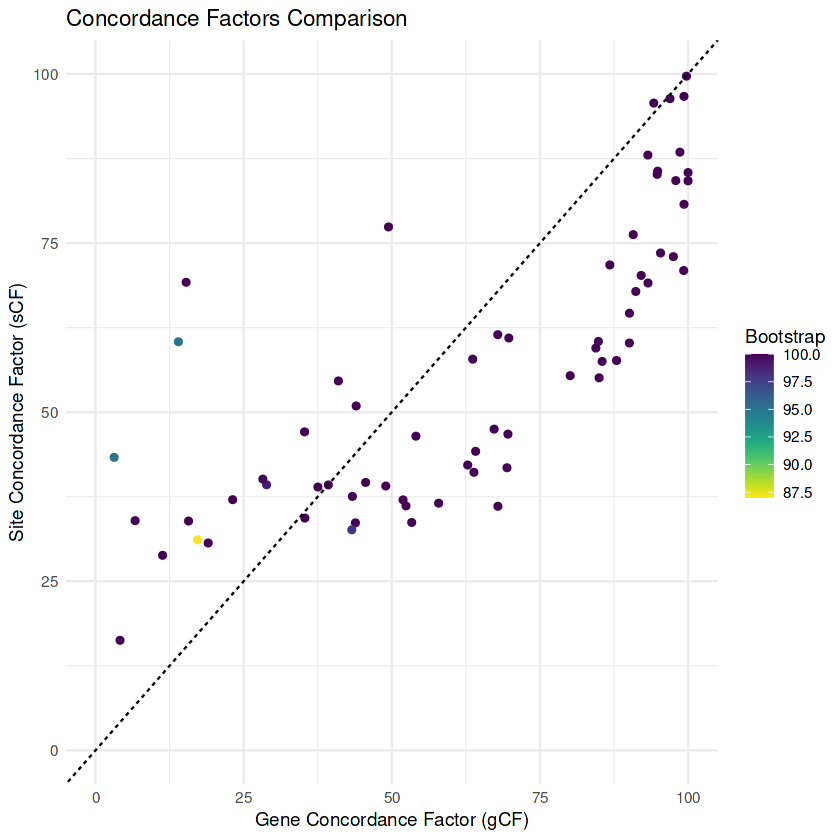

In [329]:
library(viridis)
library(ggplot2)
library(dplyr)
library(ggrepel)
library(GGally)
library(entropy)

# Read the data
d = read.delim("concord.cf.stat", header = T, comment.char='#')

# Check the structure of the data frame
str(d)

# Rename columns (if necessary)
names(d)[names(d) == "Label"] = "bootstrap"
# Note: We're not renaming sCF to keep it consistent with the original data

# Check the structure again after renaming
#str(d)

# Plot the values
ggplot(d, aes(x = gCF, y = sCF)) + 
    geom_point(aes(colour = bootstrap)) + 
    scale_colour_viridis(direction = -1) + 
    xlim(0, 100) +
    ylim(0, 100) +
    geom_abline(slope = 1, intercept = 0, linetype = "dashed") +
    labs(x = "Gene Concordance Factor (gCF)", 
         y = "Site Concordance Factor (sCF)",
         colour = "Bootstrap",
         title = "Concordance Factors Comparison") +
    theme_minimal()

# Display the first few rows of the data
#head(d)

In [330]:
d

ID  gCF    gCF_N gDF1  gDF1_N gDF2  gDF2_N gDFP  gDFP_N gN  sCF   sCF_N   
1   71  4.13   29    4.56  32    66.24 465    25.07 176    702 16.26    87.26
2   72 49.45  361    0.82   6     7.26  53    42.47 310    730 77.39   890.68
3   73 13.99  102    5.21  38     3.02  22    77.78 567    729 60.41  1422.99
4   74 19.01  138    2.48  18     1.38  10    77.13 560    726 30.65   545.50
5   75 40.99  298    7.02  51     1.79  13    50.21 365    727 54.62   992.10
6   76 43.99  322    7.92  58     6.15  45    41.94 307    732 50.92  1352.50
7   77 86.80  631    0.14   1     0.14   1    12.93  94    727 71.77  6110.41
8   78 28.87  207   11.16  80    23.15 166    36.82 264    717 39.26  3328.02
9   79 37.53  271   13.71  99    22.30 161    26.45 191    722 38.93  3884.46
10  80 92.09  675    1.50  11     0.82   6     5.59  41    733 70.22 11793.76
11  81 84.99  623    0.82   6     1.36  10    12.82  94    733 55.08 10582.09
12  82 52.39  384    4.09  30     7.09  52    36.43 267    733 36.13  5992.44
13  83 48.98  359    4.23  31     4.50  33    42.29 310    733 39.08  6272.84
14  84 67.27  487    3.87  28     1.80  13    27.07 196    724 47.49  8453.31
15  85 35.33  259   11.05  81    17.46 128    36.15 265    733 34.34  6258.17
16  86 91.18  662    0.00   0     0.00   0     8.82  64    726 67.85 15356.62
17  87 15.70  114   10.33  75     7.44  54    66.53 483    726 33.90  4989.00
18  88  6.68   49    9.00  66     4.23  31    80.08 587    733 33.96  4858.76
19  89 28.24  207    1.77  13     6.14  45    63.85 468    733 40.10  5657.65
20  90 62.81  456    1.38  10     2.34  17    33.47 243    726 42.18  5739.75
21  91 45.59  331    6.34  46    15.43 112    32.64 237    726 39.61  5124.65
22  92 43.86  318   17.24 125    12.28  89    26.62 193    725 33.63  4272.62
23  93 85.50  619    2.21  16     3.04  22     9.25  67    724 57.51  7491.35
24  94 90.75  657    1.66  12     3.73  27     3.87  28    724 76.26  6901.01
25  95 90.11  656    0.41   3     0.27   2     9.20  67    728 64.63  7861.12
26  96 80.11  584    0.96   7     1.51  11    17.42 127    729 55.40  7656.59
27  97 99.73  726    0.00   0     0.00   0     0.27   2    728 99.69 14902.35
28  98 43.35  313    1.80  13     1.94  14    52.91 382    722 37.54  5678.07
29  99 84.44  597    2.40  17     3.25  23     9.90  70    707 59.48  8975.44
30 100 39.29  286    0.69   5     0.55   4    59.48 433    728 39.24  5443.83
⋮  ⋮   ⋮      ⋮     ⋮     ⋮      ⋮     ⋮      ⋮     ⋮      ⋮   ⋮     ⋮       
38 108  64.15 467   22.53 164     4.53  33     8.79  64    728 44.21  7955.32
39 109  99.27 680    0.00   0     0.15   1     0.58   4    685 70.95 18457.31
40 110 100.00 687    0.00   0     0.00   0     0.00   0    687 85.44 25622.13
41 111  43.25 298   31.06 214    16.69 115     9.00  62    689 32.60  3237.04
42 112  54.07 392   14.76 107    12.69  92    18.48 134    725 46.45  4166.19
43 113  51.90 368   11.85  84     5.64  40    30.61 217    709 37.03  2697.30
44 114  63.66 431    0.15   1     2.07  14    34.12 231    677 57.84  4249.31
45 115  11.32  55    0.21   1    79.22 385     9.26  45    486 28.83  3152.63
46 116 100.00 599    0.00   0     0.00   0     0.00   0    599 84.21 27500.65
47 117  57.91 421   11.28  82     7.84  57    22.97 167    727 36.54  6886.65
48 118  97.52 709    0.00   0     0.28   2     2.20  16    727 73.00 18221.56
49 119  90.10 655    0.28   2     5.78  42     3.85  28    727 60.23  9412.40
50 120  67.91 493   14.74 107    12.81  93     4.55  33    726 36.08  4407.09
51 121  98.63 719    0.14   1     0.14   1     1.10   8    729 88.45 11546.86
52 122  63.86 463   11.17  81    13.24  96    11.72  85    725 41.11  1440.45
53 123  53.36 373   13.02  91    14.31 100    19.31 135    699 33.69  1067.40
54 124  93.24 676    1.10   8     0.97   7     4.69  34    725 69.10  8441.55
55 125  95.36 698    1.91  14     1.50  11     1.23   9    732 73.54 10782.72
56 126  94.79 691    1.65  12     2.06  15     1.51  11    729 85.17  6811.46
57 127  94.22 685    3.30

Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


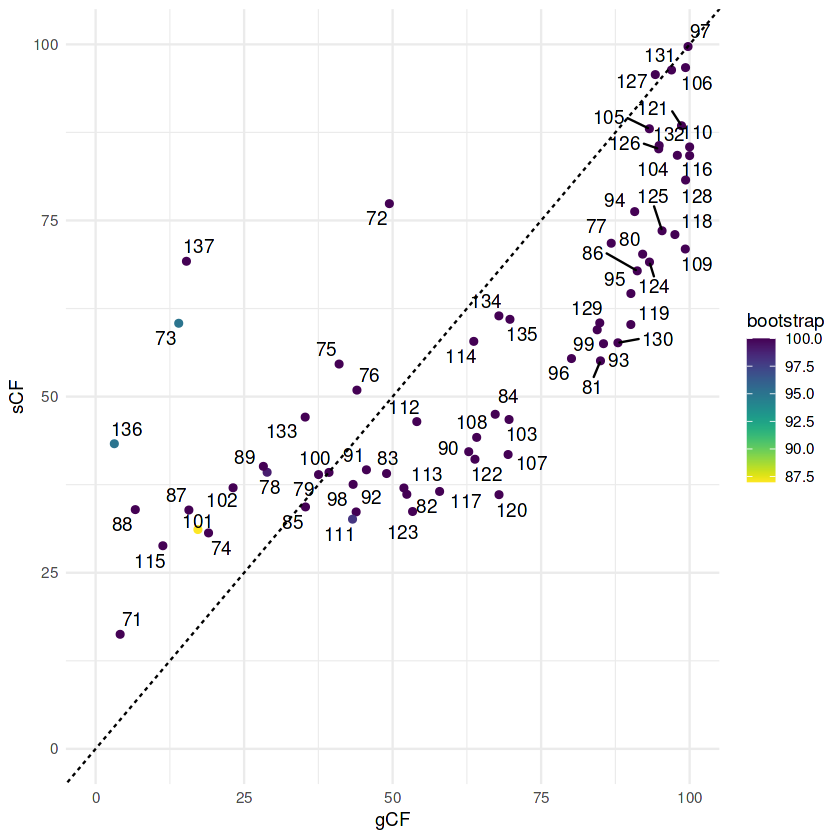

In [331]:
ggplot(d, aes(x = gCF, y = sCF, label = ID)) + 
    geom_point(aes(colour = bootstrap)) + 
    scale_colour_viridis(direction = -1) + 
    xlim(0, 100) +
    ylim(0, 100) +
    geom_abline(slope = 1, intercept = 0, linetype = "dashed") +
    geom_text_repel()+
    theme_minimal()

In [332]:
chisq = function(DF1, DF2, N){
    tryCatch({
        counts <- c(round(DF1*N)/100, round(DF2*N)/100)
        if(sum(counts) < 20) {  # Use Fisher's exact test for small samples
            fisher.test(matrix(counts, nrow=2))$p.value
        } else {
            chisq.test(counts)$p.value
        }
    },
    error = function(err) {
        return(1.0)
    })
}

#dplyr::last_dplyr_warnings(n = 10)

e = d %>% 
    group_by(ID) %>%
    mutate(gEF_p = chisq(gDF1, gDF2, gN)) %>%
    mutate(sEF_p = chisq(sDF1, sDF2, sN))

e_sig <- subset(data.frame(e), (gEF_p < 0.05 | sEF_p < 0.05))
e_sig
write.csv(e_sig, "ILS_sig.csv", row.names = F)

ID  gCF    gCF_N gDF1  gDF1_N gDF2  gDF2_N gDFP  gDFP_N gN  ⋯ sCF_N    sDF1 
1   71   4.13  29    4.56  32    66.24 465    25.07 176    702 ⋯    87.26 73.69
2   72  49.45 361    0.82   6     7.26  53    42.47 310    730 ⋯   890.68  3.96
3   73  13.99 102    5.21  38     3.02  22    77.78 567    729 ⋯  1422.99 22.32
4   74  19.01 138    2.48  18     1.38  10    77.13 560    726 ⋯   545.50 42.77
5   75  40.99 298    7.02  51     1.79  13    50.21 365    727 ⋯   992.10 18.66
6   76  43.99 322    7.92  58     6.15  45    41.94 307    732 ⋯  1352.50 19.11
7   77  86.80 631    0.14   1     0.14   1    12.93  94    727 ⋯  6110.41 16.40
8   78  28.87 207   11.16  80    23.15 166    36.82 264    717 ⋯  3328.02 26.83
9   79  37.53 271   13.71  99    22.30 161    26.45 191    722 ⋯  3884.46 27.25
12  82  52.39 384    4.09  30     7.09  52    36.43 267    733 ⋯  5992.44 27.41
13  83  48.98 359    4.23  31     4.50  33    42.29 310    733 ⋯  6272.84 26.36
14  84  67.27 487    3.87  28     1.80  13    27.07 196    724 ⋯  8453.31 27.87
15  85  35.33 259   11.05  81    17.46 128    36.15 265    733 ⋯  6258.17 30.96
17  87  15.70 114   10.33  75     7.44  54    66.53 483    726 ⋯  4989.00 34.59
18  88   6.68  49    9.00  66     4.23  31    80.08 587    733 ⋯  4858.76 34.74
19  89  28.24 207    1.77  13     6.14  45    63.85 468    733 ⋯  5657.65 27.46
20  90  62.81 456    1.38  10     2.34  17    33.47 243    726 ⋯  5739.75 30.17
21  91  45.59 331    6.34  46    15.43 112    32.64 237    726 ⋯  5124.65 26.53
22  92  43.86 318   17.24 125    12.28  89    26.62 193    725 ⋯  4272.62 37.27
23  93  85.50 619    2.21  16     3.04  22     9.25  67    724 ⋯  7491.35 19.18
24  94  90.75 657    1.66  12     3.73  27     3.87  28    724 ⋯  6901.01 11.47
27  97  99.73 726    0.00   0     0.00   0     0.27   2    728 ⋯ 14902.35  0.05
28  98  43.35 313    1.80  13     1.94  14    52.91 382    722 ⋯  5678.07 33.95
29  99  84.44 597    2.40  17     3.25  23     9.90  70    707 ⋯  8975.44 19.49
30 100  39.29 286    0.69   5     0.55   4    59.48 433    728 ⋯  5443.83 33.64
31 101  17.22 125   15.15 110     7.02  51    60.61 440    726 ⋯  4184.89 38.05
32 102  23.14 159   13.39  92    10.92  75    52.55 361    687 ⋯  5035.00 37.69
33 103  69.60 506    0.41   3     0.96   7    29.02 211    727 ⋯  6452.35 23.28
34 104  97.93 711    0.28   2     0.28   2     1.52  11    726 ⋯ 13467.79  7.09
36 106  99.31 723    0.00   0     0.00   0     0.69   5    728 ⋯ 26180.30  1.54
38 108  64.15 467   22.53 164     4.53  33     8.79  64    728 ⋯  7955.32 33.56
40 110 100.00 687    0.00   0     0.00   0     0.00   0    687 ⋯ 25622.13  7.04
41 111  43.25 298   31.06 214    16.69 115     9.00  62    689 ⋯  3237.04 37.10
43 113  51.90 368   11.85  84     5.64  40    30.61 217    709 ⋯  2697.30 37.92
44 114  63.66 431    0.15   1     2.07  14    34.12 231    677 ⋯  4249.31 17.37
45 115  11.32  55    0.21   1    79.22 385     9.26  45    486 ⋯  3152.63 14.71
46 116 100.00 599    0.00   0     0.00   0     0.00   0    599 ⋯ 27500.65  7.30
47 117  57.91 421   11.28  82     7.84  57    22.97 167    727 ⋯  6886.65 35.11
48 118  97.52 709    0.00   0     0.28   2     2.20  16    727 ⋯ 18221.56 12.42
49 119  90.10 655    0.28   2     5.78  42     3.85  28    727 ⋯  9412.40 14.20
51 121  98.63 719    0.14   1     0.14   1     1.10   8    729 ⋯ 11546.86  4.67
52 122  63.86 463   11.17  81    13.24  96    11.72  85    725 ⋯  1440.45 37.10
53 123  53.36 373   13.02  91    14.31 100    19.31 135    699 ⋯  1067.40 46.99
54 124  93.24 676    1.10   8     0.97   7     4.69  34    725 ⋯  8441.55 13.56
56 126  94.79 691    1.65  12     2.06  15     1.51  11    729 ⋯  6811.46  8.59
59 129  84.87 617    9.22  67     5.50  40     0.41   3    727 ⋯  5768.16 20.67
60 130  87.93 641    1.92  14     2.88  21     7.27  53    729 ⋯  5704.45 18.74
61 131  96.95 700    0.69   5     0.97   7     1.39  10    722 ⋯  8287.47  2.39
62 132  94.87 666    0.28   2     0.57   4     4.27  30    702 ⋯  8555.78  8.44
63 

In [333]:
# First, let's define the IC function
IC = function(CF, DF1, DF2, N){
    
    # convert to counts
    X = CF * N / 100
    Y = max(DF1, DF2) * N / 100
        
    pX = X/(X+Y)
    pY = Y/(X+Y)
    
    IC = 1 + pX * log2(pX) +
             pY * log2(pY)
    return(IC)
}

# Now, let's modify the data manipulation part
e = e %>% 
    group_by(ID) %>%
    mutate(gIC = IC(gCF, gDF1, gDF2, bootstrap)) %>%  # Changed gN to bootstrap
    mutate(sIC = IC(sCF, sDF1, sDF2, sN))

In [334]:
ENT = function(CF, DF1, DF2, N){
    CF = CF * N / 100
    DF1 = DF1 * N / 100
    DF2 = DF2 * N / 100
    return(entropy(c(CF, DF1, DF2)))
}
ENTC = function(CF, DF1, DF2, N){
    maxent = 1.098612
    CF = CF * N / 100
    DF1 = DF1 * N / 100
    DF2 = DF2 * N / 100
    ent = entropy(c(CF, DF1, DF2))
    entc = 1 - (ent / maxent)
    return(entc)
}

e = e %>% 
    group_by(ID) %>%
    mutate(sENT = ENT(sCF, sDF1, sDF2, sN)) %>%
    mutate(sENTC = ENTC(sCF, sDF1, sDF2, sN))

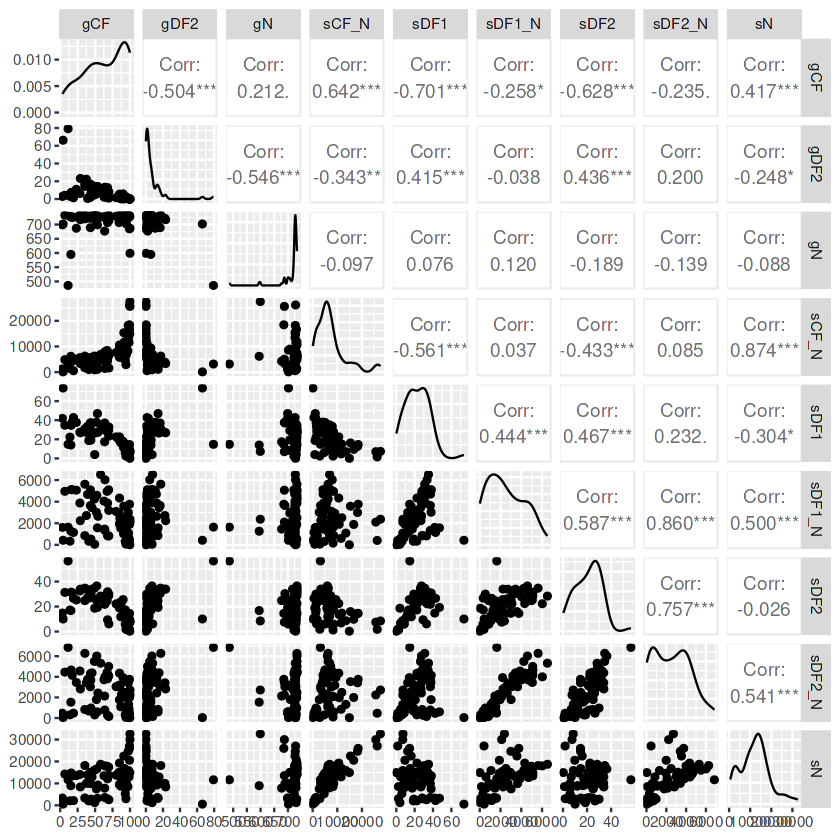

In [335]:
ggpairs(e, columns = c(2, 6, 10, 12, 13, 14, 15, 16, 17))

# Functional gene diversity test

In [62]:
summary(manova_model_ambrosia)

          Df  Pillai approx F num Df den Df   Pr(>F)   
Ambrosia   2 0.20803   3.7729      4    130 0.006159 **
Residuals 65                                           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [48]:
# Load necessary libraries
library(car)
library(dplyr)

# Load the dataset
data_path <- "all_diversity_indices_with_acc_ambrosia.csv"
data <- read.csv(data_path)

# Function to perform MANOVA and return the filtered results for Ambrosia and Family within a specific tool
perform_manova_for_tool <- function(tool_name, data) {
  # Filter data for the specific tool
  tool_data <- data %>% filter(tool == tool_name)
  
  if (nrow(tool_data) < 2) {
    return(list(ambrosia_result = NULL, family_result = NULL))
  }
  
  # MANOVA for Ambrosia lifestyle using default summary
  ambrosia_results <- tryCatch({
    manova_model_ambrosia <- manova(cbind(S, H) ~ Ambrosia, data = tool_data)
    summary(manova_model_ambrosia)
  }, error = function(e) NULL)
  
  # MANOVA for Family using default summary
  family_results <- tryCatch({
    manova_model_family <- manova(cbind(S, H) ~ Family, data = tool_data)
    summary(manova_model_family)
  }, error = function(e) NULL)
  
  return(list(ambrosia_result = ambrosia_results, family_result = family_results))
}

# Specify the tools for the analysis
tools <- c('CAZyme', 'Cellulose', 'Chitin', 'CSEPs', 'Cytochrome', 'P450', 'FCWDE', 'GH19',
           'Glucan', 'Hemicellulose', 'Lignin', 'Lipase', 'Mannan', 'PCWDE', 'Pectin',
           'Peptidases', 'Peptidoglycan', 'Resistance', 'Sucrose', 'Virulence', 'GPCRs')

# Initialize lists to hold results
ambrosia_results <- list()
family_results <- list()

# Perform MANOVA for each tool and collect filtered results
for (tool in tools) {
  result <- perform_manova_for_tool(tool, data)
  if (!is.null(result$ambrosia_result)) {
    ambrosia_results[[tool]] <- result$ambrosia_result
  }
  if (!is.null(result$family_result)) {
    family_results[[tool]] <- result$family_result
  }
}

# Function to extract MANOVA test statistics into a data frame with the tool name
extract_manova_stats <- function(manova_summary, factor_name, tool_name) {
  if (is.null(manova_summary)) {
    return(NULL)
  }
  stats <- as.data.frame(manova_summary$stats)
  stats$Factor <- factor_name
  stats$Tool <- tool_name
  return(stats)
}

# Extract and store MANOVA results for Ambrosia and Family, including the tool name
ambrosia_results_df <- do.call(rbind, lapply(names(ambrosia_results), function(tool) {
  extract_manova_stats(ambrosia_results[[tool]], "Ambrosia", tool)
}))

family_results_df <- do.call(rbind, lapply(names(family_results), function(tool) {
  extract_manova_stats(family_results[[tool]], "Family", tool)
}))

# Export the results to CSV
ambrosia_csv_path <- "MANOVA_ambrosia_results.csv"
family_csv_path <- "MANOVA_family_results.csv"

write.csv(ambrosia_results_df, ambrosia_csv_path, row.names = FALSE)
write.csv(family_results_df, family_csv_path, row.names = FALSE)

ambrosia_csv_path
family_csv_path


[1] "MANOVA_ambrosia_results.csv"

[1] "MANOVA_family_results.csv"

In [52]:
manova_model_ambrosia <- manova(cbind(S, H) ~ Ambrosia, data = tool_data)

ERROR: Error in eval(fcall, parent.frame()): object 'tool_data' not found


# Ancestral state reconstruction

In [8]:
# Load necessary libraries
library(ape)
library(phytools)
library(phangorn)

# Read the phylogenetic tree
tree <- read.tree("concat_rooted_ultra.contree")

# Read the genome feature data
data <- read.csv("Ambrosia fungi genome species data - ancestral.csv")

# Ensure data is properly formatted
head(data)

# Preparing the data for ancestral state reconstruction
# Assuming the first column is species names and the second column is the trait of interest
species <- data[, 1]
traits <- data[, 2]
names(traits) <- species

# Convert the traits to a factor (if necessary)
traits <- as.factor(traits)

# Method 3: Maximum-likelihood
asr_max_likelihood <- ace(traits, tree, type = "discrete")

# Simulate multiple trees with make.simmap
mtrees <- make.simmap(tree, traits, model = "ER", nsim = 1000)

# Summarize the simulated mappings
pd <- summary(mtrees)

# Define colors
cols <- setNames(c("black", "green"), levels(traits))

# Export results to PDF
pdf("ancestral_state_reconstruction_simmap.pdf", width = 14, height = 14)

# Plot the phylogenetic tree with maximum-likelihood
plot.phylo(tree, main = "Maximum-likelihood Ancestral State Reconstruction", cex = 1.2, adj = 0.1, no.margin = FALSE)
nodelabels(pie = asr_max_likelihood$lik.anc, piecol = cols, cex = 0.3)

# Add legend to the first tree
legend("bottomleft", legend = levels(traits), fill = cols, title = "Ambrosia", cex = 0.8)

# Plot the summary of the simulated mappings with smaller pie charts
plot(pd, fsize = 1.2, ftype = "i", colors = cols, ylim = c(-2, Ntip(tree)), pch = 21, bg = cols, cex = 0.3)
add.simmap.legend(colors = cols[2:1], prompt = FALSE, x = 0, y = 0, vertical = TRUE)

# Add subtitle to the second tree
title(sub = "Stochastic Character Mapping for Ancestral State Reconstruction", line = 1)

dev.off()

print("PDF with ancestral state reconstruction plots and simmap results saved as 'ancestral_state_reconstruction_simmap.pdf'")

FungusName_Strain                  Ambrosia
1 Berkeleyomyces_basicola_CMW49352   N       
2 Bretziella_fagacearum_C519         N       
3 Catunica_adiposa_CBS136_34         N       
4 Ceratocystis_cubensis_C1811        N       
5 Ceratocystis_variospora_C1843      N       
6 Huntiella_moniliformis_2021_000010 N

make.simmap is sampling character histories conditioned on
the transition matrix

Q =
          N         Y
N -1.341709  1.341709
Y  1.341709 -1.341709
(estimated using likelihood);
and (mean) root node prior probabilities
pi =
  N   Y 
0.5 0.5 


Done.



png 
  2

[1] "PDF with ancestral state reconstruction plots and simmap results saved as 'ancestral_state_reconstruction_simmap.pdf'"


make.simmap is sampling character histories conditioned on
the transition matrix

Q =
          N         Y
N -1.341709  1.341709
Y  1.341709 -1.341709
(estimated using likelihood);
and (mean) root node prior probabilities
pi =
  N   Y 
0.5 0.5 


Done.



100 trees with a mapped discrete character with states:
 N, Y 

trees have 12.84 changes between states on average

changes are of the following types:
     N,Y  Y,N
x->y 8.7 4.14

mean total time spent in each state is:
             N         Y    total
raw  7.5311359 1.7952892 9.326425
prop 0.8075051 0.1924949 1.000000


png 
  2

sorry - this might take a while; please be patient



png 
  2

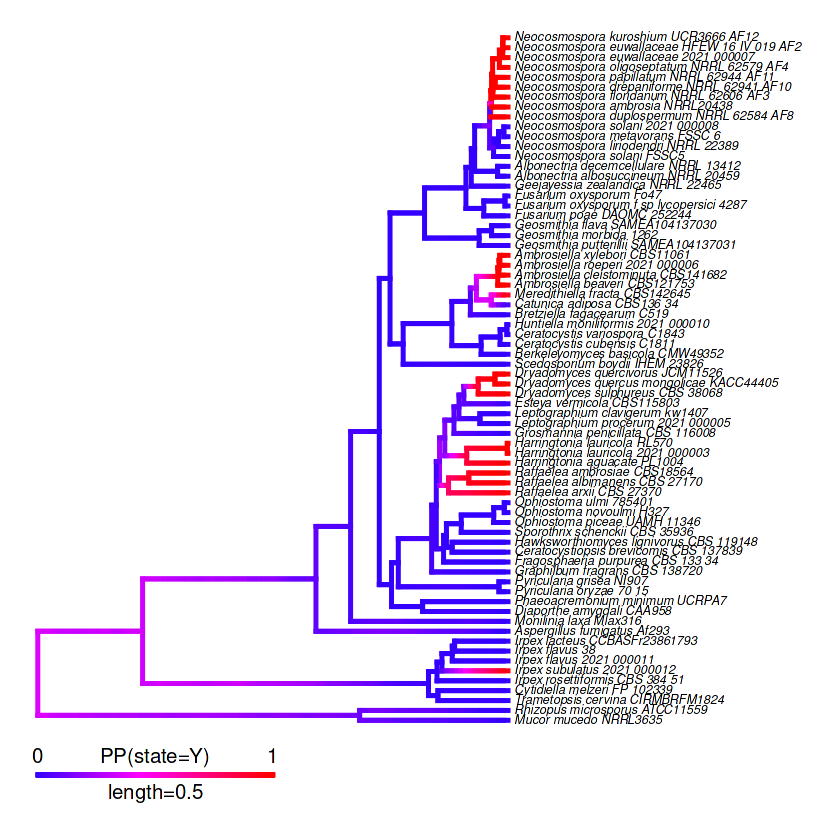

In [21]:
# Load necessary packages
library(ape)
library(phytools)

# Read the phylogenetic tree
tree <- read.tree("concat_rooted_ultra.contree")

# Prepare the trait data
traits <- read.csv("Ambrosia fungi genome species data - ancestral.csv", header = TRUE, row.names = 1)

# Convert trait data to a factor (if it's discrete)
traits$Ambrosia <- as.factor(traits$Ambrosia)

# Ensure the row names in the trait data match the tip labels in the tree
trait_vector <- setNames(traits$Ambrosia, rownames(traits))

# Perform ancestral state reconstruction using phytools
mtrees<-make.simmap(tree, trait_vector, model="ER", nsim=100)
anc_states <- ace(trait_vector, tree, type = "discrete", model = "ER")

# # Open a PDF device
# pdf("ancestral_state_reconstruction.pdf", width = 12, height = 12)

# # Plot the tree with ancestral states
# plotTree(tree, ftype = "i", fsize = 0.7)
# nodelabels(pie = anc_states$lik.anc, piecol = c("blue", "red"), cex = 0.5)
# tiplabels(pie = to.matrix(trait_vector, c("N", "Y")), piecol = c("blue", "red"), cex = 0.5)

# # Close the PDF device
# dev.off()

pd<-summary(mtrees)
pd

# Define colors for the states
cols <- setNames(c("black", "white"), levels(trait_vector))

# Open a PDF device
pdf("ancestral_state_reconstruction_sim.pdf", width = 12, height = 12)

# Plot the summarized tree with ancestral states
plot(pd, fsize = .7, ftype = "i", colors = cols, ylim = c(0, Ntip(tree)))
add.simmap.legend(colors = cols[1:2], prompt = FALSE, x = 0, y = -4, vertical = FALSE)

# Close the PDF device
dev.off()


obj<-densityMap(mtrees,states=levels(trait_vector)[1:2],plot=FALSE)
plot(obj,fsize=c(0.6,1))



# Open a PDF device
pdf("ancestral_state_reconstruction_sim_dotTree.pdf", width = 12, height = 12)

cols<-setNames(c("black","green"),levels(trait_vector))

dotTree(tree,trait_vector,colors=cols,fsize=0.7,ftype="i",
    legend=FALSE)
add.simmap.legend(x=0,y=-4,colors=cols,prompt=FALSE,
    vertical=FALSE,shape="circle")
nulo<-sapply(mtrees,markChanges,sapply(cols,
    make.transparent,0.1))
add.simmap.legend(colors=sapply(setNames(cols[2:1],
    c("bite->suction","suction->bite")),
    make.transparent,0.1),prompt=FALSE,x=50,y=-4,
    vertical=FALSE)

# Close the PDF device
dev.off()

# Gain/Loss of genes


In [10]:
library(dplyr)
library(tidyr)

# Load your dataset
orthog_long <- read.csv('Orthogroups_meta_db_tool_annot_toolMod_CZAyme_substrate.csv')

# Define tools factor
tools <- factor(c('CAZyme','Cellulose','Chitin','CSEPs','Cytochrome P450',
                  'FCWDE','GH19','Glucan','Hemicellulose','Lignin','Lipase',
                  'Mannan','PCWDE','Pectin','Peptidases','Peptidoglycan',
                  'Resistance','Sucrose','Virulence', 'GPCRs'))

# Create tool_final column with additional checks
orthog_long <- orthog_long %>%
  mutate(tool_final = ifelse(!is.na(tool_substrate) & tool_substrate != "", tool_substrate, tool))

# Perform the required transformations
df <- orthog_long %>%
  select(Orthogroup, n_genes_genome, Ambrosia, acc, tool_final) %>%
  distinct() %>%
  mutate(Ambrosia = ifelse(Ambrosia == 'N', 'Non_Ambrosia', 'Ambrosia')) %>%
  group_by(Ambrosia, tool_final, Orthogroup) %>%
  summarize(mean = median(n_genes_genome)) %>%
  spread(Ambrosia, mean) %>%
  replace_na(list(Ambrosia = 0, Non_Ambrosia = 0)) %>%
  group_by(tool_final, Ambrosia, Non_Ambrosia) %>%
  mutate(NumberGenes = n()) %>%
  ungroup() %>% 
  select(-Orthogroup) %>%
  distinct()

# Perform the required transformations for df_ortho
df_ortho <- orthog_long %>%
  select(Orthogroup, n_genes_genome, Ambrosia, acc, tool_final) %>%
  distinct() %>%
  mutate(Ambrosia = ifelse(Ambrosia == 'N', 'Non_Ambrosia', 'Ambrosia')) %>%
  group_by(Ambrosia, tool_final, Orthogroup) %>%
  summarize(mean = median(n_genes_genome)) %>%
  spread(Ambrosia, mean) %>%
  replace_na(list(Ambrosia = 0, Non_Ambrosia = 0)) %>%
  group_by(tool_final, Ambrosia, Non_Ambrosia) %>%
  mutate(NumberGenes = n()) %>%
  ungroup() %>% 
  distinct()

# Calculate the ratios for each tool_final
ratios_df <- lapply(levels(tools), function(x){
  # Loss
  a <- df %>% dplyr::filter(tool_final == x) %>%
    filter(Ambrosia == 0 , Non_Ambrosia > 0) %>%
    summarize(value = sum(NumberGenes)) %>%
    mutate(tool_final = x) %>%
    mutate(type = 'Loss')
  
  # Gain
  b <- df %>% dplyr::filter(tool_final == x) %>%
    filter(Ambrosia > 0 , Non_Ambrosia == 0) %>%
    summarize(value = sum(NumberGenes)) %>%
    mutate(tool_final = x) %>%
    mutate(type = 'Gain')
  
  # Combine results
  bind_rows(a, b) %>% spread(type, value) %>%
    mutate(ratio = Gain / Loss) %>%
    arrange(ratio)
}) %>% bind_rows()

# Merge ratios_df with df
df <- df %>% 
  left_join(., ratios_df, by = 'tool_final') %>%
  mutate(label = paste0(tool_final, " (", Gain, ":", Loss, ")"))

# Display the final ratios dataframe
print(ratios_df)

# Write the df_ortho to a CSV file
write.csv(df_ortho, "Orthogroups_meta_db_tool_annot_gainloss_label_orthogroup.csv", row.names = FALSE)


`summarise()` has grouped output by 'Ambrosia', 'tool_final'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'Ambrosia', 'tool_final'. You can override
using the `.groups` argument.


# A tibble: 20 × 4
   tool_final       Gain  Loss ratio
   <chr>           <int> <int> <dbl>
 1 CAZyme            619   554 1.12 
 2 Cellulose          37    46 0.804
 3 Chitin             26    25 1.04 
 4 CSEPs             215   271 0.793
 5 Cytochrome P450   415   686 0.605
 6 FCWDE              66    70 0.943
 7 GH19              119   238 0.5  
 8 Glucan             21    25 0.84 
 9 GPCRs              18    22 0.818
10 Hemicellulose      23    27 0.852
11 Lignin              4     8 0.5  
12 Lipase           1119  2258 0.496
13 Mannan             13    17 0.765
14 PCWDE             110   123 0.894
15 Pectin             31    26 1.19 
16 Peptidases        679  1625 0.418
17 Peptidoglycan       1     3 0.333
18 Resistance        594   536 1.11 
19 Sucrose             2     1 2    
20 Virulence        1169  2562 0.456


In [175]:
# library(dplyr)
# library(tidyr)

# orthog_long <- read.csv('Orthogroups_meta_db_tool_annot_toolMod_CZAyme_substrate.csv')
# unique(orthog_long$tool)
# tools <- factor(c('CAZyme','Cellulose','Chitin','CSEPs','Cytochrome P450',
#                   'FCWDE','GH19','Glucan','Hemicellulose','Lignin','Lipase',
#                   'Mannan','PCWDE','Pectin','Peptidases','Peptidoglycan',
#                   'Resistance','Sucrose','Virulence'))

# # Remove rows where Ambrosia == 'outgroup'
# orthog_long <- orthog_long %>%
#   filter(Ambrosia != 'outgroup')

# # Create tool_final column with additional checks
# orthog_long <- orthog_long %>%
#   mutate(tool_final = ifelse(!is.na(tool_substrate) & tool_substrate != "", tool_substrate, tool))

# # Ensure tool_final is not empty
# orthog_long <- orthog_long %>%
#   mutate(tool_final = ifelse(is.na(tool_final) | tool_final == "", tool, tool_final))

# df <- orthog_long %>%
#   select(Orthogroup, n_genes_genome, Ambrosia, acc, tool_final) %>%
#   distinct() %>%
#   mutate(Ambrosia = ifelse(Ambrosia %in% c('N'), 
#                                yes = 'Non_Ambrosia',
#                                no = 'Ambrosia')) %>%
#   group_by(Ambrosia, tool_final, Orthogroup) %>%
#   summarize(mean = median(n_genes_genome)) %>%
#   spread(Ambrosia, mean) %>%
#   replace_na(list(Ambrosia = 0, Non_Ambrosia = 0)) %>%
#   group_by(tool_final, Ambrosia, Non_Ambrosia) %>%
#   mutate(NumberGenes = length(Non_Ambrosia)) %>%
#   ungroup() %>% 
#   select(-Orthogroup) %>%
#   distinct()


# df_ortho <- orthog_long %>%
#   select(Orthogroup, n_genes_genome, Ambrosia, acc, tool_final) %>%
#   distinct() %>%
#   mutate(Ambrosia = ifelse(Ambrosia %in% c('N'), 
#                                yes = 'Non_Ambrosia',
#                                no = 'Ambrosia')) %>%
#   group_by(Ambrosia, tool_final, Orthogroup) %>%
#   summarize(mean = median(n_genes_genome)) %>%
#   spread(Ambrosia, mean) %>%
#   replace_na(list(Ambrosia = 0, Non_Ambrosia = 0)) %>%
#   group_by(tool_final, Ambrosia, Non_Ambrosia) %>%
#   mutate(NumberGenes = length(Non_Ambrosia)) %>%
#   ungroup() %>% 
# #  select(-Orthogroup) %>%
#   distinct()


# ratios_df <- lapply(tools, function(x){
# ## loss
# a <- df %>% dplyr::filter(tool_final == x) %>%
#   filter(Ambrosia == 0 , Non_Ambrosia > 0) %>%
#   summarize(value = sum(NumberGenes)) %>%
#   mutate(tool_final = x) %>%
#   mutate(type = 'Loss')

# ## GAIN
# b <- df %>% dplyr::filter(tool_final == x) %>%
#   filter(Ambrosia > 0 , Non_Ambrosia == 0) %>%
#   summarize(value = sum(NumberGenes)) %>%
#   mutate(tool_final = x) %>%
#   mutate(type = 'Gain')


# bind_rows(a, b) %>% spread(type, value) %>%
#   mutate(ratio = Gain/Loss) %>%
#   arrange(ratio)


# }) %>% bind_rows()


# df <- df %>% 
#   left_join(., ratios_df, by = 'tool_final') %>%
#   mutate(label = paste0(tool_final, " (", Gain, ":", Loss, ")"))

# ratios_df
# #df
# write.csv(df_ortho, "Orthogroups_meta_db_tool_annot_gainloss_label_orthogroup.csv", row.names = FALSE)

[1] "Virulence"       "Lipase"          "CAZyme"          "Cytochrome P450"
[5] "Resistance"      "CSEPs"           "Peptidases"      "GH19"

`summarise()` has grouped output by 'Ambrosia', 'tool_final'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'Ambrosia', 'tool_final'. You can override
using the `.groups` argument.


tool_final      Gain Loss ratio    
1  CAZyme          293   653 0.4486983
2  Cellulose        15    47 0.3191489
3  Chitin           13    25 0.5200000
4  CSEPs            81   308 0.2629870
5  Cytochrome P450 184   750 0.2453333
6  FCWDE            22    70 0.3142857
7  GH19             51   249 0.2048193
8  Glucan            2    25 0.0800000
9  Hemicellulose    11    29 0.3793103
10 Lignin            3     9 0.3333333
11 Lipase          601  2511 0.2393469
12 Mannan            6    17 0.3529412
13 PCWDE            54   131 0.4122137
14 Pectin           14    29 0.4827586
15 Peptidases      385  1727 0.2229299
16 Peptidoglycan     1     3 0.3333333
17 Resistance      332   615 0.5398374
18 Sucrose           1     2 0.5000000
19 Virulence       590  2803 0.2104888

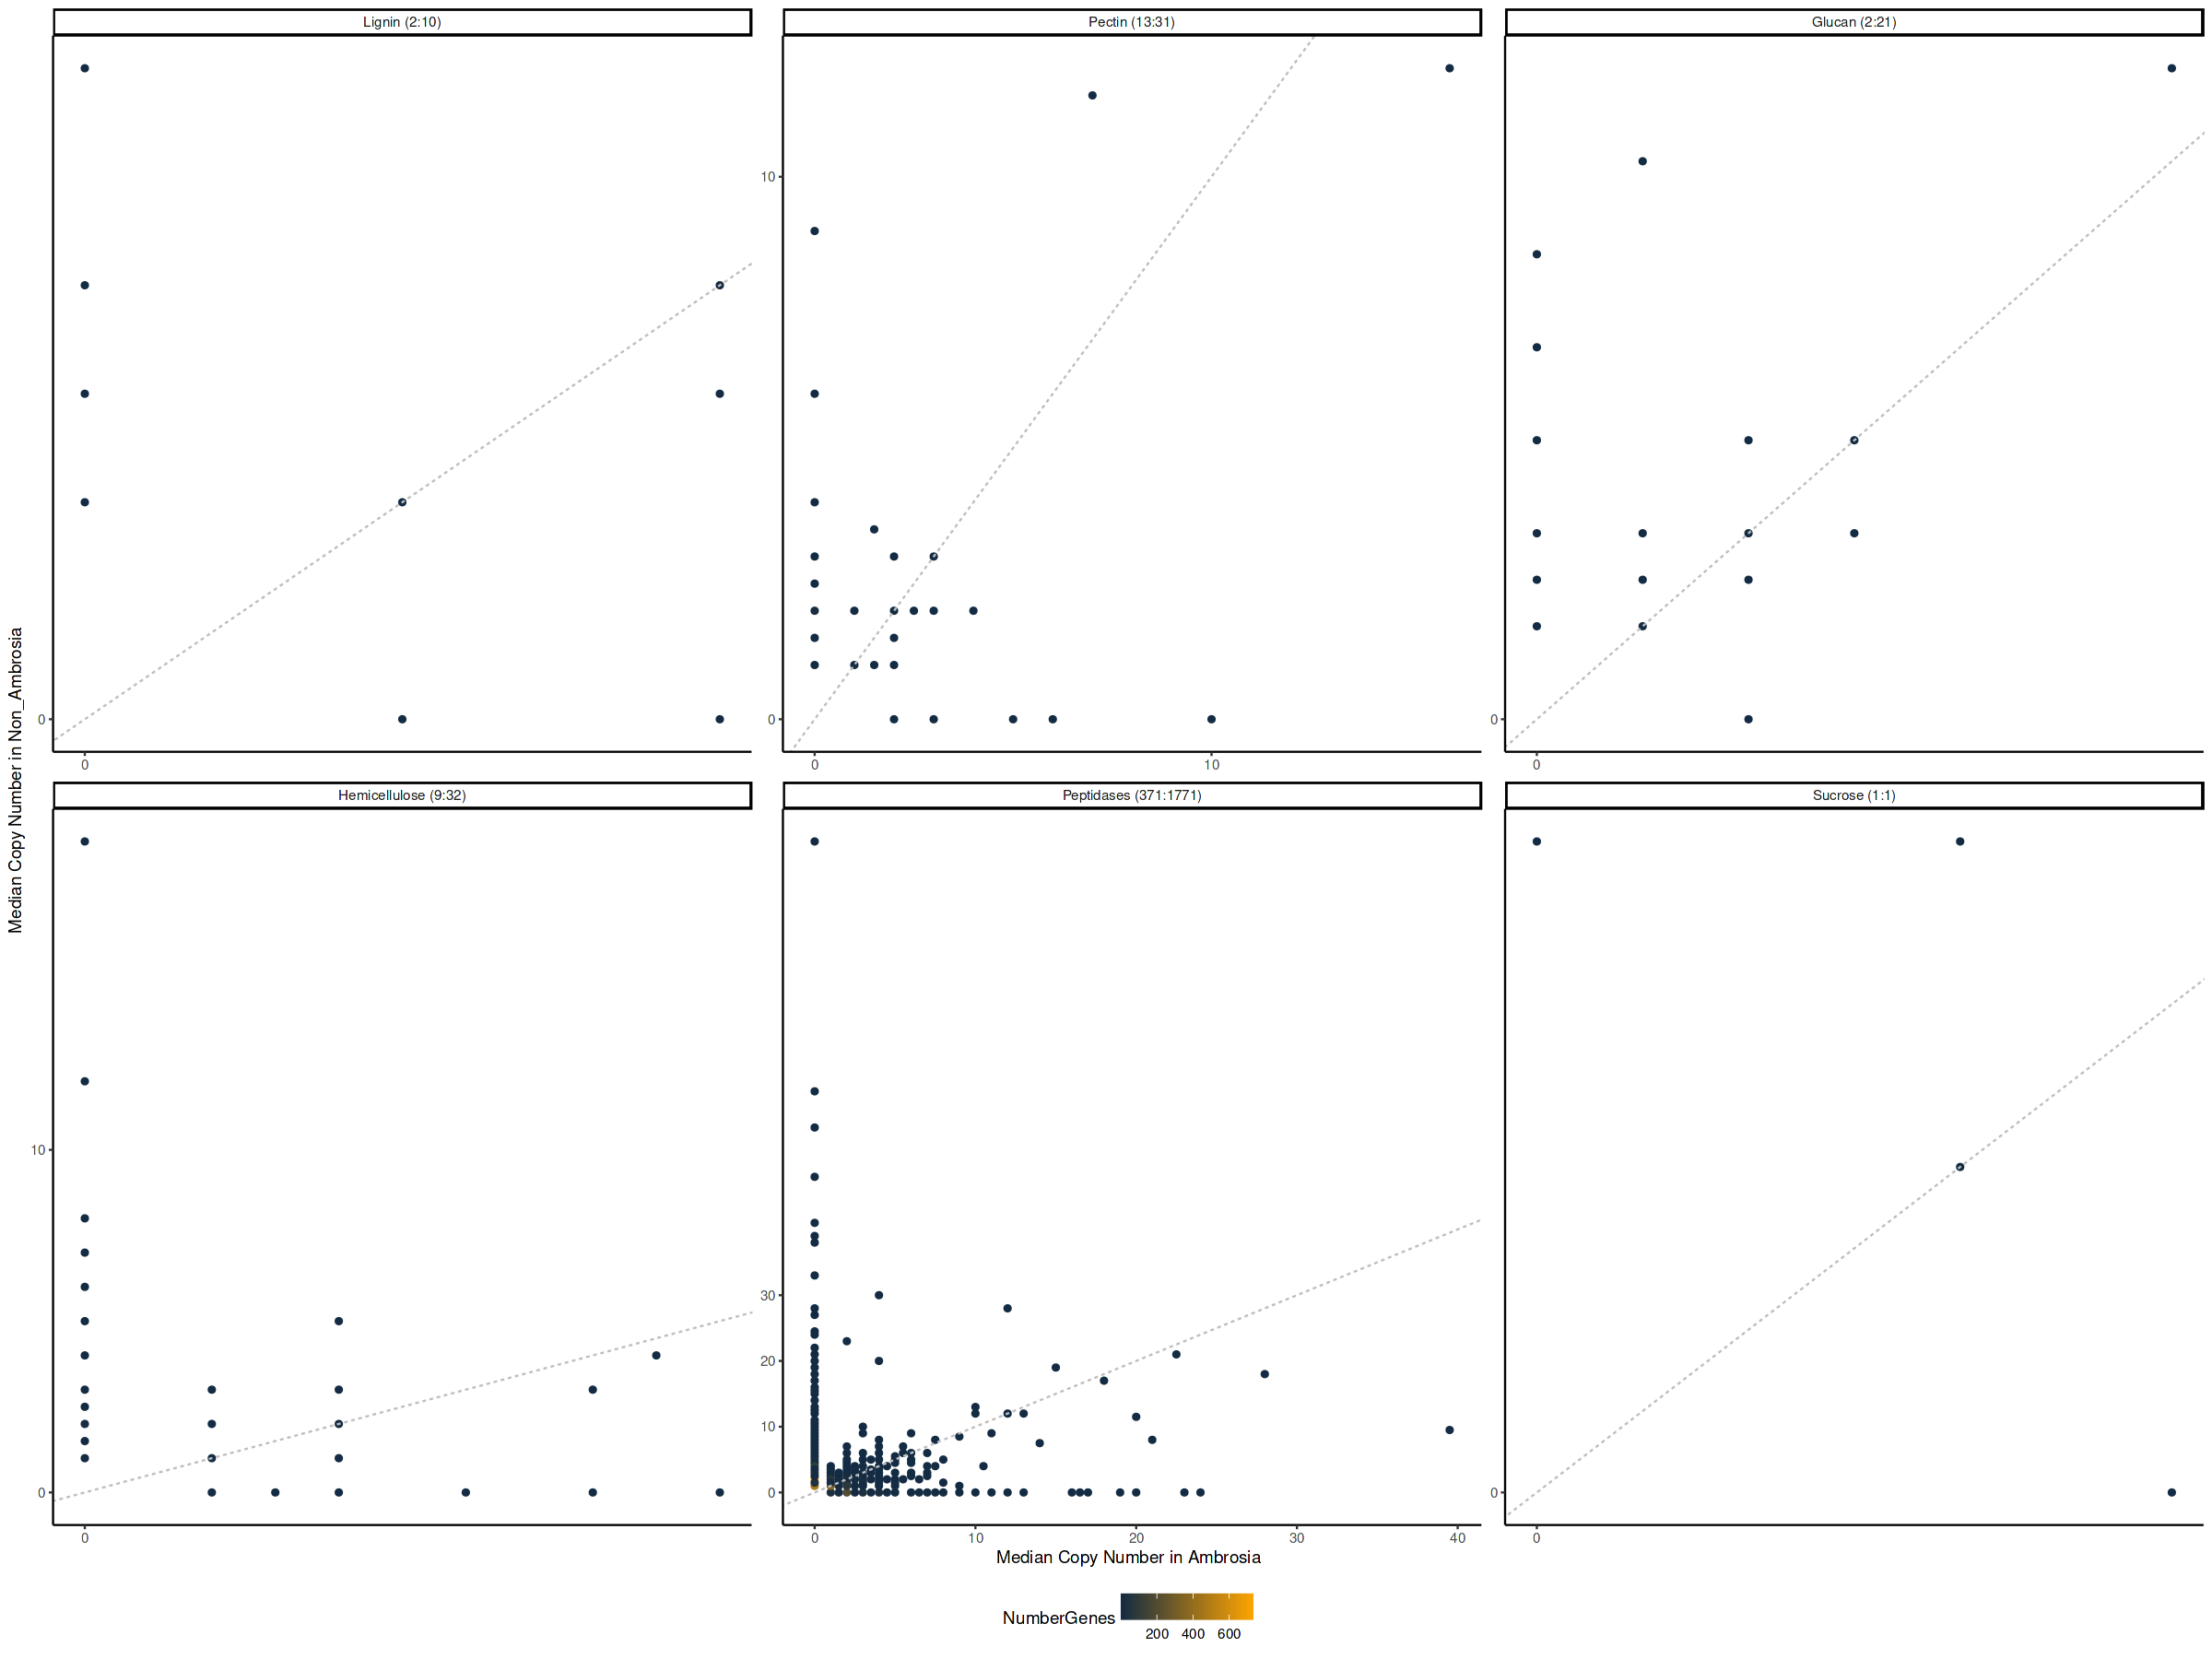

In [179]:
# library(ggplot2)
# library(dplyr)

# # Creating the plot
# #df$label2 <- factor(df$label, levels = unique(df$label)[c(1, 13, 6, 11, 15, 4)])
# df$label2 <- factor(df$label, levels = unique(df$label)[c(10, 14, 8, 9, 15, 18)])


# df <- df %>% filter(!is.na(label2))

# # Create a color gradient
# colors_heat <- colorRampPalette(c("#132B43", "orange"))
# g <- df %>%
# #  filter(tool_final != 'GH19') %>%
# #  filter(tool_final != 'Resistance') %>%
#   ggplot(aes(x = Ambrosia, y = Non_Ambrosia, color = NumberGenes)) +  # Updated here to color by NumberGenes
#   geom_point() + 
#   geom_abline(intercept = 0, slope = 1, linetype = "dashed", colour = 'grey') +
#   facet_wrap(~label2, scales = 'free') +
#   theme_classic() +
#   labs(y = 'Median Copy Number in Non_Ambrosia',
#        x = 'Median Copy Number in Ambrosia') +
#   scale_color_gradientn(colors = colors_heat(100)) + 
#   scale_x_continuous(breaks = seq(0, max(df$Non_Ambrosia, na.rm = TRUE), by = 10),
#                      labels = seq(0, max(df$Non_Ambrosia, na.rm = TRUE), by = 10)) +
#   scale_y_continuous(breaks = seq(0, max(df$Ambrosia, na.rm = TRUE), by = 10),
#                      labels = seq(0, max(df$Ambrosia, na.rm = TRUE), by = 10)) +
#   theme(legend.position = 'bottom')

# g
# #ggsave("functional_gene_median_other.pdf", plot = g, device = "pdf", width = 10, height = 7.5, path = ".")

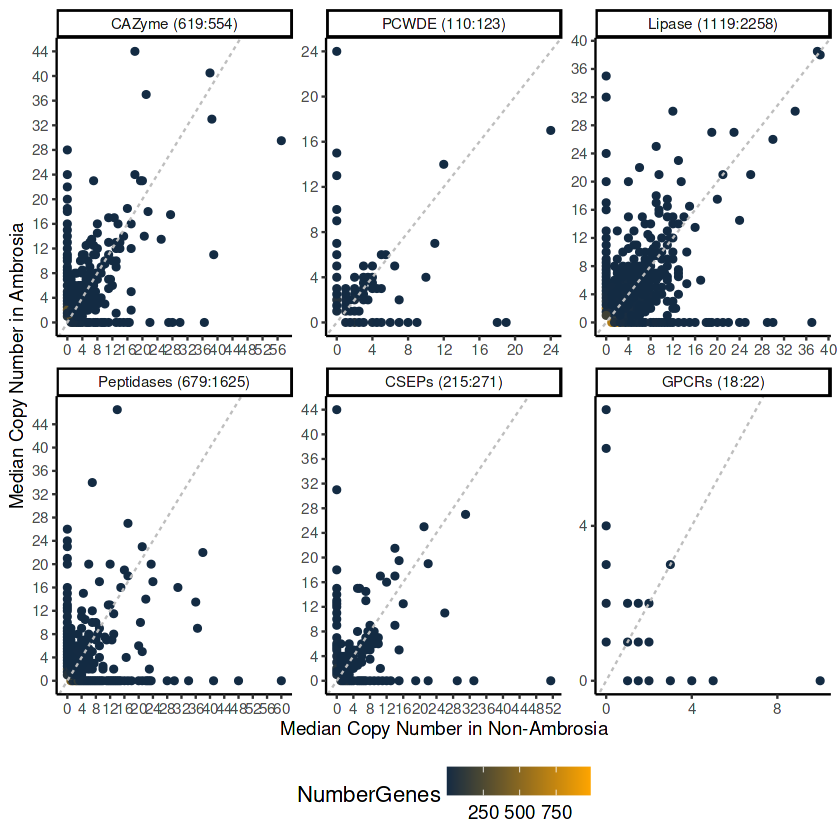

In [11]:
library(ggplot2)
library(dplyr)

# Create the plot
#df$label2 <- factor(df$label, levels = unique(df$label)[c(1, 13, 6, 11, 15, 4)])
df$label2 <- factor(df$label, levels = unique(df$label)[c(1, 14, 12, 16, 4, 9)])

# Filter out rows where label2 is NA
df <- df %>% filter(!is.na(label2))

# Create a color gradient
colors_heat <- colorRampPalette(c("#132B43", "orange"))

# Create the plot
fig2a <- df %>%
  filter(tool_final != 'Single Copy Genes') %>%
  ggplot(aes(x = Non_Ambrosia, y = Ambrosia)) +
  geom_point(aes(color = NumberGenes), size = 1.5) +  # Use a smaller size for points
  scale_color_gradientn(colors = colors_heat(10)) +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", colour = 'grey') +
  facet_wrap(~label2, scales = 'free') +
  theme_classic() +
  theme(legend.position = 'bottom',
        legend.text = element_text(size = 11),  # Adjust legend text size here
        legend.title = element_text(size = 13)) +  # Adjust legend title size here
  labs(y = 'Median Copy Number in Ambrosia',
       x = 'Median Copy Number in Non-Ambrosia') +
  scale_x_continuous(breaks = seq(0, max(df$Non_Ambrosia, na.rm = TRUE), by = 4),  # More spaced out ticks
                     labels = seq(0, max(df$Non_Ambrosia, na.rm = TRUE), by = 4)) +
  scale_y_continuous(breaks = seq(0, max(df$Ambrosia, na.rm = TRUE), by = 4),  # More spaced out ticks
                     labels = seq(0, max(df$Ambrosia, na.rm = TRUE), by = 4)) +
  theme(legend.position = 'bottom')

fig2a

# Save the plot to a PDF
ggsave("functional_gene_median.pdf", plot = fig2a, device = "pdf", width = 10, height = 7.5, path = ".")


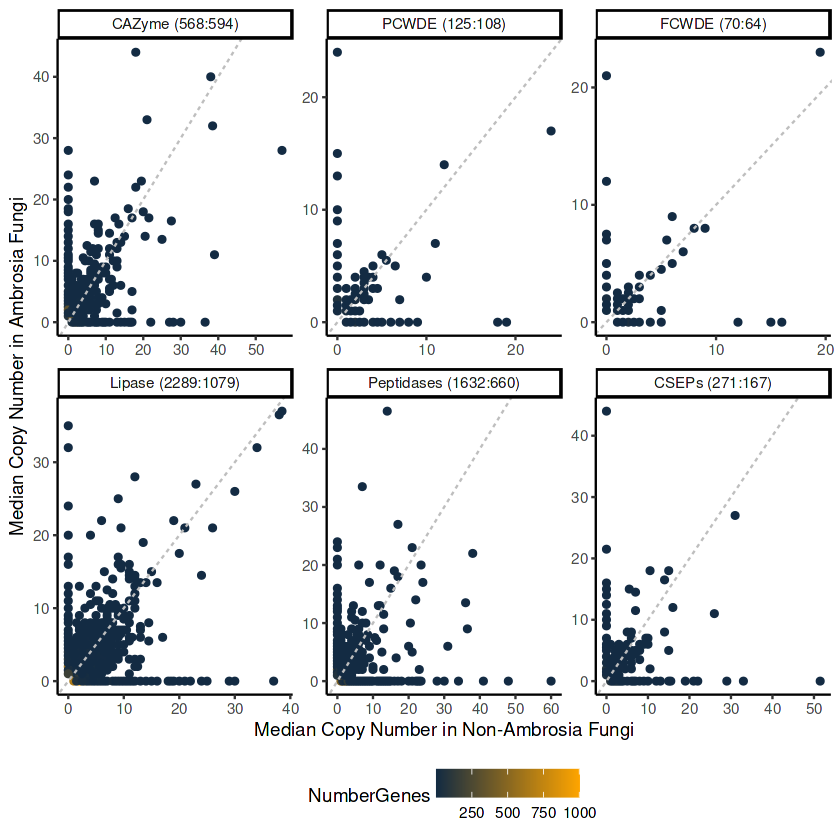

In [205]:
# library(ggplot2)
# library(dplyr)

# # Creating the plot
# df$label2 <- factor(df$label, levels = unique(df$label)[c(1, 13, 6, 11, 15, 4)])

# df <- df %>% filter(!is.na(label2))

# # Create a color gradient
# colors_heat <- colorRampPalette(c("#132B43", "orange"))
# g <- df %>%
# #  filter(tool_final != 'GH19') %>%
# #  filter(tool_final != 'Resistance') %>%
#   ggplot(aes(x = Non_Ambrosia, y = Ambrosia, color = NumberGenes)) +  # Updated here to color by NumberGenes
#   geom_point() + 
#   geom_abline(intercept = 0, slope = 1, linetype = "dashed", colour = 'grey') +
#   facet_wrap(~label2, scales = 'free') +
#   theme_classic() +
#   labs(y = 'Median Copy Number in Ambrosia Fungi',
#        x = 'Median Copy Number in Non-Ambrosia Fungi') +
#   scale_color_gradientn(colors = colors_heat(100)) + 
#   scale_x_continuous(breaks = seq(0, max(df$Non_Ambrosia, na.rm = TRUE), by = 10),
#                      labels = seq(0, max(df$Non_Ambrosia, na.rm = TRUE), by = 10)) +
#   scale_y_continuous(breaks = seq(0, max(df$Ambrosia, na.rm = TRUE), by = 10),
#                      labels = seq(0, max(df$Ambrosia, na.rm = TRUE), by = 10)) +
#   theme(legend.position = 'bottom')

# g
# ggsave("functional_gene_median.pdf", plot = g, device = "pdf", width = 10, height = 7.5, path = ".")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




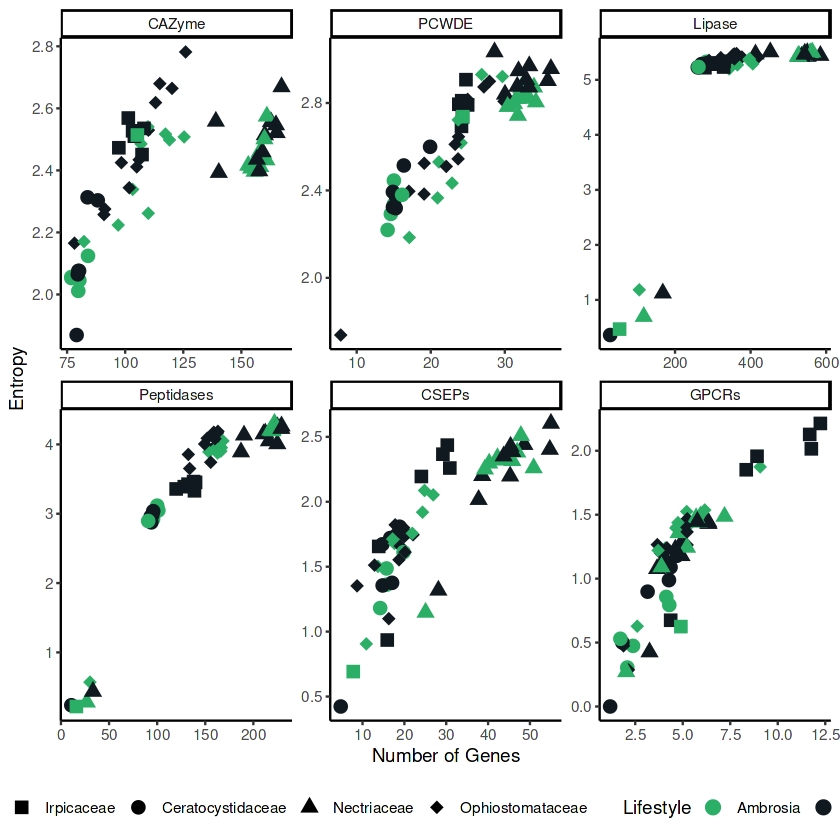

In [2]:
library(ggplot2)
library(dplyr)

# Load the data
diversity_indices <- read.csv('all_diversity_indices_with_acc_ambrosia.csv')

# Remove rows where Ambrosia == 'outgroup'
diversity_indices <- diversity_indices %>%
  filter(Ambrosia != 'outgroup')

# Adjusting factor levels for 'Ambrosia' to have descriptive labels
diversity_indices$Ambrosia <- factor(diversity_indices$Ambrosia,
                                     levels = c('Y', 'N'),
                                     labels = c('Ambrosia', 'Non-Ambrosia'))

# Ordering the 'Family' factor according to specified levels
diversity_indices$Family <- factor(diversity_indices$Family,
                                   levels = c('Irpicaceae', 'Ceratocystidaceae', 'Nectriaceae', 'Ophiostomataceae'))

# Define the color map
color_map <- c('Ambrosia' = '#2BAE66FF', 'Non-Ambrosia' = '#101820FF')

# Set the order of 'tool' categories
#diversity_indices$tool <- factor(diversity_indices$tool, levels = c('CAZyme', 'Lipase', 'Peptidases', 'CSEPs','Cytochrome P450', 'Resistance', 'Virulence', 'GH19'))

diversity_indices$tool2 <- factor(diversity_indices$tool, levels = c('CAZyme', 'PCWDE', 'Lipase', 'Peptidases', 'CSEPs', 'GPCRs'))
diversity_indices <- diversity_indices %>% filter(!is.na(tool2))

# Create the ggplot
g <- diversity_indices %>%
#  filter(tool != 'GH19') %>%
  ggplot(aes(x = S, y = H, color = Ambrosia, shape = Family)) +
  geom_jitter(size = 3.5) +
  scale_color_manual(values = color_map, 
                     name = "Lifestyle", 
                     labels = c('Ambrosia', 'Non-Ambrosia')) +
  theme_classic() +
  theme(legend.position = 'bottom') +
  labs(y = 'Entropy', x = 'Number of Genes') +
  facet_wrap(~tool2, scales = 'free') +
  scale_shape_manual(values = c(15, 16, 17, 18))

g
ggsave("functional_gene_diversity.pdf", plot = g, device = "pdf", width = 10, height = 7.5, path = ".")

[1] Lipase     Lipase     Lipase     Lipase     Lipase     Lipase    
  [7] Lipase     Lipase     Lipase     Lipase     Lipase     Lipase    
 [13] Lipase     Lipase     Lipase     Lipase     Lipase     Lipase    
 [19] Lipase     Lipase     Lipase     Lipase     Lipase     Lipase    
 [25] Lipase     Lipase     Lipase     Lipase     Lipase     Lipase    
 [31] Lipase     Lipase     Lipase     Lipase     Lipase     Lipase    
 [37] Lipase     Lipase     Lipase     Lipase     Lipase     Lipase    
 [43] Lipase     Lipase     Lipase     Lipase     Lipase     Lipase    
 [49] Lipase     Lipase     Lipase     Lipase     Lipase     Lipase    
 [55] Lipase     Lipase     Lipase     Lipase     CAZyme     CAZyme    
 [61] CAZyme     CAZyme     CAZyme     CAZyme     CAZyme     CAZyme    
 [67] CAZyme     CAZyme     CAZyme     CAZyme     CAZyme     CAZyme    
 [73] CAZyme     CAZyme     CAZyme     CAZyme     CAZyme     CAZyme    
 [79] CAZyme     CAZyme     CAZyme     CAZyme     CAZyme     CAZyme    
 [85] CAZyme     CAZyme     CAZyme     CAZyme     CAZyme     CAZyme    
 [91] CAZyme     CAZyme     CAZyme     CAZyme     CAZyme     CAZyme    
 [97] CAZyme     CAZyme     CAZyme     CAZyme     CAZyme     CAZyme    
[103] CAZyme     CAZyme     CAZyme     CAZyme     CAZyme     CAZyme    
[109] CAZyme     CAZyme     CAZyme     CAZyme     CAZyme     CAZyme    
[115] CAZyme     CAZyme     CSEPs      CSEPs      CSEPs      CSEPs     
[121] CSEPs      CSEPs      CSEPs      CSEPs      CSEPs      CSEPs     
[127] CSEPs      CSEPs      CSEPs      CSEPs      CSEPs      CSEPs     
[133] CSEPs      CSEPs      CSEPs      CSEPs      CSEPs      CSEPs     
[139] CSEPs      CSEPs      CSEPs      CSEPs      CSEPs      CSEPs     
[145] CSEPs      CSEPs      CSEPs      CSEPs      CSEPs      CSEPs     
[151] CSEPs      CSEPs      CSEPs      CSEPs      CSEPs      CSEPs     
[157] CSEPs      CSEPs      CSEPs      CSEPs      CSEPs      CSEPs     
[163] CSEPs      CSEPs      CSEPs      CSEPs      CSEPs      CSEPs     
[169] CSEPs      CSEPs      CSEPs      CSEPs      CSEPs      CSEPs     
[175] PCWDE      PCWDE      PCWDE      PCWDE      PCWDE      PCWDE     
[181] PCWDE      PCWDE      PCWDE      PCWDE      PCWDE      PCWDE     
[187] PCWDE      PCWDE      PCWDE      PCWDE      PCWDE      PCWDE     
[193] PCWDE      PCWDE      PCWDE      PCWDE      PCWDE      PCWDE     
[199] PCWDE      PCWDE      PCWDE      PCWDE      PCWDE      PCWDE     
[205] PCWDE      PCWDE      PCWDE      PCWDE      PCWDE      PCWDE     
[211] PCWDE      PCWDE      PCWDE      PCWDE      PCWDE      PCWDE     
[217] PCWDE      PCWDE      PCWDE      PCWDE      PCWDE      PCWDE     
[223] PCWDE      PCWDE      PCWDE      PCWDE      PCWDE      PCWDE     
[229] PCWDE      PCWDE      PCWDE      PCWDE      Peptidases Peptidases
[235] Peptidases Peptidases Peptidases Peptidases Peptidases Peptidases
[241] Peptidases Peptidases Peptidases Peptidases Peptidases Peptidases
[247] Peptidases Peptidases Peptidases Peptidases Peptidases Peptidases
[253] Peptidases Peptidases Peptidases Peptidases Peptidases Peptidases
[259] Peptidases Peptidases Peptidases Peptidases Peptidases Peptidases
[265] Peptidases Peptidases Peptidases Peptidases Peptidases Peptidases
[271] Peptidases Peptidases Peptidases Peptidases Peptidases Peptidases
[277] Peptidases Peptidases Peptidases Peptidases Peptidases Peptidases
[283] Peptidases Peptidases Peptidases Peptidases Peptidases Peptidases
[289] Peptidases Peptidases GPCRs      GPCRs      GPCRs      GPCRs     
[295] GPCRs      GPCRs      GPCRs      GPCRs      GPCRs      GPCRs     
[301] GPCRs      GPCRs      GPCRs      GPCRs      GPCRs      GPCRs     
[307] GPCRs      GPCRs      GPCRs      GPCRs      GPCRs      GPCRs     
[313] GPCRs      GPCRs      GPCRs      GPCRs      GPCRs      GPCRs     
[319] GPCRs      GPCRs      GPCRs      GPCRs      GPCRs      GPCRs     
[325] GPCRs      GPCRs      GPCRs      GPCRs      GPCRs      GPCRs     
[331] GPCRs      GPCRs      GPCRs      GPC

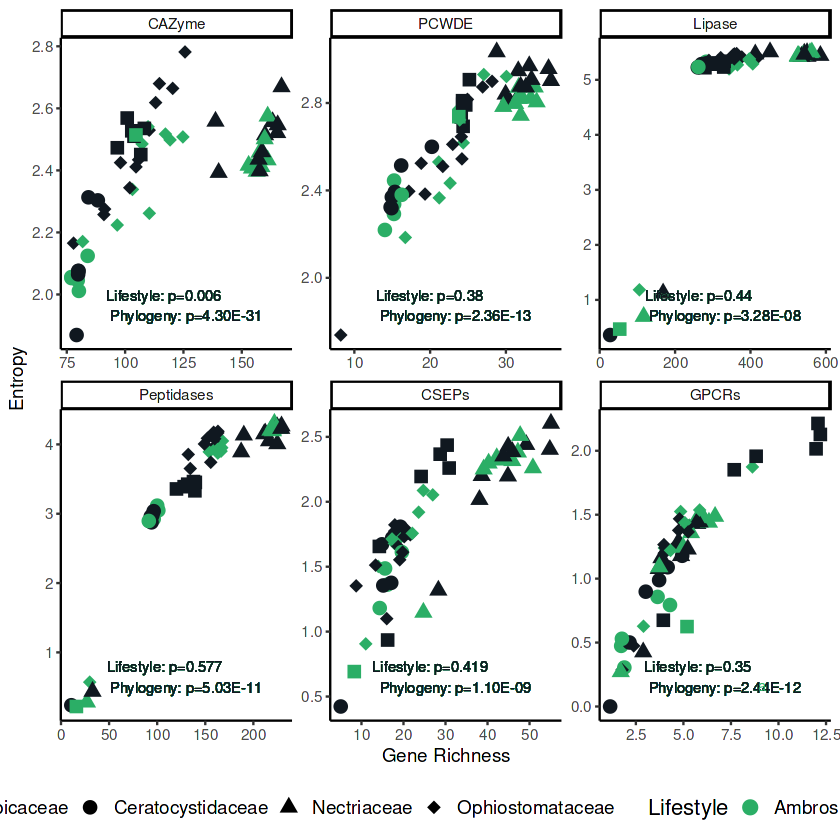

In [7]:
diversity_indices$tool2

library(ggplot2)
library(dplyr)

# Load the data
diversity_indices <- read.csv('all_diversity_indices_with_acc_ambrosia.csv')

# Remove rows where Ambrosia == 'outgroup'
diversity_indices <- diversity_indices %>%
  filter(Ambrosia != 'outgroup')

# Adjusting factor levels for 'Ambrosia' to have descriptive labels
diversity_indices$Ambrosia <- factor(diversity_indices$Ambrosia,
                                     levels = c('Y', 'N'),
                                     labels = c('Ambrosia', 'Non-Ambrosia'))

# Ordering the 'Family' factor according to specified levels
diversity_indices$Family <- factor(diversity_indices$Family,
                                   levels = c('Irpicaceae', 'Ceratocystidaceae', 'Nectriaceae', 'Ophiostomataceae'))

# Define the color map
color_map <- c('Ambrosia' = '#2BAE66FF', 'Non-Ambrosia' = '#101820FF')

# Set the order of 'tool' categories
diversity_indices$tool2 <- factor(diversity_indices$tool, levels = c('CAZyme', 'PCWDE','Lipase', 'Peptidases', 'CSEPs', 'GPCRs'))
diversity_indices <- diversity_indices %>% filter(!is.na(tool2))

# Create the ggplot
g <- diversity_indices %>%
#  filter(tool2 != 'GH19') %>%
  ggplot(aes(x = S, y = H, color = Ambrosia, shape = Family)) +
#  ggplot(aes(x = evenness, y = H, color = Ambrosia, shape = Family)) +
  geom_jitter(size = 3.5) +
  scale_color_manual(values = color_map, 
                     name = "Lifestyle", 
                     labels = c('Ambrosia', 'Non-Ambrosia')) +
  theme_classic() +
  theme(legend.position = 'bottom',
        legend.text = element_text(size = 11),  # Adjust legend text size here
        legend.title = element_text(size = 13)) +  # Adjust legend title size here
  labs(y = 'Entropy', x = 'Gene Richness') +
  facet_wrap(~tool2, scales = 'free') +
  scale_shape_manual(values = c(15, 16, 17, 18))

# Adding p-value annotations for each tool, including "Resistance"
g <- g + geom_text(data = diversity_indices %>% 
                   filter(tool2 %in% c('CAZyme', 'PCWDE', 'GPCRs','Lipase', 'Peptidases', 'CSEPs')), 
                   aes(x = Inf, y = Inf, label = ifelse(tool2 == "CAZyme", "                                                          Lifestyle: p=0.006\nPhylogeny: p=4.30E-31",
                                                 ifelse(tool2 == "PCWDE", "                                                                      Lifestyle: p=0.38\nPhylogeny: p=2.36E-13", 
                                                 ifelse(tool2 == "GPCRs", "                                                                       Lifestyle: p=0.35\nPhylogeny: p=2.44E-12", 
                                                 ifelse(tool2 == "Lipase", "                                                                      Lifestyle: p=0.44\nPhylogeny: p=3.28E-08", 
                                                 ifelse(tool2 == "Peptidases", "                                                         Lifestyle: p=0.577\nPhylogeny: p=5.03E-11", 
                                                 ifelse(tool2 == "CSEPs", "                                                              Lifestyle: p=0.419\nPhylogeny: p=1.10E-09", ""))))))), 
                   hjust = 1.2, vjust = 9, size = 3)

g

ggsave("functional_gene_diversity_with_p_values.pdf", plot = g, device = "pdf", width = 10, height = 7.5, path = ".")

# Analysis for each database annotation

### CAZymes

Rows: 421040 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): Orthogroup, genes, acc, Family, Genus, Ambrosia, tool, tool_substra...
dbl (5): n_genomes, n_genes, n_genes_genome, Num_Gene, Secret_protein

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 70 Columns: 45
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (18): FungusName, Strain, FungusName_Strain, BeetleAssociate, Beetle_Evo...
dbl (27): Genome_size, TE_CoverageTotal, TE_CoverageTotal_Mbp, Num_Gene, Num...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'acc'. You can override using the `.groups`
argument.


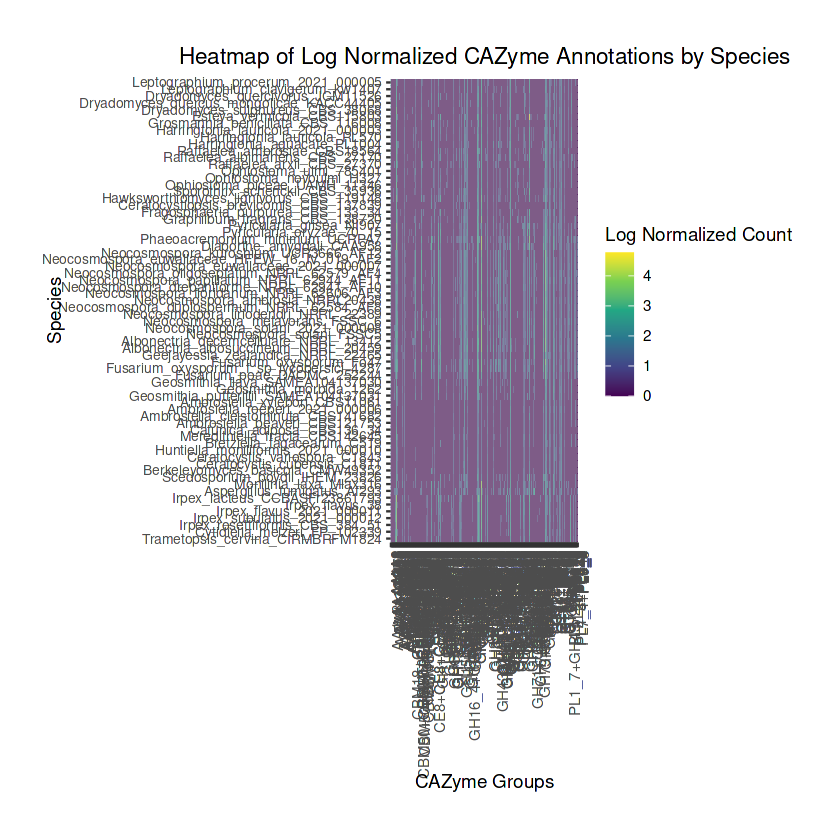

In [286]:
# Load necessary libraries
library(dplyr)
library(tidyr)
library(ggplot2)
library(reshape2)
library(viridis)  # For the viridis color scale
library(readr)

# Load the CAZyme data
cazyme_file_path <- "Orthogroups_meta_db_tool_annot_toolMod_CZAyme_substrate.csv"
cazyme_data <- read_csv(cazyme_file_path)

# Load the Ambrosia data
ambrosia_file_path <- "AmbrosiaFungiGenomeFeature.csv"
ambrosia_data <- read_csv(ambrosia_file_path)

# Filter the CAZyme data where 'tool' is 'CAZyme'
cazyme_filtered <- cazyme_data %>% filter(tool == "CAZyme")

# Count the occurrences of each unique 'annotation' for each 'acc'
cazyme_counts <- cazyme_filtered %>%
  group_by(acc, annotation) %>%
  summarize(count = n()) %>%
  ungroup()

# Filter out rows where annotation is "-"
cazyme_counts_filtered <- cazyme_counts %>%
  filter(annotation != "-")

# Pivot the data to create a matrix suitable for a heatmap
heatmap_data <- cazyme_counts_filtered %>%
  spread(key = annotation, value = count, fill = 0)

# Merge with ambrosia data
merged_data <- ambrosia_data %>%
  select(FungusName_Strain, Ambrosia, CladeOrder) %>%
  right_join(heatmap_data, by = c("FungusName_Strain" = "acc"))

# Arrange the data by CladeOrder
merged_data <- merged_data %>%
  arrange(CladeOrder)

# Log normalize the data
heatmap_data_log_normalized <- merged_data %>%
  mutate(across(-c(FungusName_Strain, Ambrosia, CladeOrder), ~ log1p(.)))

# Convert the data to a matrix format for heatmap
heatmap_matrix <- as.matrix(heatmap_data_log_normalized[,-c(1:3)])
rownames(heatmap_matrix) <- merged_data$FungusName_Strain

# Reverse the order of the species
heatmap_matrix <- heatmap_matrix[nrow(heatmap_matrix):1, ]

# Draw the heatmap using ggplot2
heatmap_data_melted <- melt(heatmap_matrix)
colnames(heatmap_data_melted) <- c("Species", "CAZyme_Group", "Count")

# Create the heatmap
p <- ggplot(heatmap_data_melted, aes(x = CAZyme_Group, y = Species, fill = Count)) +
  geom_tile(color = "grey") +
  scale_fill_viridis_c(name = "Log Normalized Count") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1),
        axis.text.y = element_text(size = 8),
        plot.title = element_text(hjust = 0.5),
        plot.margin = margin(t = 1, r = 1, b = 1, l = 1, unit = "cm")) +
  labs(title = "Heatmap of Log Normalized CAZyme Annotations by Species",
       x = "CAZyme Groups",
       y = "Species")

write.csv(heatmap_matrix, "CAZyme_heatmap_matrix_log_normalized.csv",)

# Save the plot as a PDF with adjusted size
ggsave("CAZyme_heatmap_cazyme_annotations_log_normalized.pdf", plot = p, width = 45, height = 10, units = "in")

# Print the plot to the screen
print(p)

#### exclude outgroup (except Zygo outgroup) for PIC test

In [164]:
# # Load necessary libraries
# library(dplyr)
# library(tidyr)
# library(readr)

# # Load the CAZyme data
# CAZyme_file_path <- "Orthogroups_meta_db_tool_annot_toolMod_CZAyme_substrate.csv"
# CAZyme_data <- read_csv(CAZyme_file_path)

# # Load the Ambrosia data
# ambrosia_file_path <- "AmbrosiaFungiGenomeFeature.csv"
# ambrosia_data <- read_csv(ambrosia_file_path)

# # Filter the CAZyme data where 'tool' is 'CAZyme'
# CAZyme_filtered <- CAZyme_data %>% filter(tool == "CAZyme")

# # Count the occurrences of each unique 'annotation' for each 'acc'
# CAZyme_counts <- CAZyme_filtered %>%
#   group_by(acc, annotation) %>%
#   summarize(count = n(), .groups = 'drop')

# # Filter out rows where annotation is "-"
# CAZyme_counts_filtered <- CAZyme_counts %>%
#   filter(annotation != "-")

# # Pivot the data to create a matrix suitable for analysis
# CAZyme_matrix <- CAZyme_counts_filtered %>%
#   spread(key = annotation, value = count, fill = 0)

# # Merge with ambrosia data using left join to ensure all ambrosia data is included
# merged_data <- ambrosia_data %>%
#   select(FungusName_Strain, Ambrosia) %>%
#   left_join(CAZyme_matrix, by = c("FungusName_Strain" = "acc"))

# # Fill NA values with zeros for annotation counts
# merged_data <- merged_data %>% replace(is.na(.), 0)

# # Filter the NA in Ambrosia
# merged_data <- merged_data %>% filter(Ambrosia != "NA")

# # Export the updated merged data to a CSV file
# write.csv(merged_data, "CAZyme_merged_data.csv", row.names = FALSE)


In [293]:
# Load necessary libraries
library(dplyr)
library(tidyr)
library(readr)

# Load the CAZyme data
cazyme_file_path <- "Orthogroups_meta_db_tool_annot_toolMod_CZAyme_substrate.csv"
cazyme_data <- read_csv(cazyme_file_path)

# Load the Ambrosia data
ambrosia_file_path <- "AmbrosiaFungiGenomeFeature_sub.csv"
ambrosia_data <- read_csv(ambrosia_file_path)

# Filter the CAZyme data where 'tool' is 'CAZyme'
cazyme_filtered <- cazyme_data %>% filter(tool == "CAZyme")

# Count the occurrences of each unique 'annotation' for each 'acc'
cazyme_counts <- cazyme_filtered %>%
  group_by(acc, annotation) %>%
  summarize(count = n(), .groups = 'drop')

# Filter out rows where annotation is "-"
cazyme_counts_filtered <- cazyme_counts %>%
  filter(annotation != "-")

# Pivot the data to create a matrix suitable for analysis
cazyme_matrix <- cazyme_counts_filtered %>%
  spread(key = annotation, value = count, fill = 0)

# Merge with ambrosia data using left join to ensure all ambrosia data is included
merged_data <- ambrosia_data %>%
  select(FungusName_Strain, Ambrosia) %>%
  left_join(cazyme_matrix, by = c("FungusName_Strain" = "acc"))

# Fill NA values with zeros for annotation counts
merged_data <- merged_data %>% replace(is.na(.), 0)

# Filter out rows where Ambrosia is 'NA'
merged_data <- merged_data %>% filter(Ambrosia != "NA")

# Add the "Family" column from the original CAZyme data
family_column <- cazyme_data %>%
  select(acc, Family) %>%
  distinct() %>%
  rename(FungusName_Strain = acc)

merged_data <- merged_data %>%
  left_join(family_column, by = "FungusName_Strain")

# Reorder columns to have "Family" as the third column
col_order <- c("FungusName_Strain", "Ambrosia", "Family", setdiff(names(merged_data), c("FungusName_Strain", "Ambrosia", "Family")))
merged_data <- merged_data %>% select(all_of(col_order))

# Export the updated merged data to a CSV file
write_csv(merged_data, "CAZyme_merged_data.csv")


Rows: 421040 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): Orthogroup, genes, acc, Family, Genus, Ambrosia, tool, tool_substra...
dbl (5): n_genomes, n_genes, n_genes_genome, Num_Gene, Secret_protein

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 58 Columns: 45
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (18): FungusName, Strain, FungusName_Strain, BeetleAssociate, Beetle_Evo...
dbl (27): Genome_size, TE_CoverageTotal, TE_CoverageTotal_Mbp, Num_Gene, Num...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [294]:
# Log normalize the CAZyme counts for each group
log_normalized_data <- merged_data %>%
  mutate(across(-c(FungusName_Strain, Ambrosia, Family), ~ log1p(.)))

# Drop columns with NaN values
log_normalized_data <- log_normalized_data %>%
  select(where(~ !any(is.nan(.))))

# Export the log-normalized data to a CSV file
write_csv(log_normalized_data, "CAZyme_log_normalized_data.csv")

modify the "concat_rooted.contree" using TreeGraph2 to "concat_nooutgroup_rooted.contree" 
remove outgroups except Zygo outgroups

In [ ]:
# # Load necessary libraries
# library(ape)
# library(phangorn)
# library(dplyr)
# library(tidyr)
# library(readr)

# # Load the phylogenetic tree
# tree_file_path <- "concat_rooted.contree"
# tree <- read.tree(tree_file_path)

# # Load the traits data
# traits_file_path <- "CAZyme_log_normalized_data.csv"
# traits_data <- read_csv(traits_file_path)

# # Ensure that the species names in traits match the tree
# traits_data$species <- factor(traits_data$FungusName_Strain, levels = tree$tip.label)

# # Create the Ambrosia predictor
# ambrosia_predictor <- ifelse(traits_data$Ambrosia == 'Y', 1, 0)

# # Use all columns except the first and second as trait_list
# trait_list <- colnames(traits_data)[!colnames(traits_data) %in% c("FungusName_Strain", "Ambrosia")]

# # Initialize a list to store PIC results
# pic_results <- list()

# # Loop through each trait and compute PIC, storing results
# for(trait in trait_list) {
#   if(all(!is.na(traits_data[[trait]]))) {  # check if there are no missing values for the trait
#     pic_results[[trait]] <- pic(traits_data[[trait]], tree)
#   }
# }

# # Function to match node contrasts with predictor values
# match_pic_to_predictor <- function(pic_values, tree, predictor) {
#   node_values <- pic_values
#   internal_nodes <- (length(tree$tip.label) + 1):(length(tree$tip.label) + length(node_values))
  
#   predictor_aligned <- numeric(length(node_values))
  
#   for (i in 1:length(node_values)) {
#     node <- internal_nodes[i]
#     descendants <- Descendants(tree, node, type = "tips")[[1]]
#     predictor_values <- predictor[descendants]
#     predictor_aligned[i] <- mean(predictor_values)
#   }
  
#   return(predictor_aligned)
# }

# # Align the predictor values with the PIC results
# aligned_predictor <- lapply(pic_results, match_pic_to_predictor, tree = tree, predictor = ambrosia_predictor)

# # Convert the PIC results to a data frame for analysis
# pic_data <- as.data.frame(do.call(cbind, lapply(pic_results, as.numeric)))
# colnames(pic_data) <- names(pic_results)

# # Convert the aligned predictor to a data frame
# aligned_predictor_df <- as.data.frame(do.call(cbind, aligned_predictor))
# colnames(aligned_predictor_df) <- paste0(names(aligned_predictor), "_predictor")

# # Combine the PIC data and aligned predictor data
# combined_data <- cbind(pic_data, aligned_predictor_df)

# # Fit a linear model for each trait and store the results
# lm_results <- list()

# for(trait in names(pic_results)) {
#   trait_predictor <- paste0(trait, "_predictor")
#   lm_results[[trait]] <- summary(lm(combined_data[[trait]] ~ combined_data[[trait_predictor]]))
# }

# # Summarize the linear model results for each trait
# summary_results <- data.frame(
#   Trait = character(),
#   Predictor = character(),
#   Estimate = numeric(),
#   StdError = numeric(),
#   tValue = numeric(),
#   pValue = numeric(),
#   stringsAsFactors = FALSE
# )

# for(trait in names(pic_results)) {
#   trait_predictor <- paste0(trait, "_predictor")
#   lm_summary <- lm_results[[trait]]
#   summary_results <- rbind(summary_results, data.frame(
#     Trait = trait,
#     Predictor = trait_predictor,
#     Estimate = lm_summary$coefficients[2, "Estimate"],
#     StdError = lm_summary$coefficients[2, "Std. Error"],
#     tValue = lm_summary$coefficients[2, "t value"],
#     pValue = lm_summary$coefficients[2, "Pr(>|t|)"]
#   ))
# }

# # Print the summarized results
# #print(summary_results)

# # Save the summary results to a CSV file
# write_csv(summary_results, "CAZyme_PIC_test_summary_results.csv")


In [323]:
# Load necessary libraries
library(ape)
library(phangorn)
library(dplyr)
library(tidyr)
library(readr)

# Load the phylogenetic tree for all species
all_species_tree_file_path <- "concat_nooutgroup_rooted.contree"
all_species_tree <- read.tree(all_species_tree_file_path)

# Load the traits data
traits_file_path <- "CAZyme_log_normalized_data.csv"
traits_data <- read_csv(traits_file_path)

# Ensure that the species names in traits match the tree
traits_data$species <- factor(traits_data$FungusName_Strain, levels = all_species_tree$tip.label)

# Create the Ambrosia predictor
ambrosia_predictor <- ifelse(traits_data$Ambrosia == 'Y', 1, 0)

# Function to perform PIC analysis and summarize results
perform_pic_analysis <- function(traits_data, tree, ambrosia_predictor) {
  # Use all columns except the first and second as trait_list
  trait_list <- colnames(traits_data)[!colnames(traits_data) %in% c("FungusName_Strain", "Ambrosia", "species")]

  # Initialize a list to store PIC results
  pic_results <- list()

  # Loop through each trait and compute PIC, storing results
  for(trait in trait_list) {
    trait_values <- traits_data[[trait]]
    if(all(!is.na(trait_values)) && all(is.finite(trait_values))) {  # check if there are no missing values and all are finite
      pic_results[[trait]] <- pic(trait_values, tree)
    }
  }

  # Function to match node contrasts with predictor values
  match_pic_to_predictor <- function(pic_values, tree, predictor) {
    node_values <- pic_values
    internal_nodes <- (length(tree$tip.label) + 1):(length(tree$tip.label) + length(node_values))
    
    predictor_aligned <- numeric(length(node_values))
    
    for (i in 1:length(node_values)) {
      node <- internal_nodes[i]
      descendants <- Descendants(tree, node, type = "tips")[[1]]
      predictor_values <- predictor[descendants]
      predictor_aligned[i] <- mean(predictor_values)
    }
    
    return(predictor_aligned)
  }

  # Align the predictor values with the PIC results
  aligned_predictor <- lapply(pic_results, match_pic_to_predictor, tree = tree, predictor = ambrosia_predictor)

  # Convert the PIC results to a data frame for analysis
  pic_data <- as.data.frame(do.call(cbind, lapply(pic_results, as.numeric)))
  colnames(pic_data) <- names(pic_results)

  # Convert the aligned predictor to a data frame
  aligned_predictor_df <- as.data.frame(do.call(cbind, aligned_predictor))
  colnames(aligned_predictor_df) <- paste0(names(aligned_predictor), "_predictor")

  # Combine the PIC data and aligned predictor data
  combined_data <- cbind(pic_data, aligned_predictor_df)

  # Fit a linear model for each trait and store the results
  lm_results <- list()

  for(trait in names(pic_results)) {
    trait_predictor <- paste0(trait, "_predictor")
    lm_results[[trait]] <- summary(lm(combined_data[[trait]] ~ combined_data[[trait_predictor]]))
  }

  # Summarize the linear model results for each trait
  summary_results <- data.frame(
    Trait = character(),
    Predictor = character(),
    Estimate = numeric(),
    StdError = numeric(),
    tValue = numeric(),
    pValue = numeric(),
    stringsAsFactors = FALSE
  )

  for(trait in names(pic_results)) {
    trait_predictor <- paste0(trait, "_predictor")
    lm_summary <- lm_results[[trait]]
    summary_results <- rbind(summary_results, data.frame(
      Trait = trait,
      Predictor = trait_predictor,
      Estimate = lm_summary$coefficients[2, "Estimate"],
      StdError = lm_summary$coefficients[2, "Std. Error"],
      tValue = lm_summary$coefficients[2, "t value"],
      pValue = lm_summary$coefficients[2, "Pr(>|t|)"]
    ))
  }

  return(summary_results)
}

# Perform analysis for all species
all_species_results <- perform_pic_analysis(traits_data, all_species_tree, ambrosia_predictor)
write_csv(all_species_results, "CAZyme_PIC_test_summary_results_all_species.csv")

# Function to filter data by family and perform PIC analysis
perform_family_analysis <- function(family_name, tree_file_path) {
  family_data <- traits_data %>%
    filter(Family == family_name)
  
  tree <- read.tree(tree_file_path)
  
  family_predictor <- ifelse(family_data$Ambrosia == 'Y', 1, 0)
  
  family_results <- perform_pic_analysis(family_data, tree, family_predictor)
  return(family_results)
}

# List of families and corresponding tree files
families <- c("Nectriaceae", "Ceratocystidaceae", "Irpicaceae", "Ophiostomataceae")
tree_files <- c(
  "concat_rooted.contree_Nectriaceae.tre",
  "concat_rooted.contree_Ceratocystidaceae.tre",
  "concat_rooted.contree_Irpicaceae.tre",
  "concat_rooted.contree_ophiostomataceae.tre"
)

# Perform analysis for each family and save results
for(i in 1:length(families)) {
  family <- families[i]
  tree_file <- tree_files[i]
  family_results <- perform_family_analysis(family, tree_file)
  output_file <- paste0("CAZyme_PIC_test_summary_results_", family, ".csv")
  write_csv(family_results, output_file)
}


Rows: 58 Columns: 499
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (3): FungusName_Strain, Ambrosia, Family
dbl (496): AA1, AA1_2, AA1_3, AA1_3+AA3_2, AA1+AA1, AA1+CE1, AA1+GH76, AA11,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 496 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Trait, Predictor
dbl (4): Estimate, StdError, tValue, pValue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 58 Columns: 499
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (3): FungusName_Strain, Ambrosia, Family
dbl (496): AA1, AA1_2, AA1_3, AA1_3+AA3_2, AA1+AA1, AA1+CE1, AA1+GH76, AA11,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 58 Columns: 45
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (18): FungusName, Strain, FungusName_Strain, BeetleAssociate, Beetle_Evo...
dbl (27): Genome_size, TE_CoverageTotal, TE_CoverageTotal_Mbp

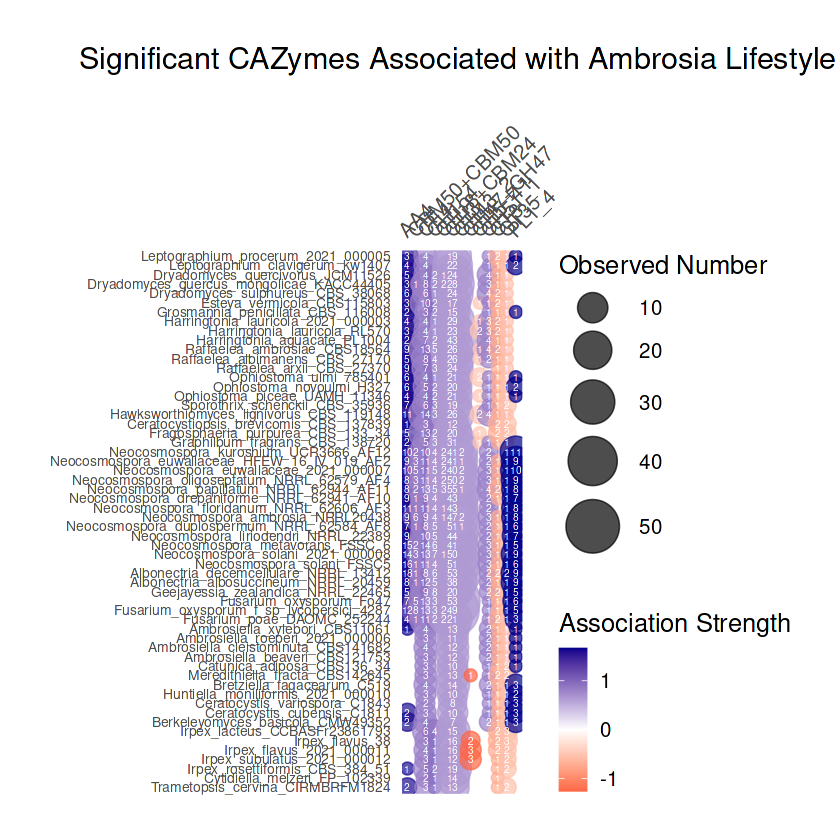

Rows: 496 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Trait, Predictor
dbl (4): Estimate, StdError, tValue, pValue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 58 Columns: 499
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (3): FungusName_Strain, Ambrosia, Family
dbl (496): AA1, AA1_2, AA1_3, AA1_3+AA3_2, AA1+AA1, AA1+CE1, AA1+GH76, AA11,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 58 Columns: 45
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (18): FungusName, Strain, FungusName_Strain, BeetleAssociate, Beetle_Evo...
dbl (27): Genome_size, TE_CoverageTotal, TE_CoverageTotal_Mbp

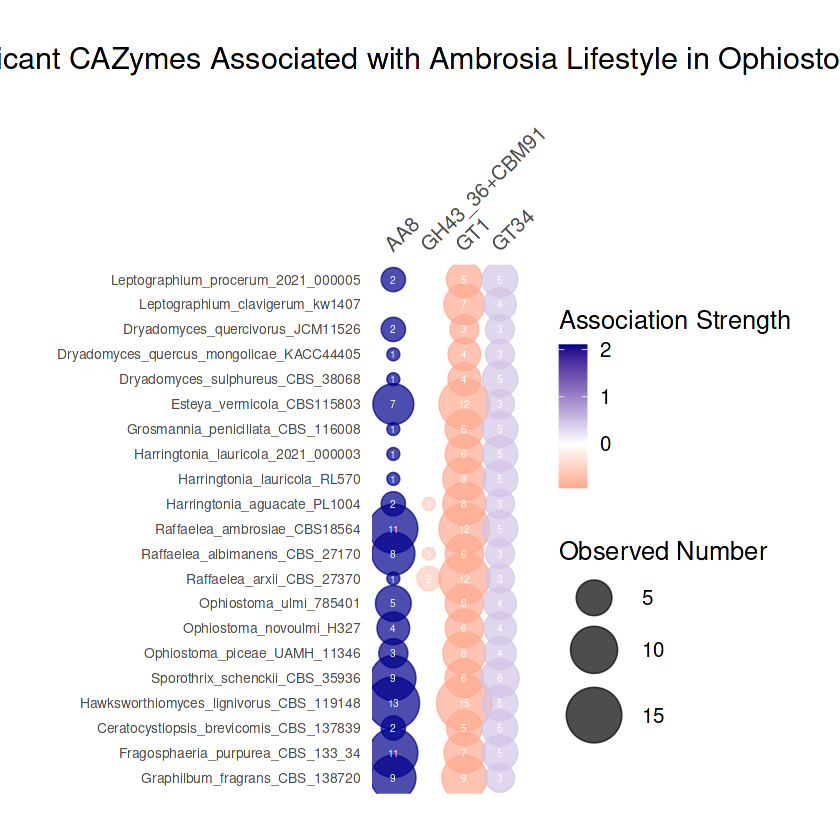

Rows: 496 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Trait, Predictor
dbl (4): Estimate, StdError, tValue, pValue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 58 Columns: 499
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (3): FungusName_Strain, Ambrosia, Family
dbl (496): AA1, AA1_2, AA1_3, AA1_3+AA3_2, AA1+AA1, AA1+CE1, AA1+GH76, AA11,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 58 Columns: 45
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (18): FungusName, Strain, FungusName_Strain, BeetleAssociate, Beetle_Evo...
dbl (27): Genome_size, TE_CoverageTotal, TE_CoverageTotal_Mbp

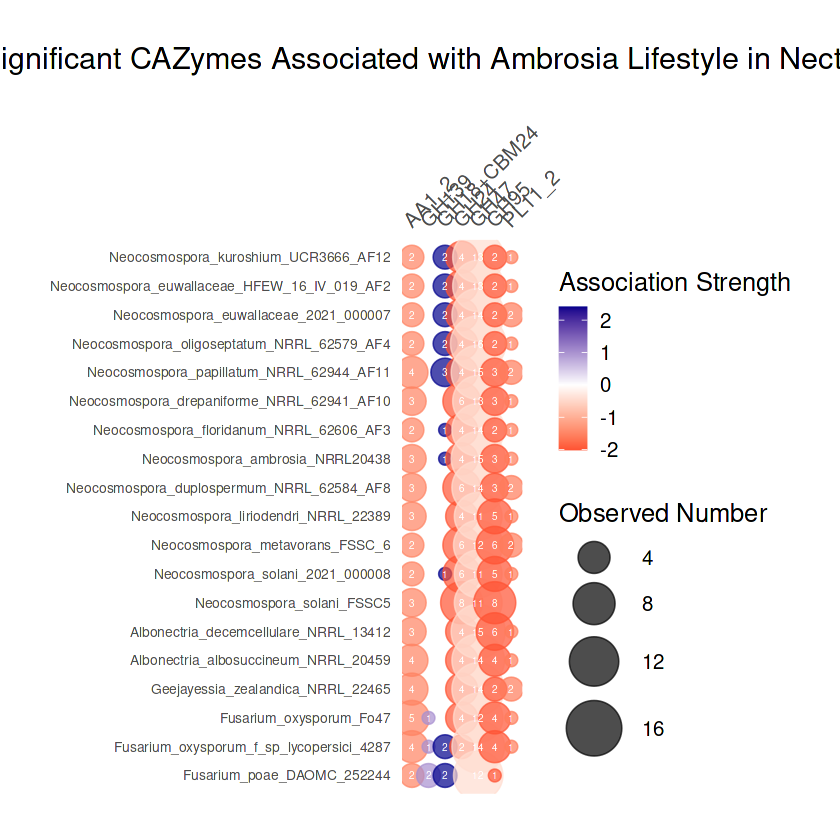

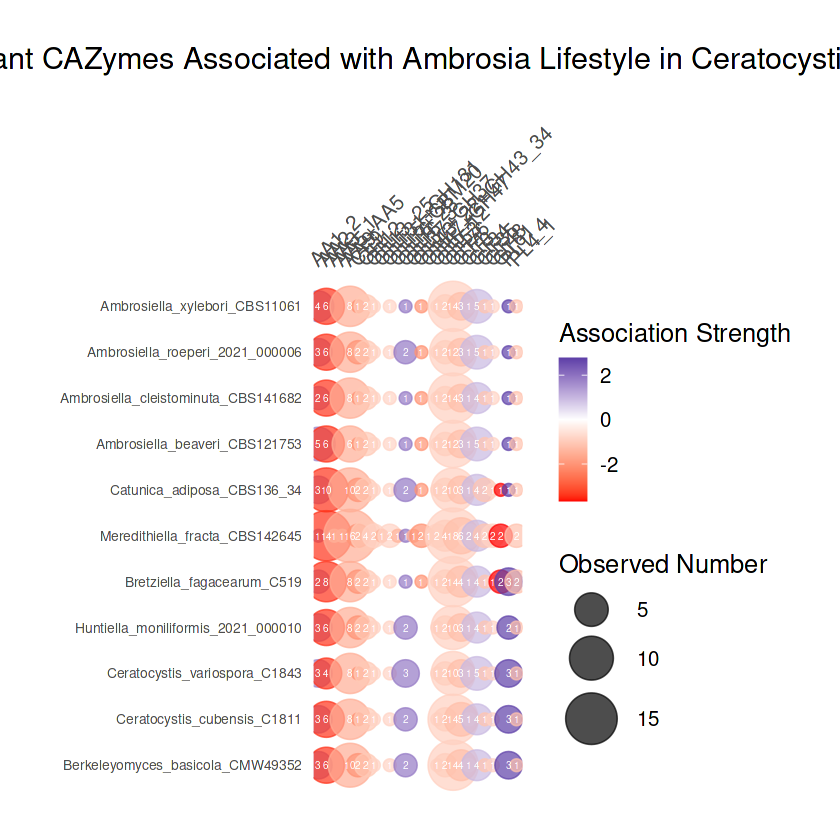

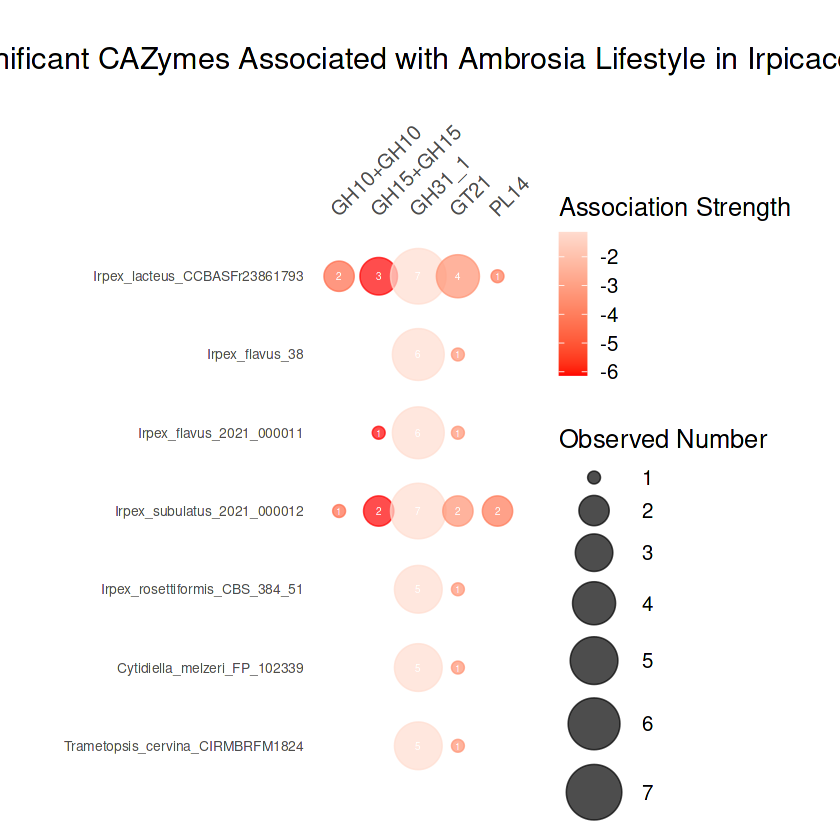

In [327]:
# Load necessary libraries
library(dplyr)
library(tidyr)
library(ggplot2)
library(readr)

# Plotting function
plot_results <- function(significant_results_path, merged_data_path, ambrosia_file_path, output_plot_path, family_name = NULL, plot_width = 10, plot_height = 10) {
  # Load significant results
  significant_results <- read_csv(significant_results_path)
  
  # Extract significant CAZyme groups based on p-value < 0.05
  significant_cazyme_groups <- significant_results %>%
    filter(pValue < 0.05) %>%
    pull(Trait)
  
  # Load the data
  dat <- read_csv(merged_data_path)
  
  # Load the Ambrosia data to get CladeOrder
  ambrosia_data <- read_csv(ambrosia_file_path)
  
  # Filter data by family if family_name is provided
  if (!is.null(family_name)) {
    dat <- dat %>%
      filter(Family == family_name)
    ambrosia_data <- ambrosia_data %>%
      filter(FungusName_Strain %in% dat$FungusName_Strain)
  }
  
  # Ensure the significant CAZyme groups exist in the data
  existing_cazyme_groups <- intersect(significant_cazyme_groups, colnames(dat))
  
  # Merge the normalized data with CladeOrder
  bubble_data <- dat %>%
    inner_join(ambrosia_data %>% select(FungusName_Strain, CladeOrder), by = c("FungusName_Strain" = "FungusName_Strain")) %>%
    select(FungusName_Strain, Ambrosia, CladeOrder, all_of(existing_cazyme_groups))
  
  # Filter out the outgroup "Ambrosia"
  bubble_data <- bubble_data %>%
    filter(Ambrosia != "outgroup")
  
  # Arrange the data by CladeOrder in descending order
  bubble_data <- bubble_data %>%
    arrange(CladeOrder)
  
  # Convert the data to a long format for ggplot2
  bubble_data_long <- bubble_data %>%
    gather(key = "CAZyme_Group", value = "Observed_Number", -FungusName_Strain, -Ambrosia, -CladeOrder)
  
  # Filter out rows with Observed_Number equal to 0
  bubble_data_long <- bubble_data_long %>%
    filter(Observed_Number != 0)
  
  # Ensure the order of the species for the plot is based on CladeOrder in descending order
  bubble_data_long <- bubble_data_long %>%
    mutate(FungusName_Strain = factor(FungusName_Strain, levels = rev(unique(bubble_data$FungusName_Strain))))
  
  # Create a new column for CAZyme group based on the first two letters
  bubble_data_long <- bubble_data_long %>%
    mutate(CAZyme_Group_Short = substr(CAZyme_Group, 1, 2))
  
  # Merge with significant results to get the Estimate for coloring
  bubble_data_long <- bubble_data_long %>%
    left_join(significant_results %>% select(Trait, Estimate), by = c("CAZyme_Group" = "Trait"))
  
  # Create the bubble plot with white background and no grid lines
  p <- ggplot(bubble_data_long, aes(x = CAZyme_Group, 
                                    y = FungusName_Strain, 
                                    color = Estimate, 
                                    size = Observed_Number)) +
    geom_point(alpha = 0.7) +
    scale_size_continuous(name = "Observed Number", range = c(3, 15)) +  # Increase bubble size range
    scale_color_gradient2(low = "red", mid = "white", high = "darkblue", midpoint = 0, name = "Association Strength") +  # Use gradient for association strength
    geom_text(aes(label = Observed_Number), vjust = 0.5, hjust = 0.5, colour = "white", size = 2) +  # Add text labels
    theme_minimal(base_size = 15) +
    theme(panel.background = element_rect(fill = "white", color = NA),
          plot.background = element_rect(fill = "white", color = NA),
          panel.grid = element_blank(),  # Remove grid lines
          axis.text.x = element_text(angle = 45, hjust = 0),
          axis.text.y = element_text(size = 8),
          plot.title = element_text(hjust = 0.5),
          plot.margin = margin(t = 1, r = 1, b = 1, l = 1, unit = "cm"),
          axis.title.x = element_blank(),  # Remove x-axis title from the bottom
          axis.title.x.top = element_text()) +  # Add x-axis title to the top
    labs(title = paste("Significant CAZymes Associated with Ambrosia Lifestyle", if (!is.null(family_name)) paste("in", family_name) else ""),
         x = "",
         y = "") +
    scale_x_discrete(position = "top")  # Move x-axis to the top
  
  # Save the plot as a PDF with adjusted size
  ggsave(output_plot_path, plot = p, width = plot_width, height = plot_height, units = "in")
  
  # Print the plot to the screen
  print(p)
}

# Paths to input files and output directories
ambrosia_file_path <- "AmbrosiaFungiGenomeFeature_sub.csv"
merged_data_path <- "CAZyme_merged_data.csv"
output_directory <- "plots/"

# Ensure the output directory exists
if (!dir.exists(output_directory)) {
  dir.create(output_directory)
}

# Generate plots for all species with adjusted size
plot_results("CAZyme_PIC_test_summary_results_all_species.csv", merged_data_path, ambrosia_file_path, file.path(output_directory, "CAZyme_bubble_plot_all_species.pdf"), plot_width = 10, plot_height = 13)  # Adjust the width and height as needed

# Specify plot sizes for each family
family_plot_sizes <- list(
  Ophiostomataceae = c(7.5, 10),
  Nectriaceae = c(8.5, 10),
  Ceratocystidaceae = c(11, 10),
  Irpicaceae = c(7, 7)
)

# Generate plots for each family with specified sizes
families <- c("Ophiostomataceae", "Nectriaceae", "Ceratocystidaceae", "Irpicaceae")

for (family in families) {
  significant_results_path <- paste0("CAZyme_PIC_test_summary_results_", family, ".csv")
  output_plot_path <- file.path(output_directory, paste0("CAZyme_bubble_plot_", family, ".pdf"))
  plot_size <- family_plot_sizes[[family]]
  plot_results(significant_results_path, merged_data_path, ambrosia_file_path, output_plot_path, family, plot_width = plot_size[1], plot_height = plot_size[2])
}


Rows: 494 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Trait, Predictor
dbl (4): Estimate, StdError, tValue, pValue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 58 Columns: 45
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (18): FungusName, Strain, FungusName_Strain, BeetleAssociate, Beetle_Evo...
dbl (27): Genome_size, TE_CoverageTotal, TE_CoverageTotal_Mbp, Num_Gene, Num...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


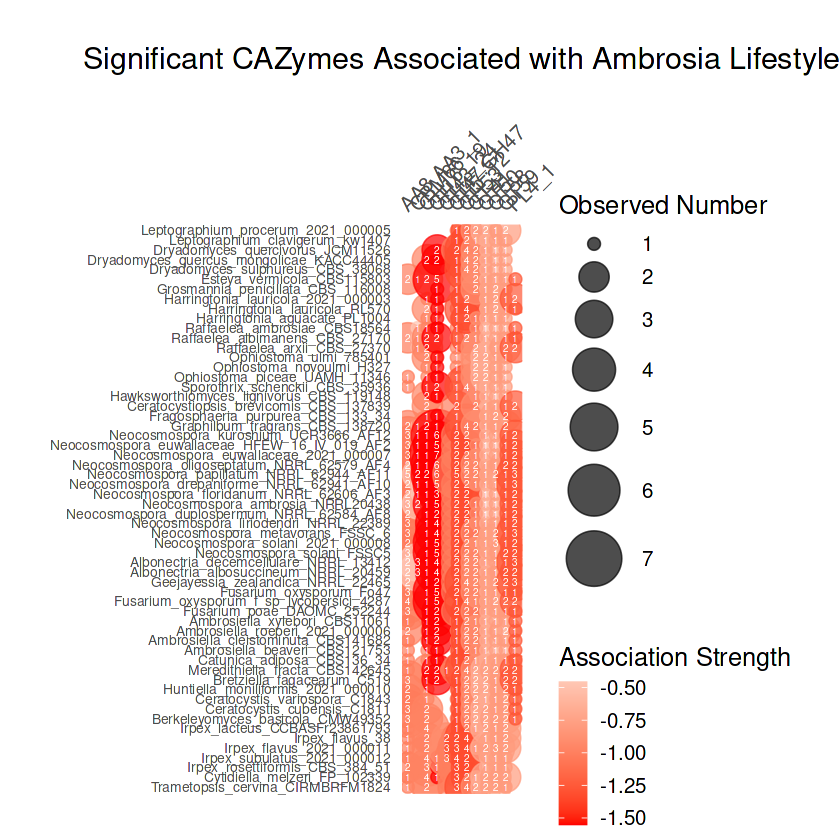

In [307]:
# # Load necessary libraries
# library(dplyr)
# library(tidyr)
# library(ggplot2)
# library(readr)

# # Load the significant results from the previous statistical test
# significant_results_path <- "CAZyme_PIC_test_summary_results.csv"
# significant_results <- read_csv(significant_results_path)

# # Extract the significant CAZyme groups based on p-value < 0.05
# significant_cazyme_groups <- significant_results %>%
#   filter(pValue < 0.05) %>%
#   pull(Trait)
# #significant_cazyme_groups <- c(significant_cazyme_groups, 'AA3')

# # Load the data
# dat <- read.csv("CAZyme_merged_data.csv")

# # Load the Ambrosia data to get CladeOrder
# ambrosia_file_path <- "AmbrosiaFungiGenomeFeature_sub.csv"
# ambrosia_data <- read_csv(ambrosia_file_path)

# # Merge the normalized data with CladeOrder
# bubble_data <- dat %>%
#   inner_join(ambrosia_data %>% select(FungusName_Strain, CladeOrder), by = c("FungusName_Strain" = "FungusName_Strain")) %>%
#   select(FungusName_Strain, Ambrosia, CladeOrder, all_of(significant_cazyme_groups))

# # Filter out the outgroup "Ambrosia"
# bubble_data <- bubble_data %>%
#   filter(Ambrosia != "outgroup")

# # Arrange the data by CladeOrder in descending order
# bubble_data <- bubble_data %>%
#   arrange(CladeOrder)

# # Convert the data to a long format for ggplot2
# bubble_data_long <- bubble_data %>%
#   gather(key = "CAZyme_Group", value = "Observed_Number", -FungusName_Strain, -Ambrosia, -CladeOrder)

# # Filter out rows with Observed_Number equal to 0
# bubble_data_long <- bubble_data_long %>%
#   filter(Observed_Number != 0)

# # Ensure the order of the species for the plot is based on CladeOrder in descending order
# bubble_data_long <- bubble_data_long %>%
#   mutate(FungusName_Strain = factor(FungusName_Strain, levels = rev(unique(bubble_data$FungusName_Strain))))

# # Create a new column for CAZyme group based on the first two letters
# bubble_data_long <- bubble_data_long %>%
#   mutate(CAZyme_Group_Short = substr(CAZyme_Group, 1, 2))

# # Merge with significant results to get the Estimate for coloring
# bubble_data_long <- bubble_data_long %>%
#   left_join(significant_results %>% select(Trait, Estimate), by = c("CAZyme_Group" = "Trait"))

# # Create the bubble plot with white background and no grid lines
# p <- ggplot(bubble_data_long, aes(x = CAZyme_Group, 
#                                   y = FungusName_Strain, 
#                                   color = Estimate, 
#                                   size = Observed_Number)) +
#   geom_point(alpha = 0.7) +
#   scale_size_continuous(name = "Observed Number", range = c(3, 15)) +  # Increase bubble size range
#   scale_color_gradient2(low = "red", mid = "white", high = "darkblue", midpoint = 0, name = "Association Strength") +  # Use gradient for association strength
#   geom_text(aes(label = Observed_Number), vjust = 0.5, hjust = 0.5, colour = "white", size = 2) +  # Add text labels
#   theme_minimal(base_size = 15) +
#   theme(panel.background = element_rect(fill = "white", color = NA),
#         plot.background = element_rect(fill = "white", color = NA),
#         panel.grid = element_blank(),  # Remove grid lines
#         axis.text.x = element_text(angle = 45, hjust = 0),
#         axis.text.y = element_text(size = 8),
#         plot.title = element_text(hjust = 0.5),
#         plot.margin = margin(t = 1, r = 1, b = 1, l = 1, unit = "cm"),
#         axis.title.x = element_blank(),  # Remove x-axis title from the bottom
#         axis.title.x.top = element_text()) +  # Add x-axis title to the top
#   labs(title = "Significant CAZymes Associated with Ambrosia Lifestyle",
#        x = "",
#        y = "") +
#   scale_x_discrete(position = "top")  # Move x-axis to the top

# # Save the plot as a PDF with adjusted size
# ggsave("CAZyme_bubble_plot_significant_normalized_annotations.pdf", plot = p, width = 12, height = 10, units = "in")

# # Print the plot to the screen
# print(p)


In [93]:
write.csv(significant_cazyme_groups, "significant_cazyme_groups.csv", row.names = F)

In [95]:
significant_cazyme_groups

[1] "AA13.CBM20" "AA16"       "AA8.AA3_1"  "AA9"        "GH10"      
 [6] "GH128.GT2"  "GH130_3"    "GH16_19"    "GH43_24"    "GH5_12"    
[11] "GH5_41"     "GH7"        "GH94"       "GT21"       "GT3"       
[16] "GT50"       "GT58"       "GT59"       "GT76"       "GT90"      
[21] "PL4_1"

### CSEPs

In [96]:
# Load necessary libraries
library(dplyr)
library(tidyr)
library(readr)

# Load the CSEPs data
CSEPs_file_path <- "Orthogroups_meta_db_tool_annot_toolMod_CZAyme_substrate.csv"
CSEPs_data <- read_csv(CSEPs_file_path)

# Load the Ambrosia data
ambrosia_file_path <- "AmbrosiaFungiGenomeFeature_sub.csv"
ambrosia_data <- read_csv(ambrosia_file_path)

# Filter the CSEPs data where 'tool' is 'CSEPs'
CSEPs_filtered <- CSEPs_data %>% filter(tool == "CSEPs")

# Count the occurrences of each unique 'annotation' for each 'acc'
CSEPs_counts <- CSEPs_filtered %>%
  group_by(acc, annotation) %>%
  summarize(count = n()) %>%
  ungroup()

# Filter out rows where annotation is "-"
CSEPs_counts_filtered <- CSEPs_counts %>%
  filter(annotation != "-")

# Pivot the data to create a matrix suitable for analysis
CSEPs_matrix <- CSEPs_counts_filtered %>%
  spread(key = annotation, value = count, fill = 0)

# Merge with ambrosia data
merged_data <- ambrosia_data %>%
  select(FungusName_Strain, Ambrosia) %>%
  right_join(CSEPs_matrix, by = c("FungusName_Strain" = "acc"))

# Export the log-normalized data to a CSV file
write.csv(merged_data, "CSEPs_merged_data.csv", row.names = FALSE)

Rows: 381603 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): Orthogroup, genes, acc, Family, Genus, Ambrosia, tool, tool_substra...
dbl (5): n_genomes, n_genes, n_genes_genome, Num_Gene, Secret_protein

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 60 Columns: 45
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (18): FungusName, Strain, FungusName_Strain, BeetleAssociate, Beetle_Evo...
dbl (27): Genome_size, TE_CoverageTotal, TE_CoverageTotal_Mbp, Num_Gene, Num...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'acc'. You can override using the `.groups`
argument.


Rows: 493 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Trait, Predictor
dbl (4): Estimate, StdError, tValue, pValue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 70 Columns: 496
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (3): FungusName_Strain, Ambrosia, Family
dbl (493): AA1, AA1_2, AA1_3, AA1_3+AA3_2, AA1+AA1, AA1+CE1, AA1+GH76, AA11,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 58 Columns: 45
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (18): FungusName, Strain, FungusName_Strain, BeetleAssociate, Beetle_Evo...
dbl (27): Genome_size, TE_CoverageTotal, TE_CoverageTotal_Mbp

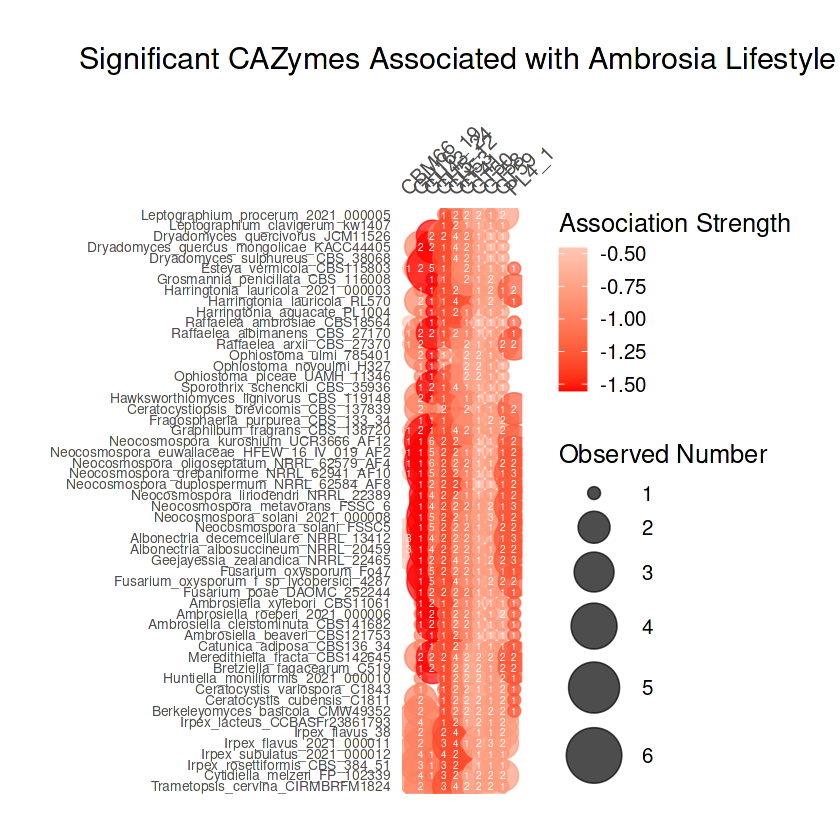

Rows: 493 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Trait, Predictor
dbl (4): Estimate, StdError, tValue, pValue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 70 Columns: 496
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (3): FungusName_Strain, Ambrosia, Family
dbl (493): AA1, AA1_2, AA1_3, AA1_3+AA3_2, AA1+AA1, AA1+CE1, AA1+GH76, AA11,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 58 Columns: 45
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (18): FungusName, Strain, FungusName_Strain, BeetleAssociate, Beetle_Evo...
dbl (27): Genome_size, TE_CoverageTotal, TE_CoverageTotal_Mbp

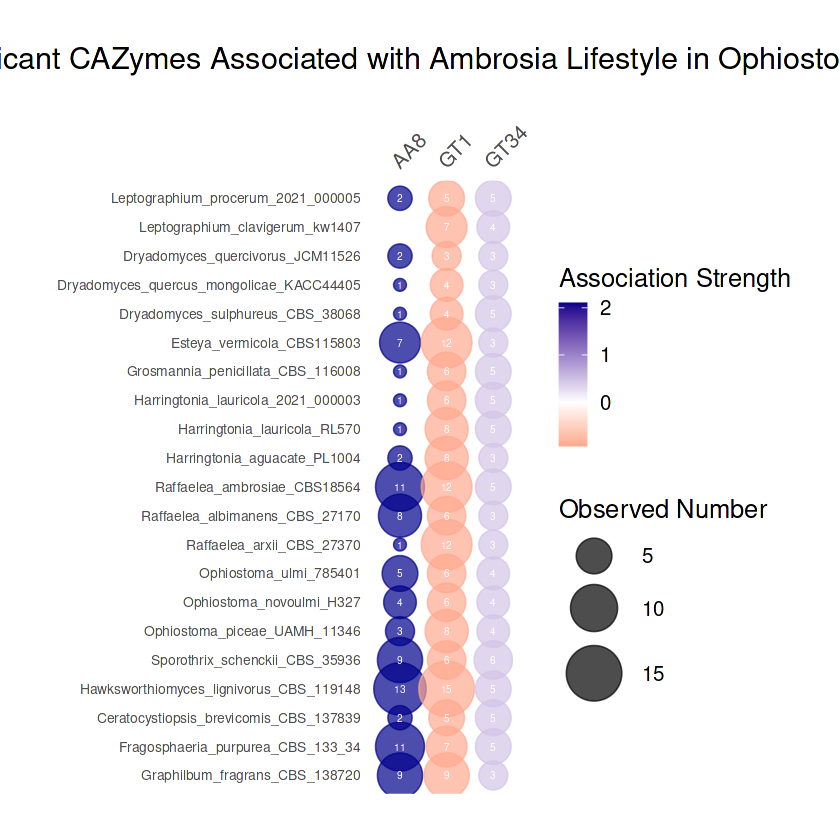

Rows: 493 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Trait, Predictor
dbl (4): Estimate, StdError, tValue, pValue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 70 Columns: 496
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (3): FungusName_Strain, Ambrosia, Family
dbl (493): AA1, AA1_2, AA1_3, AA1_3+AA3_2, AA1+AA1, AA1+CE1, AA1+GH76, AA11,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 58 Columns: 45
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (18): FungusName, Strain, FungusName_Strain, BeetleAssociate, Beetle_Evo...
dbl (27): Genome_size, TE_CoverageTotal, TE_CoverageTotal_Mbp

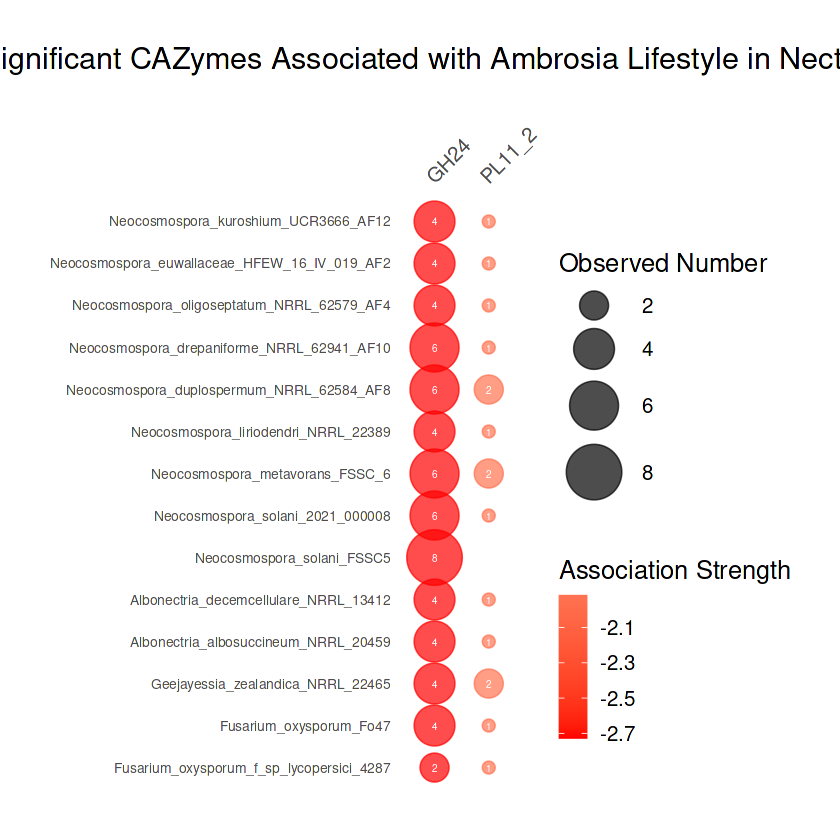

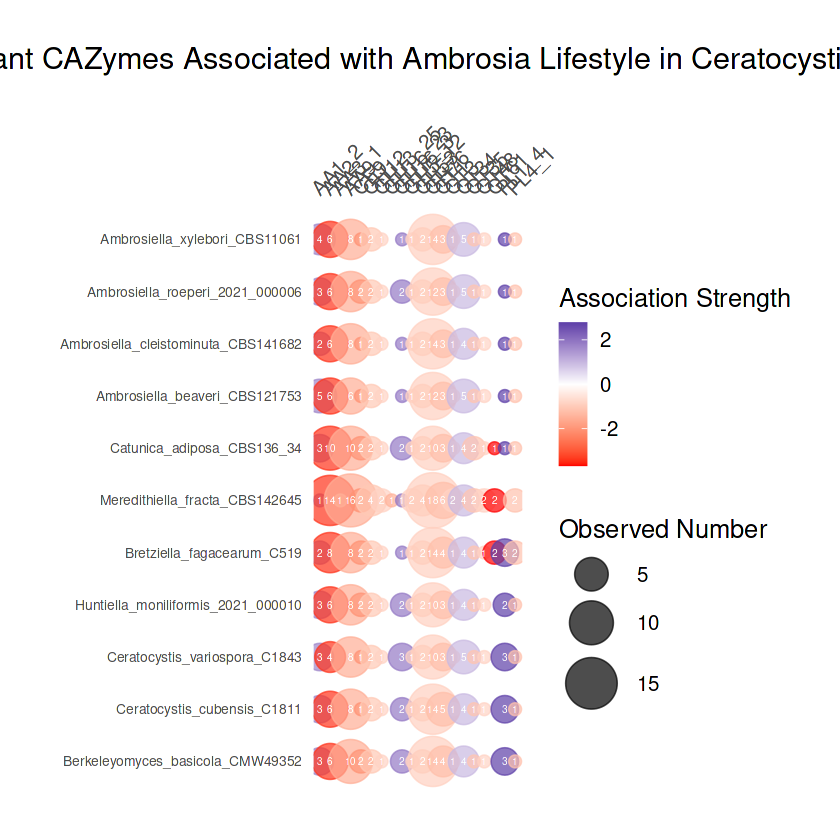

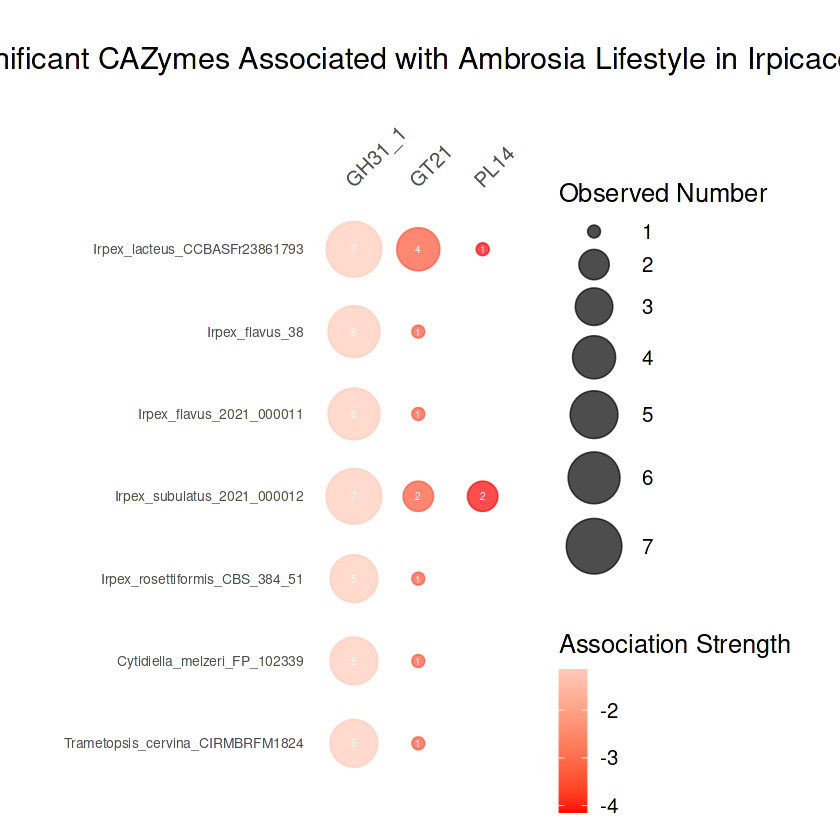

In [163]:
# Load necessary libraries
library(dplyr)
library(tidyr)
library(ggplot2)
library(readr)

# Plotting function
plot_results <- function(significant_results_path, merged_data_path, ambrosia_file_path, output_plot_path, family_name = NULL, plot_width = 12, plot_height = 10) {
  # Load significant results
  significant_results <- read_csv(significant_results_path)
  
  # Extract significant CAZyme groups based on p-value < 0.05
  significant_cazyme_groups <- significant_results %>%
    filter(pValue < 0.05) %>%
    pull(Trait)
  
  # Load the data
  dat <- read_csv(merged_data_path)
  
  # Load the Ambrosia data to get CladeOrder
  ambrosia_data <- read_csv(ambrosia_file_path)
  
  # Filter data by family if family_name is provided
  if (!is.null(family_name)) {
    dat <- dat %>%
      filter(Family == family_name)
    ambrosia_data <- ambrosia_data %>%
      filter(FungusName_Strain %in% dat$FungusName_Strain)
  }
  
  # Ensure the significant CAZyme groups exist in the data
  existing_cazyme_groups <- intersect(significant_cazyme_groups, colnames(dat))
  
  # Merge the normalized data with CladeOrder
  bubble_data <- dat %>%
    inner_join(ambrosia_data %>% select(FungusName_Strain, CladeOrder), by = c("FungusName_Strain" = "FungusName_Strain")) %>%
    select(FungusName_Strain, Ambrosia, CladeOrder, all_of(existing_cazyme_groups))
  
  # Filter out the outgroup "Ambrosia"
  bubble_data <- bubble_data %>%
    filter(Ambrosia != "outgroup")
  
  # Arrange the data by CladeOrder in descending order
  bubble_data <- bubble_data %>%
    arrange(CladeOrder)
  
  # Convert the data to a long format for ggplot2
  bubble_data_long <- bubble_data %>%
    gather(key = "CAZyme_Group", value = "Observed_Number", -FungusName_Strain, -Ambrosia, -CladeOrder)
  
  # Filter out rows with Observed_Number equal to 0
  bubble_data_long <- bubble_data_long %>%
    filter(Observed_Number != 0)
  
  # Ensure the order of the species for the plot is based on CladeOrder in descending order
  bubble_data_long <- bubble_data_long %>%
    mutate(FungusName_Strain = factor(FungusName_Strain, levels = rev(unique(bubble_data$FungusName_Strain))))
  
  # Create a new column for CAZyme group based on the first two letters
  bubble_data_long <- bubble_data_long %>%
    mutate(CAZyme_Group_Short = substr(CAZyme_Group, 1, 2))
  
  # Merge with significant results to get the Estimate for coloring
  bubble_data_long <- bubble_data_long %>%
    left_join(significant_results %>% select(Trait, Estimate), by = c("CAZyme_Group" = "Trait"))
  
  # Create the bubble plot with white background and no grid lines
  p <- ggplot(bubble_data_long, aes(x = CAZyme_Group, 
                                    y = FungusName_Strain, 
                                    color = Estimate, 
                                    size = Observed_Number)) +
    geom_point(alpha = 0.7) +
    scale_size_continuous(name = "Observed Number", range = c(3, 15)) +  # Increase bubble size range
    scale_color_gradient2(low = "red", mid = "white", high = "darkblue", midpoint = 0, name = "Association Strength") +  # Use gradient for association strength
    geom_text(aes(label = Observed_Number), vjust = 0.5, hjust = 0.5, colour = "white", size = 2) +  # Add text labels
    theme_minimal(base_size = 15) +
    theme(panel.background = element_rect(fill = "white", color = NA),
          plot.background = element_rect(fill = "white", color = NA),
          panel.grid = element_blank(),  # Remove grid lines
          axis.text.x = element_text(angle = 45, hjust = 0),
          axis.text.y = element_text(size = 8),
          plot.title = element_text(hjust = 0.5),
          plot.margin = margin(t = 1, r = 1, b = 1, l = 1, unit = "cm"),
          axis.title.x = element_blank(),  # Remove x-axis title from the bottom
          axis.title.x.top = element_text()) +  # Add x-axis title to the top
    labs(title = paste("Significant CAZymes Associated with Ambrosia Lifestyle", if (!is.null(family_name)) paste("in", family_name) else ""),
         x = "",
         y = "") +
    scale_x_discrete(position = "top")  # Move x-axis to the top
  
  # Save the plot as a PDF with adjusted size
  ggsave(output_plot_path, plot = p, width = plot_width, height = plot_height, units = "in")
  
  # Print the plot to the screen
  print(p)
}

# Paths to input files and output directories
ambrosia_file_path <- "AmbrosiaFungiGenomeFeature_sub.csv"
merged_data_path <- "CAZyme_merged_data.csv"
output_directory <- "plots/"

# Ensure the output directory exists
if (!dir.exists(output_directory)) {
  dir.create(output_directory)
}

# Generate plots for all species
plot_results("CAZyme_PIC_test_summary_results_all_species.csv", merged_data_path, ambrosia_file_path, file.path(output_directory, "CAZyme_bubble_plot_all_species.pdf"))

# Specify plot sizes for each family
family_plot_sizes <- list(
  Ophiostomataceae = c(7, 10),
  Nectriaceae = c(7, 10),
  Ceratocystidaceae = c(11, 10),
  Irpicaceae = c(7, 8)
)

# Generate plots for each family with specified sizes
families <- c("Ophiostomataceae", "Nectriaceae", "Ceratocystidaceae", "Irpicaceae")

for (family in families) {
  significant_results_path <- paste0("CAZyme_PIC_test_summary_results_", family, ".csv")
  output_plot_path <- file.path(output_directory, paste0("CAZyme_bubble_plot_", family, ".pdf"))
  plot_size <- family_plot_sizes[[family]]
  plot_results(significant_results_path, merged_data_path, ambrosia_file_path, output_plot_path, family, plot_width = plot_size[1], plot_height = plot_size[2])
}


In [97]:
# Log normalize the CSEPs counts for each group
merged_data <- read.csv("CSEPs_merged_data.csv" )

log_normalized_data <- merged_data %>%
  mutate(across(-c(FungusName_Strain, Ambrosia), ~ log1p(.)))

# Drop columns with NaN values
log_normalized_data <- log_normalized_data %>%
  select(where(~ !any(is.nan(.))))

# Export the log-normalized data to a CSV file
write_csv(log_normalized_data, "CSEPs_log_normalized_data.csv")

In [102]:
# Load necessary libraries
library(dplyr)
library(tidyr)
library(ggplot2)
library(readr)

# Load the significant results from the previous statistical test
significant_results_path <- "CSEPs_PIC_test_summary_results.csv"
significant_results <- read_csv(significant_results_path)

# Extract the significant CSEPs groups based on p-value < 0.05
significant_CSEPs_groups <- significant_results %>%
  filter(pValue < 0.05) %>%
  pull(Trait)
#significant_CSEPs_groups <- c(significant_CSEPs_groups, 'AA3')

# Load the data
dat <- read.csv("CSEPs_merged_data.csv")

# Load the Ambrosia data to get CladeOrder
ambrosia_file_path <- "AmbrosiaFungiGenomeFeature_sub.csv"
ambrosia_data <- read_csv(ambrosia_file_path)

# Merge the normalized data with CladeOrder
bubble_data <- dat %>%
  inner_join(ambrosia_data %>% select(FungusName_Strain, CladeOrder), by = c("FungusName_Strain" = "FungusName_Strain")) %>%
  select(FungusName_Strain, Ambrosia, CladeOrder, all_of(significant_CSEPs_groups))

# Filter out the outgroup "Ambrosia"
bubble_data <- bubble_data %>%
  filter(Ambrosia != "outgroup")

# Arrange the data by CladeOrder in descending order
bubble_data <- bubble_data %>%
  arrange(CladeOrder)

# Convert the data to a long format for ggplot2
bubble_data_long <- bubble_data %>%
  gather(key = "CSEPs_Group", value = "Observed_Number", -FungusName_Strain, -Ambrosia, -CladeOrder)

# Filter out rows with Observed_Number equal to 0
bubble_data_long <- bubble_data_long %>%
  filter(Observed_Number != 0)

# Ensure the order of the species for the plot is based on CladeOrder in descending order
bubble_data_long <- bubble_data_long %>%
  mutate(FungusName_Strain = factor(FungusName_Strain, levels = rev(unique(bubble_data$FungusName_Strain))))

# Create a new column for CSEPs group based on the first two letters
bubble_data_long <- bubble_data_long %>%
  mutate(CSEPs_Group_Short = substr(CSEPs_Group, 1, 2))

# Merge with significant results to get the Estimate for coloring
bubble_data_long <- bubble_data_long %>%
  left_join(significant_results %>% select(Trait, Estimate), by = c("CSEPs_Group" = "Trait"))

# Create the bubble plot with white background and no grid lines
p <- ggplot(bubble_data_long, aes(x = CSEPs_Group, 
                                  y = FungusName_Strain, 
                                  color = Estimate, 
                                  size = Observed_Number)) +
  geom_point(alpha = 0.9) +
  scale_size_continuous(name = "Observed Number", range = c(3, 15)) +  # Increase bubble size range
  scale_color_gradient2(low = "red", mid = "white", high = "darkblue", midpoint = 0, name = "Association Strength") +  # Use gradient for association strength
  geom_text(aes(label = Observed_Number), vjust = 0.5, hjust = 0.5, colour = "white", size = 2) +  # Add text labels
  theme_minimal(base_size = 15) +
  theme(panel.background = element_rect(fill = "white", color = NA),
        plot.background = element_rect(fill = "white", color = NA),
        panel.grid = element_blank(),  # Remove grid lines
        axis.text.x = element_text(angle = 45, hjust = 0),
        axis.text.y = element_text(size = 8),
        plot.title = element_text(hjust = 0.5),
        plot.margin = margin(t = 1, r = 1, b = 1, l = 1, unit = "cm"),
        axis.title.x = element_blank(),  # Remove x-axis title from the bottom
        axis.title.x.top = element_text()) +  # Add x-axis title to the top
  labs(title = "Significant CSEPss Associated with Ambrosia Lifestyle",
       x = "",
       y = "") +
  scale_x_discrete(position = "top")  # Move x-axis to the top

# Save the plot as a PDF with adjusted size
ggsave("CSEPs_bubble_plot_significant_normalized_annotations.pdf", plot = p, width = 12, height = 10, units = "in")

# Print the plot to the screen
print(p)


Rows: 310 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Trait, Predictor
dbl (5): number, Estimate, StdError, tValue, pValue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 60 Columns: 45
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (18): FungusName, Strain, FungusName_Strain, BeetleAssociate, Beetle_Evo...
dbl (27): Genome_size, TE_CoverageTotal, TE_CoverageTotal_Mbp, Num_Gene, Num...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ERROR: [1m[33mError[39m in `select()`:[22m
[1m[22m[36mℹ[39m In argument: `all_of(significant_CSEPs_groups)`.
[1mCaused by error in `all_of()`:[22m
[33m![39m Can't subset elements that don't exist.
[31m✖[39m Elements `Ca2..binding.multifunctional.protein.that.plays.key.roles.in.the.parasitism..immune.evasion..reproduction.and.pathogenesis.`, `encodes.alpha..1.2..mannosyltransferase`, `protein.disulfide.isomerase`, `putative.phosphoglycerate.mutase.family`, `secreted..1.3..glucanase`, etc. don't exist.


Rows: 310 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Trait, Predictor
dbl (5): number, Estimate, StdError, tValue, pValue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 51 Columns: 41
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): FungusName, Strain, FungusName_Strain, BeetleAssociate, Beetle_Evo...
dbl (27): Genome_size, TE_CoverageTotal, TE_CoverageTotal_Mbp, Num_Gene, Num...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Dark2 is 8
Returning the palette you asked for with that many colors
”
Warning message:
“Removed 7 rows containing missing 

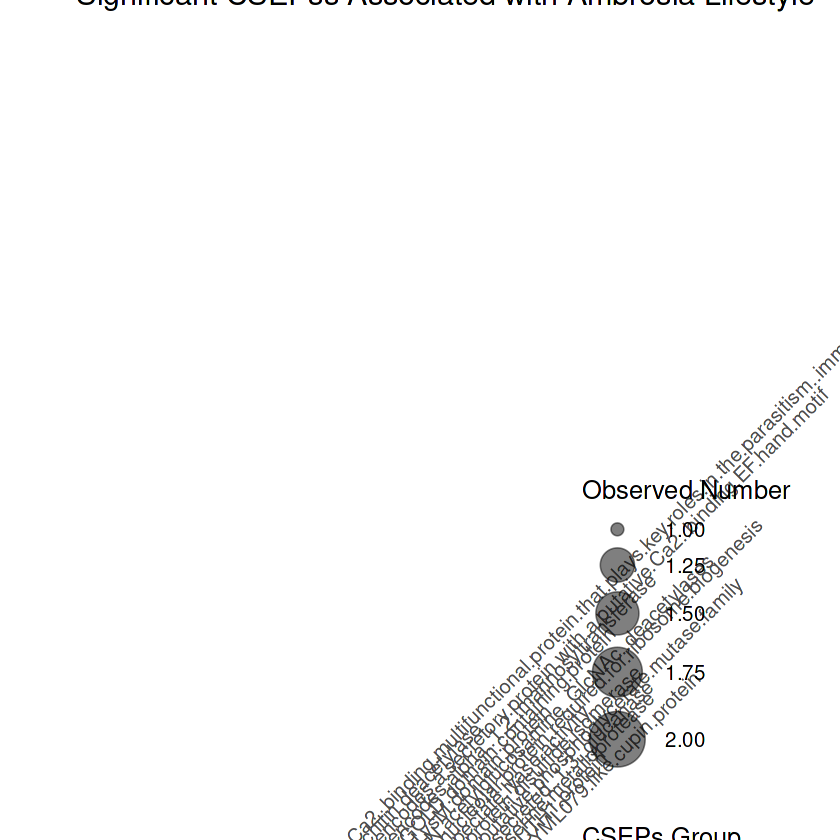

In [132]:
# Load necessary libraries
library(dplyr)
library(tidyr)
library(ggplot2)
library(readr)

# Load the significant results from the previous statistical test
significant_results_path <- "CSEPs_PIC_test_summary_results.csv"
significant_results <- read_csv(significant_results_path)

# Extract the significant CSEPs groups based on p-value < 0.05
significant_CSEPs_groups <- significant_results %>%
  filter(pValue < 0.05) %>%
  pull(Trait)

# Load the data
dat <- read.csv("CSEPs_merged_data.csv")

# Load the Ambrosia data to get CladeOrder
ambrosia_file_path <- "AmbrosiaFungiGenomeFeature_sub.csv"
ambrosia_data <- read_csv(ambrosia_file_path)

# Merge the normalized data with CladeOrder
bubble_data <- dat %>%
  inner_join(ambrosia_data %>% select(FungusName_Strain, CladeOrder), by = c("FungusName_Strain" = "FungusName_Strain")) %>%
  select(FungusName_Strain, Ambrosia, CladeOrder, all_of(significant_CSEPs_groups))

# Filter out the outgroup "Ambrosia"
bubble_data <- bubble_data %>%
  filter(Ambrosia != "outgroup")

# Arrange the data by CladeOrder in descending order
bubble_data <- bubble_data %>%
  arrange(CladeOrder)

# Convert the data to a long format for ggplot2
bubble_data_long <- bubble_data %>%
  gather(key = "CSEPs_Group", value = "Observed_Number", -FungusName_Strain, -Ambrosia, -CladeOrder)

# Filter out rows with Observed_Number equal to 0
bubble_data_long <- bubble_data_long %>%
  filter(Observed_Number != 0)

# Ensure the order of the species for the plot is based on CladeOrder in descending order
bubble_data_long <- bubble_data_long %>%
  mutate(FungusName_Strain = factor(FungusName_Strain, levels = rev(unique(bubble_data$FungusName_Strain))))

# Create a new column for CSEPs group based on the first two letters
bubble_data_long <- bubble_data_long %>%
  mutate(CSEPs_Group_Short = substr(CSEPs_Group, 1, 2))

# Create the bubble plot with white background and no grid lines
p <- ggplot(bubble_data_long, aes(x = CSEPs_Group, 
                                  y = FungusName_Strain, 
                                  color = CSEPs_Group_Short, 
                                  size = Observed_Number)) +
  geom_point(alpha = 0.5) +
  scale_size_continuous(name = "Observed Number", range = c(3, 15)) +  # Increase bubble size range
  scale_color_brewer(palette = "Dark2", name = "CSEPs Group") +  # Using ColorBrewer palette
  geom_text(aes(label = Observed_Number), vjust = 0.5, hjust = 0.5, colour = "white", size = 2) +  # Add text labels
  theme_minimal(base_size = 15) +
  theme(panel.background = element_rect(fill = "white", color = NA),
        plot.background = element_rect(fill = "white", color = NA),
        panel.grid = element_blank(),  # Remove grid lines
        axis.text.x = element_text(angle = 45, hjust = 0),
        axis.text.y = element_text(size = 8),
        plot.title = element_text(hjust = 0.5),
        plot.margin = margin(t = 1, r = 1, b = 1, l = 1, unit = "cm"),
        axis.title.x = element_blank(),  # Remove x-axis title from the bottom
        axis.title.x.top = element_text()) +  # Add x-axis title to the top
  labs(title = "Significant CSEPss Associated with Ambrosia Lifestyle",
       x = "",
       y = "") +
  scale_x_discrete(position = "top")  # Move x-axis to the top

# Save the plot as a PDF with adjusted size
ggsave("CSEPs_bubble_plot_significant_normalized_annotations.pdf", plot = p, width = 10, height = 15, units = "in")

# Print the plot to the screen
print(p)


In [136]:
unique(cazyme_data$tool)
unique(cazyme_data$tool_substrate)

[1] "Virulence"       "Lipase"          "CAZyme"          "Cytochrome P450"
[5] "Resistance"      "CSEPs"           "Peptidases"      "GH19"

[1] NA              "PCWDE"         "Cellulose"     "FCWDE"        
 [5] "Mannan"        "Chitin"        "Hemicellulose" "Glucan"       
 [9] "Pectin"        "Sucrose"       "Lignin"        "Peptidoglycan"

### Lipase

In [103]:
# Load necessary libraries
library(dplyr)
library(tidyr)
library(readr)

# Load the Lipase data
Lipase_file_path <- "Orthogroups_meta_db_tool_annot_toolMod_CZAyme_substrate.csv"
Lipase_data <- read_csv(Lipase_file_path)

# Load the Ambrosia data
ambrosia_file_path <- "AmbrosiaFungiGenomeFeature_sub.csv"
ambrosia_data <- read_csv(ambrosia_file_path)

# Filter the Lipase data where 'tool' is 'Lipase'
Lipase_filtered <- Lipase_data %>% filter(tool == "Lipase")

# Count the occurrences of each unique 'annotation' for each 'acc'
Lipase_counts <- Lipase_filtered %>%
  group_by(acc, annotation) %>%
  summarize(count = n()) %>%
  ungroup()

# Filter out rows where annotation is "-"
Lipase_counts_filtered <- Lipase_counts %>%
  filter(annotation != "-")

# Pivot the data to create a matrix suitable for analysis
Lipase_matrix <- Lipase_counts_filtered %>%
  spread(key = annotation, value = count, fill = 0)

# Merge with ambrosia data
merged_data <- ambrosia_data %>%
  select(FungusName_Strain, Ambrosia) %>%
  right_join(Lipase_matrix, by = c("FungusName_Strain" = "acc"))

# Filter the NA in Ambrosia
merged_data <- merged_data %>% filter(Ambrosia != "NA")

# Export the log-normalized data to a CSV file
write.csv(merged_data, "Lipase_merged_data.csv", row.names = FALSE)

Rows: 381603 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): Orthogroup, genes, acc, Family, Genus, Ambrosia, tool, tool_substra...
dbl (5): n_genomes, n_genes, n_genes_genome, Num_Gene, Secret_protein

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 60 Columns: 45
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (18): FungusName, Strain, FungusName_Strain, BeetleAssociate, Beetle_Evo...
dbl (27): Genome_size, TE_CoverageTotal, TE_CoverageTotal_Mbp, Num_Gene, Num...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'acc'. You can override using the `.groups`
argument.


In [104]:
# Log normalize the Lipase counts for each group
merged_data <- read.csv("Lipase_merged_data.csv" )

log_normalized_data <- merged_data %>%
  mutate(across(-c(FungusName_Strain, Ambrosia), ~ log1p(.)))

# Drop columns with NaN values
log_normalized_data <- log_normalized_data %>%
  select(where(~ !any(is.nan(.))))

# Export the log-normalized data to a CSV file
write_csv(log_normalized_data, "Lipase_log_normalized_data.csv")

In [105]:
# Load necessary libraries
library(ape)
library(phangorn)
library(dplyr)
library(tidyr)
library(readr)

# Load the phylogenetic tree
tree_file_path <- "concat_nooutgroup_rooted.contree"
tree <- read.tree(tree_file_path)

# Load the traits data
traits_file_path <- "Lipase_log_normalized_data.csv"
traits_data <- read_csv(traits_file_path)

# Ensure that the species names in traits match the tree
traits_data$species <- factor(traits_data$FungusName_Strain, levels = tree$tip.label)

# Create the Ambrosia predictor
ambrosia_predictor <- ifelse(traits_data$Ambrosia == 'Y', 0, 1)

# Use all columns except the first and second as trait_list
trait_list <- colnames(traits_data)[!colnames(traits_data) %in% c("FungusName_Strain", "Ambrosia")]

# Initialize a list to store PIC results
pic_results <- list()

# Loop through each trait and compute PIC, storing results
for(trait in trait_list) {
  if(all(!is.na(traits_data[[trait]]))) {  # check if there are no missing values for the trait
    pic_results[[trait]] <- pic(traits_data[[trait]], tree)
  }
}

# Function to match node contrasts with predictor values
match_pic_to_predictor <- function(pic_values, tree, predictor) {
  node_values <- pic_values
  internal_nodes <- (length(tree$tip.label) + 1):(length(tree$tip.label) + length(node_values))
  
  predictor_aligned <- numeric(length(node_values))
  
  for (i in 1:length(node_values)) {
    node <- internal_nodes[i]
    descendants <- Descendants(tree, node, type = "tips")[[1]]
    predictor_values <- predictor[descendants]
    predictor_aligned[i] <- mean(predictor_values)
  }
  
  return(predictor_aligned)
}

# Align the predictor values with the PIC results
aligned_predictor <- lapply(pic_results, match_pic_to_predictor, tree = tree, predictor = ambrosia_predictor)

# Convert the PIC results to a data frame for analysis
pic_data <- as.data.frame(do.call(cbind, lapply(pic_results, as.numeric)))
colnames(pic_data) <- names(pic_results)

# Convert the aligned predictor to a data frame
aligned_predictor_df <- as.data.frame(do.call(cbind, aligned_predictor))
colnames(aligned_predictor_df) <- paste0(names(aligned_predictor), "_predictor")

# Combine the PIC data and aligned predictor data
combined_data <- cbind(pic_data, aligned_predictor_df)

# Fit a linear model for each trait and store the results
lm_results <- list()

for(trait in names(pic_results)) {
  trait_predictor <- paste0(trait, "_predictor")
  lm_results[[trait]] <- summary(lm(combined_data[[trait]] ~ combined_data[[trait_predictor]]))
}

# Summarize the linear model results for each trait
summary_results <- data.frame(
  Trait = character(),
  Predictor = character(),
  Estimate = numeric(),
  StdError = numeric(),
  tValue = numeric(),
  pValue = numeric(),
  stringsAsFactors = FALSE
)

for(trait in names(pic_results)) {
  trait_predictor <- paste0(trait, "_predictor")
  lm_summary <- lm_results[[trait]]
  summary_results <- rbind(summary_results, data.frame(
    Trait = trait,
    Predictor = trait_predictor,
    Estimate = lm_summary$coefficients[2, "Estimate"],
    StdError = lm_summary$coefficients[2, "Std. Error"],
    tValue = lm_summary$coefficients[2, "t value"],
    pValue = lm_summary$coefficients[2, "Pr(>|t|)"]
  ))
}

# Print the summarized results
#print(summary_results)

# Save the summary results to a CSV file
write_csv(summary_results, "Lipase_PIC_test_summary_results.csv")

Rows: 54 Columns: 2132
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr    (2): FungusName_Strain, Ambrosia
dbl (2130): X.S..hydroxynitrile.lyase.like, X2.hydroxy.6..2.hydroxyphenyl..6...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ERROR: Error in pic(traits_data[[trait]], tree): length of phenotypic and of phylogenetic data do not match


Rows: 2107 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Trait, Predictor
dbl (4): Estimate, StdError, tValue, pValue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 51 Columns: 41
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): FungusName, Strain, FungusName_Strain, BeetleAssociate, Beetle_Evo...
dbl (27): Genome_size, TE_CoverageTotal, TE_CoverageTotal_Mbp, Num_Gene, Num...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Dark2 is 8
Returning the palette you asked for with that many colors
”
Warning message:
“Removed 542 rows containing missing value

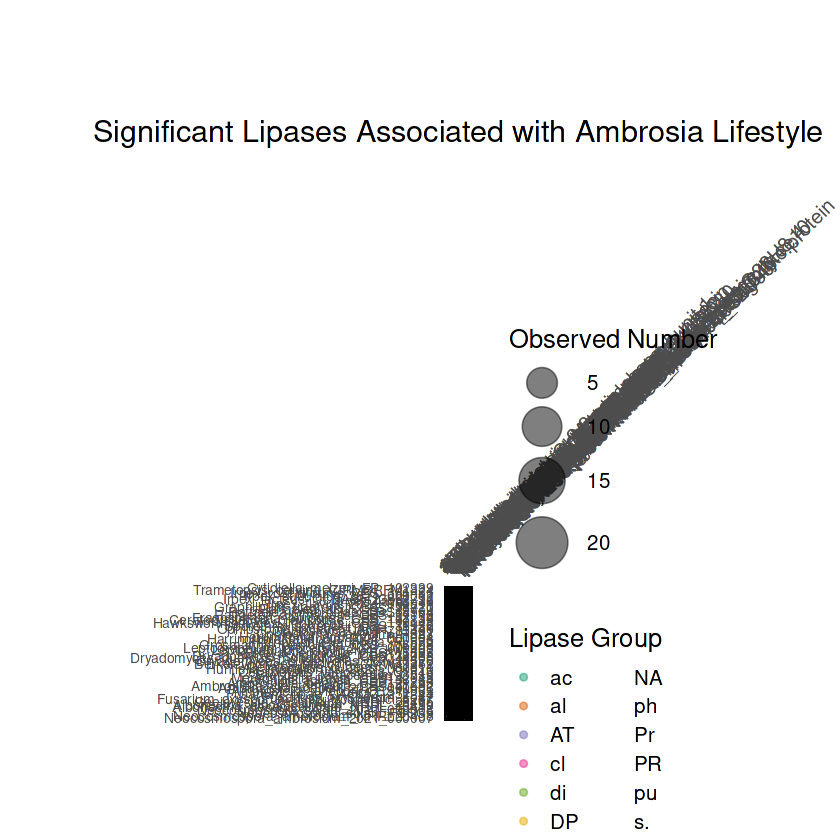

In [166]:
# Load necessary libraries
library(dplyr)
library(tidyr)
library(ggplot2)
library(readr)

# Load the significant results from the previous statistical test
significant_results_path <- "Lipase_PIC_test_summary_results.csv"
significant_results <- read_csv(significant_results_path)

# Extract the significant Lipase groups based on p-value < 0.05
significant_Lipase_groups <- significant_results %>%
  filter(pValue < 0.05) %>%
  pull(Trait)

# Load the data
dat <- read.csv("Lipase_merged_data.csv")

# Load the Ambrosia data to get CladeOrder
ambrosia_file_path <- "AmbrosiaFungiGenomeFeature_sub.csv"
ambrosia_data <- read_csv(ambrosia_file_path)

# Merge the normalized data with CladeOrder
bubble_data <- dat %>%
  inner_join(ambrosia_data %>% select(FungusName_Strain, CladeOrder), by = c("FungusName_Strain" = "FungusName_Strain")) %>%
  select(FungusName_Strain, Ambrosia, CladeOrder, all_of(significant_Lipase_groups))

# Filter out the outgroup "Ambrosia"
bubble_data <- bubble_data %>%
  filter(Ambrosia != "outgroup")

# Arrange the data by CladeOrder in descending order
bubble_data <- bubble_data %>%
  arrange(CladeOrder)

# Convert the data to a long format for ggplot2
bubble_data_long <- bubble_data %>%
  gather(key = "Lipase_Group", value = "Observed_Number", -FungusName_Strain, -Ambrosia, -CladeOrder)

# Filter out rows with Observed_Number equal to 0
bubble_data_long <- bubble_data_long %>%
  filter(Observed_Number != 0)

# Ensure the order of the species for the plot is based on CladeOrder in descending order
bubble_data_long <- bubble_data_long %>%
  mutate(FungusName_Strain = factor(FungusName_Strain, levels = rev(unique(bubble_data$FungusName_Strain))))

# Create a new column for Lipase group based on the first two letters
bubble_data_long <- bubble_data_long %>%
  mutate(Lipase_Group_Short = substr(Lipase_Group, 1, 2))

# Create the bubble plot with white background and no grid lines
p <- ggplot(bubble_data_long, aes(x = Lipase_Group, 
                                  y = FungusName_Strain, 
                                  color = Lipase_Group_Short, 
                                  size = Observed_Number)) +
  geom_point(alpha = 0.5) +
  scale_size_continuous(name = "Observed Number", range = c(3, 15)) +  # Increase bubble size range
  scale_color_brewer(palette = "Dark2", name = "Lipase Group") +  # Using ColorBrewer palette
  geom_text(aes(label = Observed_Number), vjust = 0.5, hjust = 0.5, colour = "black", size = 5) +  # Add text labels
  theme_minimal(base_size = 15) +
  theme(panel.background = element_rect(fill = "white", color = NA),
        plot.background = element_rect(fill = "white", color = NA),
        panel.grid = element_blank(),  # Remove grid lines
        axis.text.x = element_text(angle = 45, hjust = 0),
        axis.text.y = element_text(size = 8),
        plot.title = element_text(hjust = 0.5),
        plot.margin = margin(t = 1, r = 1, b = 1, l = 1, unit = "in"),
        axis.title.x = element_blank(),  # Remove x-axis title from the bottom
        axis.title.x.top = element_text()) +  # Add x-axis title to the top
  labs(title = "Significant Lipases Associated with Ambrosia Lifestyle",
       x = "",
       y = "") +
  scale_x_discrete(position = "top")  # Move x-axis to the top

# Save the plot as a PDF with adjusted size
ggsave("Lipase_bubble_plot_significant_normalized_annotations.pdf", plot = p, width = 15, height = 15, units = "in")

# Print the plot to the screen
print(p)


### PCWDEs

In [110]:
# include outgroup for PIC test

# Load necessary libraries
library(dplyr)
library(tidyr)
library(readr)

# Load the PCWDE data
PCWDE_file_path <- "Orthogroups_meta_db_tool_annot_toolMod_CZAyme_substrate.csv"
PCWDE_data <- read_csv(PCWDE_file_path)

# Load the Ambrosia data
ambrosia_file_path <- "AmbrosiaFungiGenomeFeature_sub.csv"
ambrosia_data <- read_csv(ambrosia_file_path)

# Filter the PCWDE data where 'tool' is 'PCWDE'
PCWDE_filtered <- PCWDE_data %>% filter(tool_substrate == "PCWDE")

# Count the occurrences of each unique 'annotation' for each 'acc'
PCWDE_counts <- PCWDE_filtered %>%
  group_by(acc, annotation) %>%
  summarize(count = n()) %>%
  ungroup()

# Filter out rows where annotation is "-"
PCWDE_counts_filtered <- PCWDE_counts %>%
  filter(annotation != "-")

# Pivot the data to create a matrix suitable for analysis
PCWDE_matrix <- PCWDE_counts_filtered %>%
  spread(key = annotation, value = count, fill = 0)

# Merge with ambrosia data
merged_data <- ambrosia_data %>%
  select(FungusName_Strain, Ambrosia) %>%
  right_join(PCWDE_matrix, by = c("FungusName_Strain" = "acc"))

# Export the log-normalized data to a CSV file
write.csv(merged_data, "PCWDE_merged_data.csv", row.names = FALSE)

Rows: 381603 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): Orthogroup, genes, acc, Family, Genus, Ambrosia, tool, tool_substra...
dbl (5): n_genomes, n_genes, n_genes_genome, Num_Gene, Secret_protein

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 60 Columns: 45
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (18): FungusName, Strain, FungusName_Strain, BeetleAssociate, Beetle_Evo...
dbl (27): Genome_size, TE_CoverageTotal, TE_CoverageTotal_Mbp, Num_Gene, Num...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'acc'. You can override using the `.groups`
argument.


In [111]:
# Log normalize the PCWDE counts for each group
merged_data <- read.csv("PCWDE_merged_data.csv" )
dim(merged_data)

log_normalized_data <- merged_data %>%
  mutate(across(-c(FungusName_Strain, Ambrosia), ~ log1p(.)))

# Drop columns with NaN values
log_normalized_data <- log_normalized_data %>%
  select(where(~ !any(is.nan(.))))
dim(log_normalized_data)
# Export the log-normalized data to a CSV file
write_csv(log_normalized_data, "PCWDE_log_normalized_data.csv")

[1] 64 46

[1] 64 46

In [108]:
# PCWDE PIC test to find the significant

# Load necessary libraries
library(ape)
library(phangorn)
library(dplyr)
library(tidyr)
library(readr)

# Load the phylogenetic tree
tree_file_path <- "concat_nooutgroup_rooted.contree"
tree <- read.tree(tree_file_path)

# Load the traits data
traits_file_path <- "PCWDE_log_normalized_data.csv"
traits_data <- read_csv(traits_file_path)

# Ensure that the species names in traits match the tree
traits_data$species <- factor(traits_data$FungusName_Strain, levels=tree$tip.label)

# Create the Ambrosia predictor
ambrosia_predictor <- ifelse(traits_data$Ambrosia == 'Y', 1, 0)

# Use all columns except the first and second as trait_list
trait_list <- colnames(traits_data)[!colnames(traits_data) %in% c("FungusName_Strain", "Ambrosia")]

# Initialize a list to store PIC results
pic_results <- list()

# Loop through each trait and compute PIC, storing results
for(trait in trait_list) {
  if(all(!is.na(traits_data[[trait]]))) {  # check if there are no missing values for the trait
    pic_results[[trait]] <- pic(traits_data[[trait]], tree)
  }
}

# Function to match node contrasts with predictor values
match_pic_to_predictor <- function(pic_values, tree, predictor) {
  node_values <- pic_values
  internal_nodes <- (length(tree$tip.label) + 1):(length(tree$tip.label) + length(node_values))
  
  predictor_aligned <- numeric(length(node_values))
  
  for (i in 1:length(node_values)) {
    node <- internal_nodes[i]
    descendants <- Descendants(tree, node, type = "tips")[[1]]
    predictor_values <- predictor[descendants]
    predictor_aligned[i] <- mean(predictor_values)
  }
  
  return(predictor_aligned)
}

# Align the predictor values with the PIC results
aligned_predictor <- lapply(pic_results, match_pic_to_predictor, tree = tree, predictor = ambrosia_predictor)

# Convert the PIC results to a data frame for analysis
pic_data <- do.call(cbind, lapply(pic_results, function(x) as.numeric(x)))
pic_data <- as.data.frame(pic_data)
colnames(pic_data) <- trait_list

# Convert the aligned predictor to a data frame
aligned_predictor_df <- as.data.frame(do.call(cbind, aligned_predictor))
colnames(aligned_predictor_df) <- paste0(trait_list, "_predictor")

# Combine the PIC data and aligned predictor data
combined_data <- cbind(pic_data, aligned_predictor_df)

# Fit a linear model for each trait and store the results
lm_results <- list()

for(trait in trait_list) {
  trait_predictor <- paste0(trait, "_predictor")
  lm_results[[trait]] <- summary(lm(combined_data[[trait]] ~ combined_data[[trait_predictor]]))
}

# Summarize the linear model results for each trait
summary_results <- data.frame(
  Trait = character(),
  Predictor = character(),
  Estimate = numeric(),
  StdError = numeric(),
  tValue = numeric(),
  pValue = numeric(),
  stringsAsFactors = FALSE
)

for(trait in trait_list) {
  trait_predictor <- paste0(trait, "_predictor")
  lm_summary <- lm_results[[trait]]
  summary_results <- rbind(summary_results, data.frame(
    Trait = trait,
    Predictor = trait_predictor,
    Estimate = lm_summary$coefficients[2, "Estimate"],
    StdError = lm_summary$coefficients[2, "Std. Error"],
    tValue = lm_summary$coefficients[2, "t value"],
    pValue = lm_summary$coefficients[2, "Pr(>|t|)"]
  ))
}

# Print the summarized results
summary_results

# Save the summary results to a CSV file
write_csv(summary_results, "PCWDE_PIC_test_summary_results.csv")

Rows: 64 Columns: 46
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): FungusName_Strain, Ambrosia
dbl (44): AA14, AA16, AA2, AA9, CBM1, CBM63, CBM67, CE12, CE15, CE5, CE8, GH...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ERROR: Error in pic(traits_data[[trait]], tree): length of phenotypic and of phylogenetic data do not match


Rows: 46 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Trait, Predictor
dbl (4): Estimate, StdError, tValue, pValue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 60 Columns: 45
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (18): FungusName, Strain, FungusName_Strain, BeetleAssociate, Beetle_Evo...
dbl (27): Genome_size, TE_CoverageTotal, TE_CoverageTotal_Mbp, Num_Gene, Num...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


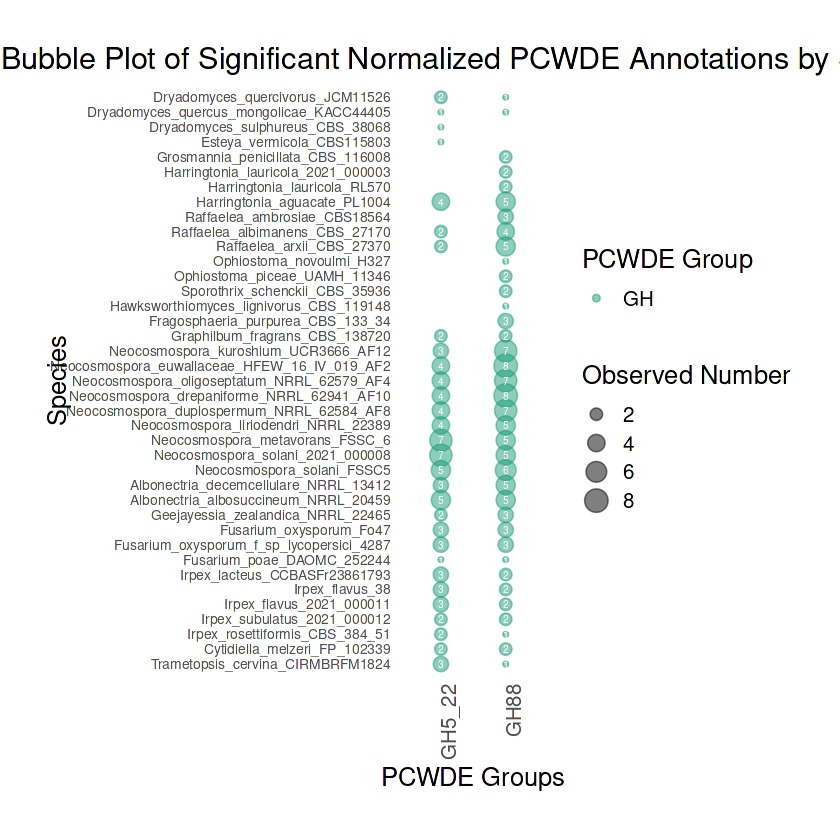

In [109]:
# Load necessary libraries
library(dplyr)
library(tidyr)
library(ggplot2)
library(readr)

# Load the significant results from the previous statistical test
significant_results_path <- "PCWDE_PIC_test_summary_results.csv"
significant_results <- read_csv(significant_results_path)

# Extract the significant PCWDE groups based on p-value < 0.05
significant_PCWDE_groups <- significant_results %>%
  filter(pValue < 0.05) %>%
  pull(Trait)

# Load the data
dat <- read.csv("PCWDE_merged_data.csv")

# Load the Ambrosia data to get CladeOrder
ambrosia_file_path <- "AmbrosiaFungiGenomeFeature_sub.csv"
ambrosia_data <- read_csv(ambrosia_file_path)

# Merge the normalized data with CladeOrder
bubble_data <- dat %>%
  inner_join(ambrosia_data %>% select(FungusName_Strain, CladeOrder), by = c("FungusName_Strain" = "FungusName_Strain")) %>%
  select(FungusName_Strain, Ambrosia, CladeOrder, all_of(significant_PCWDE_groups))

# Filter out the outgroup "Ambrosia"
bubble_data <- bubble_data %>%
  filter(Ambrosia != "outgroup")

# Arrange the data by CladeOrder in descending order
bubble_data <- bubble_data %>%
  arrange(CladeOrder)

# Convert the data to a long format for ggplot2
bubble_data_long <- bubble_data %>%
  gather(key = "PCWDE_Group", value = "Observed_Number", -FungusName_Strain, -Ambrosia, -CladeOrder)

# Filter out rows with Observed_Number equal to 0
bubble_data_long <- bubble_data_long %>%
  filter(Observed_Number != 0)

# Ensure the order of the species for the plot is based on CladeOrder in descending order
bubble_data_long <- bubble_data_long %>%
  mutate(FungusName_Strain = factor(FungusName_Strain, levels = rev(unique(bubble_data$FungusName_Strain))))

# Create a new column for PCWDE group based on the first two letters
bubble_data_long <- bubble_data_long %>%
  mutate(PCWDE_Group_Short = substr(PCWDE_Group, 1, 2))

# Create the bubble plot with white background and no grid lines
p <- ggplot(bubble_data_long, aes(x = PCWDE_Group, 
                                  y = FungusName_Strain, 
                                  color = PCWDE_Group_Short, 
                                  size = Observed_Number)) +
  geom_point(alpha = 0.5) +
  scale_size_continuous(name = "Observed Number") +
  scale_color_brewer(palette = "Dark2", name = "PCWDE Group") +  # Using ColorBrewer palette
  geom_text(aes(label = Observed_Number), vjust = 0.5, hjust = 0.5, colour = "white", size = 2) +  # Add text labels
  theme_minimal(base_size = 15) +
  theme(panel.background = element_rect(fill = "white", color = NA),
        plot.background = element_rect(fill = "white", color = NA),
        panel.grid = element_blank(),  # Remove grid lines
        axis.text.x = element_text(angle = 90, hjust = 1),
        axis.text.y = element_text(size = 8),
        plot.title = element_text(hjust = 0.5),
        plot.margin = margin(t = 1, r = 1, b = 1, l = 1, unit = "cm")) +
  labs(title = "Bubble Plot of Significant Normalized PCWDE Annotations by Species",
       x = "PCWDE Groups",
       y = "Species")

# Save the plot as a PDF with adjusted size
ggsave("PCWDE_bubble_plot_significant_normalized_annotations.pdf", plot = p, width = 7, height = 10, units = "in")

# Print the plot to the screen
print(p)

In [34]:
# # Load required packages
# library(dplyr)
# library(readr)

# # Load the Orthogroups_meta_db_tool_annot_toolMod.csv data
# data <- read_csv('Orthogroups_meta_db_tool_annot_toolMod_CZAyme_substrate.csv')

# # Filter the data for rows where the tool is 'CAZyme'
# cazyme_data <- data %>% filter(tool_substrate == 'PCWDE')

# # Count the number of occurrences for each "cazymes_cat" CAZyme in each species
# cazyme_counts <- cazyme_data %>% 
#   group_by(acc, annotation) %>%
#   summarise(count = n()) %>%
#   ungroup()

# # Remove rows where annotation is "-"
# cazyme_counts_filtered <- cazyme_counts %>% filter(annotation != '-')

# # Load the PCWDEs_list.csv data
# pcwdes_data <- read_csv('PCWDEs_list.csv')

# # Extract rows from cazyme_counts_filtered where annotation matches cazymes_cat in pcwdes_data
# matched_data <- cazyme_counts_filtered %>% 
#   filter(annotation %in% pcwdes_data$cazymes_cat)

# # Merge the matched data with pcwdes_data to include function information
# merged_data <- matched_data %>%
#   inner_join(pcwdes_data, by = c("annotation" = "cazymes_cat"))

# # Remove duplicate rows
# cleaned_data <- merged_data %>% distinct()

# # Load the AmbrosiaFungiGenomeFeature.csv data
# ambrosia_features <- read_csv('AmbrosiaFungiGenomeFeature_sub.csv')

# # Extract relevant columns and rename for consistency
# relevant_features <- ambrosia_features %>%
#   select(FungusName_Strain, Ambrosia, CladeOrder) %>%
#   rename(acc = FungusName_Strain, CladeOrder = CladeOrder)

# # Merge the cleaned_data with relevant_features based on 'acc'
# final_merged_data <- cleaned_data %>%
#   inner_join(relevant_features, by = "acc")

# # Filter to ensure only rows where 'acc' matches 'FungusName_Strain' in ambrosia_features
# filtered_final_merged_data <- final_merged_data %>%
#   filter(acc %in% ambrosia_features$FungusName_Strain)

# # Display the final result
# head(filtered_final_merged_data)
# dim(filtered_final_merged_data)

# # Save the final merged data to a CSV file if needed
# #write_csv(filtered_final_merged_data, 'filtered_final_merged_data.csv')


Rows: 347625 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): Orthogroup, genes, acc, Family, Genus, Ambrosia, tool, tool_substra...
dbl (5): n_genomes, n_genes, n_genes_genome, Num_Gene, Secret_protein

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'acc'. You can override using the `.groups`
argument.
Rows: 86 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): cazymes_cat, substrate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in inner_join(., pcwdes_data, by = c(annotation = "cazymes_cat")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 15 of `x` matches mul

acc                                  annotation count substrate     Ambrosia
1 Albonectria_albosuccineum_NRRL_20459 AA2         8    lignin        N       
2 Albonectria_albosuccineum_NRRL_20459 AA9        10    cellulose     N       
3 Albonectria_albosuccineum_NRRL_20459 CE8         5    pectin        N       
4 Albonectria_albosuccineum_NRRL_20459 GH10        3    hemicellulose N       
5 Albonectria_albosuccineum_NRRL_20459 GH105       9    pectin        N       
6 Albonectria_albosuccineum_NRRL_20459 GH11        3    hemicellulose N       
  CladeOrder
1 56        
2 56        
3 56        
4 56        
5 56        
6 56

[1] 662   6

In [ ]:
# # Load necessary libraries
# library(dplyr)
# library(tidyr)
# library(ggplot2)
# library(readr)

# # Assuming final_merged_data is already in the environment or load it from the file
# # final_merged_data <- read_csv('final_merged_data.csv')

# # Convert the data to a long format for ggplot2
# bubble_data_long <- final_merged_data %>%
#   select(acc, annotation, substrate, count, CladeOrder) %>%
#   rename(Species = acc, CAZyme_Group = annotation, Observed_Number = count, substrate = substrate, CladeOrder = CladeOrder) %>%
#   mutate(substrate = factor(substrate)) %>%
#   group_by(Species, substrate, CAZyme_Group, CladeOrder) %>%
#   summarise(Observed_Number = sum(Observed_Number)) %>%
#   ungroup()

# # Ensure the order of the species for the plot based on CladeOrder
# bubble_data_long <- bubble_data_long %>%
#   mutate(Species = factor(Species, levels = rev(unique(Species[order(CladeOrder)]))))

# # Create a combined substrate and CAZyme_Group column for side-by-side placement
# bubble_data_long <- bubble_data_long %>%
#   mutate(Combined_Group = paste(substrate, CAZyme_Group, sep = "_"))

# # Create the bubble plot with white background and no grid lines
# p <- ggplot(bubble_data_long, aes(x = Combined_Group, 
#                                   y = Species, 
#                                   color = substrate, 
#                                   size = Observed_Number)) +
#   geom_point(alpha = 0.5) +
#   scale_size_continuous(name = "Observed Number") +
#   scale_color_brewer(palette = "Dark2", name = "CAZyme substrate") +  # Using ColorBrewer palette
#   geom_text(aes(label = Observed_Number), vjust = 0.5, hjust = 0.5, colour = "white", size = 2) +  # Add text labels
#   theme_minimal(base_size = 15) +
#   theme(panel.background = element_rect(fill = "white", color = NA),
#         plot.background = element_rect(fill = "white", color = NA),
#         panel.grid = element_blank(),  # Remove grid lines
#         axis.text.x = element_text(angle = 90, hjust = 1),
#         axis.text.y = element_text(size = 8),
#         plot.title = element_text(hjust = 0.5),
#         plot.margin = margin(t = 1, r = 1, b = 1, l = 1, unit = "cm")) +
#   labs(title = "Bubble Plot of PCWDEs Annotations by Species",
#        x = "CAZyme substrate and Group",
#        y = "Species")

# # Save the plot as a PDF with adjusted size
# ggsave("CAZyme_bubble_plot_PCWDEs_annotations.pdf", plot = p, width = 10, height = 10, units = "in")

# # Print the plot to the screen
# print(p)

In [ ]:
# # Load necessary libraries
# library(dplyr)

# # Read the CSV files
# data_list <- read.csv("PCWDEs_list.csv")
# pic_results <- read.csv("CAZyme_PIC_test_summary_results.csv")

# # Filter the PIC results based on the 'Trait' column matching the 'category' column in the PCWDEs list
# filtered_pic_results <- pic_results %>%
#   filter(Trait %in% data_list$cazymes_cat)

# # View the first few rows of the filtered data
# dim(filtered_pic_results)

# write.csv(filtered_pic_results, "CAZyme_PIC_test_summary_results_PCWDEs.csv")


### MCWDEs

In [59]:
# include outgroup for PIC test

# Load necessary libraries
library(dplyr)
library(tidyr)
library(readr)

# Load the FCWDE data
FCWDE_file_path <- "Orthogroups_meta_db_tool_annot_toolMod_CZAyme_substrate.csv"
FCWDE_data <- read_csv(FCWDE_file_path)

# Load the Ambrosia data
ambrosia_file_path <- "AmbrosiaFungiGenomeFeature_sub.csv"
ambrosia_data <- read_csv(ambrosia_file_path)

# Filter the FCWDE data where 'tool' is 'FCWDE'
FCWDE_filtered <- FCWDE_data %>% filter(tool_substrate == "FCWDE")

# Count the occurrences of each unique 'annotation' for each 'acc'
FCWDE_counts <- FCWDE_filtered %>%
  group_by(acc, annotation) %>%
  summarize(count = n()) %>%
  ungroup()

# Filter out rows where annotation is "-"
FCWDE_counts_filtered <- FCWDE_counts %>%
  filter(annotation != "-")

# Pivot the data to create a matrix suitable for analysis
FCWDE_matrix <- FCWDE_counts_filtered %>%
  spread(key = annotation, value = count, fill = 0)

# Merge with ambrosia data
merged_data <- ambrosia_data %>%
  select(FungusName_Strain, Ambrosia) %>%
  right_join(FCWDE_matrix, by = c("FungusName_Strain" = "acc"))

# Export the log-normalized data to a CSV file
write.csv(merged_data, "FCWDE_merged_data.csv", row.names = FALSE)

Rows: 347625 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): Orthogroup, genes, acc, Family, Genus, Ambrosia, tool, tool_substra...
dbl (5): n_genomes, n_genes, n_genes_genome, Num_Gene, Secret_protein

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 51 Columns: 41
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): FungusName, Strain, FungusName_Strain, BeetleAssociate, Beetle_Evo...
dbl (27): Genome_size, TE_CoverageTotal, TE_CoverageTotal_Mbp, Num_Gene, Num...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'acc'. You can override using the `.groups`
argument.


In [60]:
# Log normalize the FCWDE counts for each group
merged_data <- read.csv("FCWDE_merged_data.csv" )
dim(merged_data)

log_normalized_data <- merged_data %>%
  mutate(across(-c(FungusName_Strain, Ambrosia), ~ log1p(.)))

# Drop columns with NaN values
log_normalized_data <- log_normalized_data %>%
  select(where(~ !any(is.nan(.))))
dim(log_normalized_data)
# Export the log-normalized data to a CSV file
write_csv(log_normalized_data, "FCWDE_log_normalized_data.csv")

[1] 51 28

[1] 51 28

In [61]:
# FCWDE PIC test to find the significant

# Load necessary libraries
library(ape)
library(phangorn)
library(dplyr)
library(tidyr)
library(readr)

# Load the phylogenetic tree
tree_file_path <- "concat_nooutgroup_rooted.contree"
tree <- read.tree(tree_file_path)

# Load the traits data
traits_file_path <- "FCWDE_log_normalized_data.csv"
traits_data <- read_csv(traits_file_path)

# Ensure that the species names in traits match the tree
traits_data$species <- factor(traits_data$FungusName_Strain, levels=tree$tip.label)

# Create the Ambrosia predictor
ambrosia_predictor <- ifelse(traits_data$Ambrosia == 'Y', 1, 0)

# Use all columns except the first and second as trait_list
trait_list <- colnames(traits_data)[!colnames(traits_data) %in% c("FungusName_Strain", "Ambrosia")]

# Initialize a list to store PIC results
pic_results <- list()

# Loop through each trait and compute PIC, storing results
for(trait in trait_list) {
  if(all(!is.na(traits_data[[trait]]))) {  # check if there are no missing values for the trait
    pic_results[[trait]] <- pic(traits_data[[trait]], tree)
  }
}

# Function to match node contrasts with predictor values
match_pic_to_predictor <- function(pic_values, tree, predictor) {
  node_values <- pic_values
  internal_nodes <- (length(tree$tip.label) + 1):(length(tree$tip.label) + length(node_values))
  
  predictor_aligned <- numeric(length(node_values))
  
  for (i in 1:length(node_values)) {
    node <- internal_nodes[i]
    descendants <- Descendants(tree, node, type = "tips")[[1]]
    predictor_values <- predictor[descendants]
    predictor_aligned[i] <- mean(predictor_values)
  }
  
  return(predictor_aligned)
}

# Align the predictor values with the PIC results
aligned_predictor <- lapply(pic_results, match_pic_to_predictor, tree = tree, predictor = ambrosia_predictor)

# Convert the PIC results to a data frame for analysis
pic_data <- do.call(cbind, lapply(pic_results, function(x) as.numeric(x)))
pic_data <- as.data.frame(pic_data)
colnames(pic_data) <- trait_list

# Convert the aligned predictor to a data frame
aligned_predictor_df <- as.data.frame(do.call(cbind, aligned_predictor))
colnames(aligned_predictor_df) <- paste0(trait_list, "_predictor")

# Combine the PIC data and aligned predictor data
combined_data <- cbind(pic_data, aligned_predictor_df)

# Fit a linear model for each trait and store the results
lm_results <- list()

for(trait in trait_list) {
  trait_predictor <- paste0(trait, "_predictor")
  lm_results[[trait]] <- summary(lm(combined_data[[trait]] ~ combined_data[[trait_predictor]]))
}

# Summarize the linear model results for each trait
summary_results <- data.frame(
  Trait = character(),
  Predictor = character(),
  Estimate = numeric(),
  StdError = numeric(),
  tValue = numeric(),
  pValue = numeric(),
  stringsAsFactors = FALSE
)

for(trait in trait_list) {
  trait_predictor <- paste0(trait, "_predictor")
  lm_summary <- lm_results[[trait]]
  summary_results <- rbind(summary_results, data.frame(
    Trait = trait,
    Predictor = trait_predictor,
    Estimate = lm_summary$coefficients[2, "Estimate"],
    StdError = lm_summary$coefficients[2, "Std. Error"],
    tValue = lm_summary$coefficients[2, "t value"],
    pValue = lm_summary$coefficients[2, "Pr(>|t|)"]
  ))
}

# Print the summarized results
summary_results

# Save the summary results to a CSV file
write_csv(summary_results, "FCWDE_PIC_test_summary_results.csv")

Rows: 51 Columns: 28
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): FungusName_Strain, Ambrosia
dbl (26): CBM18, GH125, GH128, GH132, GH135, GH16, GH17, GH18, GH20, GH23, G...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Trait   Predictor         Estimate    StdError   tValue     pValue     
1  CBM18   CBM18_predictor   -0.42980682  0.2362114 -1.8195856 0.075061829
2  GH125   GH125_predictor    0.54005909  0.2749622  1.9641215 0.055320996
3  GH128   GH128_predictor   -0.26065229  0.5842978 -0.4460949 0.657534590
4  GH132   GH132_predictor   -0.45164028  0.4137103 -1.0916825 0.280422114
5  GH135   GH135_predictor   -0.65594278  0.5720339 -1.1466852 0.257195789
6  GH16    GH16_predictor     0.11624543  0.1165364  0.9975031 0.323522570
7  GH17    GH17_predictor    -0.09771054  0.4755189 -0.2054819 0.838064585
8  GH18    GH18_predictor    -1.40246554  0.4625014 -3.0323490 0.003906082
9  GH20    GH20_predictor     0.48620704  0.4154073  1.1704344 0.247604561
10 GH23    GH23_predictor    -0.46217875  0.2795541 -1.6532712 0.104802318
11 GH24    GH24_predictor    -0.53287791  0.5184153 -1.0278978 0.309150023
12 GH25    GH25_predictor     0.20235107  0.3358378  0.6025262 0.549660004
13 GH30_3  GH30_3_predictor   0.42793309  0.3421284  1.2507966 0.217071428
14 GH30_5  GH30_5_predictor   0.38034026  0.2335070  1.6288172 0.109898282
15 GH46    GH46_predictor     0.46401459  0.3877558  1.1966670 0.237313608
16 GH5_15  GH5_15_predictor  -0.56240960  0.6554692 -0.8580260 0.395142365
17 GH5_31  GH5_31_predictor   0.12054355  0.2630328  0.4582833 0.648817064
18 GH5_9   GH5_9_predictor    0.45461614  0.3802951  1.1954298 0.237791864
19 GH55    GH55_predictor     0.18916536  0.2298925  0.8228425 0.414666851
20 GH64    GH64_predictor    -0.49095978  0.6141304 -0.7994390 0.427974389
21 GH71    GH71_predictor    -0.34833322  0.6933708 -0.5023765 0.617699750
22 GH72    GH72_predictor    -0.31614400  0.3751888 -0.8426264 0.403616614
23 GH75    GH75_predictor    -0.63438592  0.5011796 -1.2657855 0.211699324
24 GH76    GH76_predictor    -0.94136443  0.8005576 -1.1758860 0.245439812
25 GH81    GH81_predictor    -0.18783121  0.3541885 -0.5303142 0.598339031
26 GH92    GH92_predictor     0.13281344  0.5759319  0.2306061 0.818600872
27 species species_predictor -7.83314651 11.7356465 -0.6674661 0.507670896

Rows: 27 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Trait, Predictor
dbl (4): Estimate, StdError, tValue, pValue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 51 Columns: 41
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): FungusName, Strain, FungusName_Strain, BeetleAssociate, Beetle_Evo...
dbl (27): Genome_size, TE_CoverageTotal, TE_CoverageTotal_Mbp, Num_Gene, Num...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


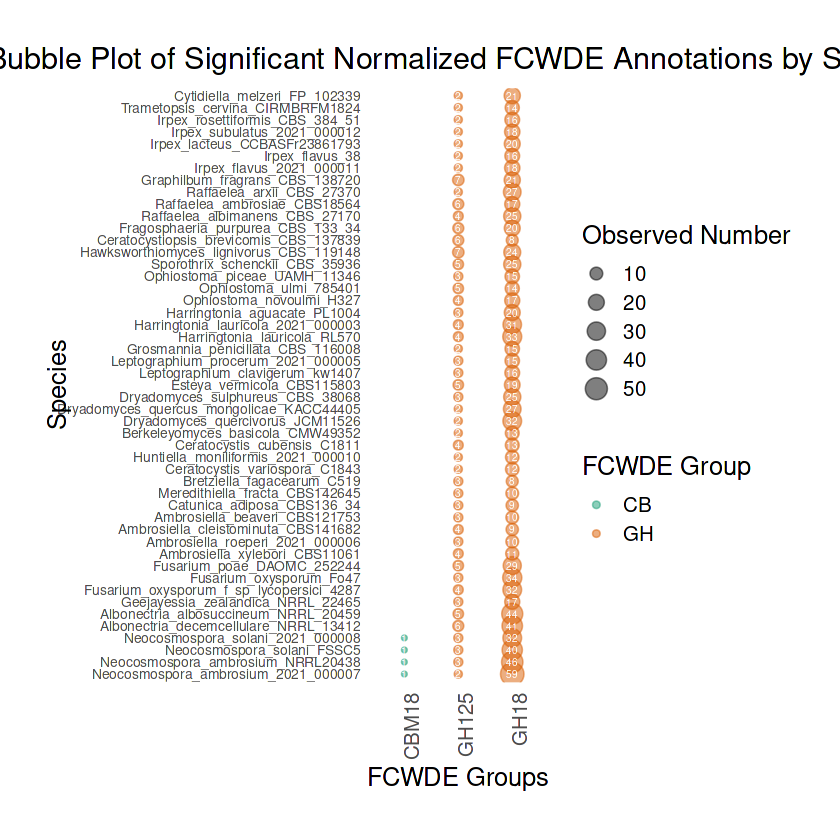

In [63]:
# Load necessary libraries
library(dplyr)
library(tidyr)
library(ggplot2)
library(readr)

# Load the significant results from the previous statistical test
significant_results_path <- "FCWDE_PIC_test_summary_results.csv"
significant_results <- read_csv(significant_results_path)

# Extract the significant FCWDE groups based on p-value < 0.05
significant_FCWDE_groups <- significant_results %>%
  filter(pValue < 0.08) %>%
  pull(Trait)

# Load the data
dat <- read.csv("FCWDE_merged_data.csv")

# Load the Ambrosia data to get CladeOrder
ambrosia_file_path <- "AmbrosiaFungiGenomeFeature_sub.csv"
ambrosia_data <- read_csv(ambrosia_file_path)

# Merge the normalized data with CladeOrder
bubble_data <- dat %>%
  inner_join(ambrosia_data %>% select(FungusName_Strain, CladeOrder), by = c("FungusName_Strain" = "FungusName_Strain")) %>%
  select(FungusName_Strain, Ambrosia, CladeOrder, all_of(significant_FCWDE_groups))

# Filter out the outgroup "Ambrosia"
bubble_data <- bubble_data %>%
  filter(Ambrosia != "outgroup")

# Arrange the data by CladeOrder in descending order
bubble_data <- bubble_data %>%
  arrange(CladeOrder)

# Convert the data to a long format for ggplot2
bubble_data_long <- bubble_data %>%
  gather(key = "FCWDE_Group", value = "Observed_Number", -FungusName_Strain, -Ambrosia, -CladeOrder)

# Filter out rows with Observed_Number equal to 0
bubble_data_long <- bubble_data_long %>%
  filter(Observed_Number != 0)

# Ensure the order of the species for the plot is based on CladeOrder in descending order
bubble_data_long <- bubble_data_long %>%
  mutate(FungusName_Strain = factor(FungusName_Strain, levels = rev(unique(bubble_data$FungusName_Strain))))

# Create a new column for FCWDE group based on the first two letters
bubble_data_long <- bubble_data_long %>%
  mutate(FCWDE_Group_Short = substr(FCWDE_Group, 1, 2))

# Create the bubble plot with white background and no grid lines
p <- ggplot(bubble_data_long, aes(x = FCWDE_Group, 
                                  y = FungusName_Strain, 
                                  color = FCWDE_Group_Short, 
                                  size = Observed_Number)) +
  geom_point(alpha = 0.5) +
  scale_size_continuous(name = "Observed Number") +
  scale_color_brewer(palette = "Dark2", name = "FCWDE Group") +  # Using ColorBrewer palette
  geom_text(aes(label = Observed_Number), vjust = 0.5, hjust = 0.5, colour = "white", size = 2) +  # Add text labels
  theme_minimal(base_size = 15) +
  theme(panel.background = element_rect(fill = "white", color = NA),
        plot.background = element_rect(fill = "white", color = NA),
        panel.grid = element_blank(),  # Remove grid lines
        axis.text.x = element_text(angle = 90, hjust = 1),
        axis.text.y = element_text(size = 8),
        plot.title = element_text(hjust = 0.5),
        plot.margin = margin(t = 1, r = 1, b = 1, l = 1, unit = "cm")) +
  labs(title = "Bubble Plot of Significant Normalized FCWDE Annotations by Species",
       x = "FCWDE Groups",
       y = "Species")

# Save the plot as a PDF with adjusted size
ggsave("FCWDE_bubble_plot_significant_normalized_annotations.pdf", plot = p, width = 7, height = 10, units = "in")

# Print the plot to the screen
print(p)

In [ ]:
# # Load required packages
# library(dplyr)
# library(readr)

# # Load the Orthogroups_meta_db_tool_annot_toolMod.csv data
# data <- read_csv('Orthogroups_meta_db_tool_annot_toolMod_CZAyme_substrate.csv')

# # Filter the data for rows where the tool is 'CAZyme'
# cazyme_data <- data %>% filter(tool_substrate == 'FCWDE')

# # Count the number of occurrences for each "cazymes_cat" CAZyme in each species
# cazyme_counts <- cazyme_data %>% 
#   group_by(acc, annotation) %>%
#   summarise(count = n()) %>%
#   ungroup()

# # Remove rows where annotation is "-"
# cazyme_counts_filtered <- cazyme_counts %>% filter(annotation != '-')

# # Load the PCWDEs_list.csv data
# fcwde_data <- read_csv('MCWDEs_list.csv')

# # Extract rows from cazyme_counts_filtered where annotation matches cazymes_cat in fcwde_data
# matched_data <- cazyme_counts_filtered %>% 
#   filter(annotation %in% fcwde_data$cazymes_cat)

# # Merge the matched data with fcwde_data to include function information
# merged_data <- matched_data %>%
#   inner_join(fcwde_data, by = c("annotation" = "cazymes_cat"))

# # Remove duplicate rows
# cleaned_data <- merged_data %>% distinct()

# # Load the AmbrosiaFungiGenomeFeature.csv data
# ambrosia_features <- read_csv('AmbrosiaFungiGenomeFeature_sub.csv')

# # Extract relevant columns and rename for consistency
# relevant_features <- ambrosia_features %>%
#   select(FungusName_Strain, Ambrosia, CladeOrder) %>%
#   rename(acc = FungusName_Strain, CladeOrder = CladeOrder)

# # Merge the cleaned_data with relevant_features based on 'acc'
# final_merged_data <- cleaned_data %>%
#   left_join(relevant_features, by = "acc")

# # Display the final result
# head(final_merged_data)
# dim(final_merged_data)

# # Save the final merged data to a CSV file if needed
# #write_csv(final_merged_data, 'final_merged_data.csv')

In [ ]:
# # Load necessary libraries
# library(dplyr)
# library(tidyr)
# library(ggplot2)
# library(readr)

# # Assuming final_merged_data is already in the environment or load it from the file
# # final_merged_data <- read_csv('final_merged_data.csv')

# final_merged_data <- final_merged_data %>% filter(substrate != 'FCWDE')

# # Convert the data to a long format for ggplot2
# bubble_data_long <- final_merged_data %>%

#   select(acc, annotation, substrate, count, CladeOrder) %>%
#   rename(Species = acc, CAZyme_Group = annotation, Observed_Number = count, substrate = substrate, CladeOrder = CladeOrder) %>%
#   mutate(substrate = factor(substrate)) %>%
#   group_by(Species, substrate, CAZyme_Group, CladeOrder) %>%
#   summarise(Observed_Number = sum(Observed_Number)) %>%
#   ungroup()

# # Ensure the order of the species for the plot based on CladeOrder
# bubble_data_long <- bubble_data_long %>%
#   mutate(Species = factor(Species, levels = rev(unique(Species[order(CladeOrder)]))))

# # Create a combined substrate and CAZyme_Group column for side-by-side placement
# bubble_data_long <- bubble_data_long %>%
#   mutate(Combined_Group = paste(substrate, CAZyme_Group, sep = "_"))

# # Create the bubble plot with white background and no grid lines
# p <- ggplot(bubble_data_long, aes(x = Combined_Group, 
#                                   y = Species, 
#                                   color = substrate, 
#                                   size = Observed_Number)) +
#   geom_point(alpha = 0.5) +
#   scale_size_continuous(name = "Observed Number") +
#   scale_color_brewer(palette = "Dark2", name = "CAZyme substrate") +  # Using ColorBrewer palette
#   geom_text(aes(label = Observed_Number), vjust = 0.5, hjust = 0.5, colour = "white", size = 2) +  # Add text labels
#   theme_minimal(base_size = 15) +
#   theme(panel.background = element_rect(fill = "white", color = NA),
#         plot.background = element_rect(fill = "white", color = NA),
#         panel.grid = element_blank(),  # Remove grid lines
#         axis.text.x = element_text(angle = 90, hjust = 1),
#         axis.text.y = element_text(size = 8),
#         plot.title = element_text(hjust = 0.5),
#         plot.margin = margin(t = 1, r = 1, b = 1, l = 1, unit = "cm")) +
#   labs(title = "Bubble Plot of FCWDEs Annotations by Species",
#        x = "CAZyme substrate and Group",
#        y = "Species")

# # Save the plot as a PDF with adjusted size
# ggsave("CAZyme_bubble_plot_FCWDEs_annotations.pdf", plot = p, width = 10, height = 10, units = "in")

# # Print the plot to the screen
# print(p)


In [88]:
# Load necessary libraries
library(dplyr)

# Read the CSV files
dat_list <- read.csv("MCWDEs_list.csv")
pic_results <- read.csv("CAZyme_PIC_test_summary_results.csv")

# Filter the PIC results based on the 'Trait' column matching the 'category' column in the PCWDEs list
filtered_pic_results <- pic_results %>%
  filter(Trait %in% dat_list$cazymes_cat)

# View the first few rows of the filtered data
head(filtered_pic_results)

write.csv(filtered_pic_results, "CAZyme_PIC_test_summary_results_MCWDEs.csv")


Trait Predictor       Estimate    StdError  tValue      pValue   
1 CBM18 CBM18_predictor  0.29303557 0.2831837  1.03478963 0.3050625
2 CBM67 CBM67_predictor -0.23088110 0.4365617 -0.52886246 0.5989190
3 CE12  CE12_predictor   0.05801966 0.2601178  0.22305146 0.8242792
4 CE8   CE8_predictor   -0.61878893 0.4528851 -1.36632653 0.1771105
5 GH105 GH105_predictor -0.01251840 0.3460848 -0.03617148 0.9712698
6 GH106 GH106_predictor  0.11208750 0.5883317  0.19051751 0.8495689

# GPCRs

In [27]:
library(dplyr)

# Function to process each file with a specified output directory
process_blast_file <- function(file_path, output_dir) {
  # Load the BLASTP result file
  blast_results <- read.table(file_path, sep="\t", header=FALSE)
  
  # Set column names based on typical BLAST output (outfmt 6)
  colnames(blast_results) <- c('query_id', 'subject_id', 'identity', 'alignment_length', 'mismatches', 
                               'gap_opens', 'q_start', 'q_end', 's_start', 's_end', 'evalue', 'bit_score')
  
  # Group by the query_id (gene) and select the row with the lowest e-value for each group
  min_evalue_per_gene <- blast_results %>%
    group_by(query_id) %>%
    slice(which.min(evalue))
  
  # Extract sample name from file and remove .aa and _blast_results
  sample_name <- tools::file_path_sans_ext(basename(file_path))
  sample_name <- sub("_blast_results", "", sample_name)  # Remove '_blast_results' part
  sample_name <- sub("\\.aa$", "", sample_name)  # Remove '.aa' at the end of the name
  
  # Create an output file name with the desired format
  output_file <- file.path(output_dir, paste0("GPCRs_", sample_name, ".tsv"))
  
  # Write to the output file in TSV format
  write.table(min_evalue_per_gene, output_file, sep="\t", row.names=FALSE, col.names=TRUE, quote=FALSE)
  
  return(output_file)
}

# Directory where your BLASTP result files are located
input_dir <- "GPCRdb/blastp"

# Directory where you want to save the output files
output_dir <- "GPCRdb/blastp_minevalue"

# Get a list of all the BLASTP result files
file_list <- list.files(input_dir, full.names = TRUE, pattern = "\\.txt$")

# Ensure the output directory exists
if (!dir.exists(output_dir)) {
  dir.create(output_dir)
}

# Process each file and save to the output directory
output_files <- lapply(file_list, function(file) process_blast_file(file, output_dir))

# Print the output files generated
print(output_files)


[[1]]
[1] "GPCRdb/blastp_minevalue/GPCRs_Albonectria_albosuccineum_NRRL_20459.tsv"

[[2]]
[1] "GPCRdb/blastp_minevalue/GPCRs_Albonectria_decemcellulare_NRRL_13412.tsv"

[[3]]
[1] "GPCRdb/blastp_minevalue/GPCRs_Ambrosiella_beaveri_CBS121753.tsv"

[[4]]
[1] "GPCRdb/blastp_minevalue/GPCRs_Ambrosiella_cleistominuta_CBS141682.tsv"

[[5]]
[1] "GPCRdb/blastp_minevalue/GPCRs_Ambrosiella_roeperi_2021_000006.tsv"

[[6]]
[1] "GPCRdb/blastp_minevalue/GPCRs_Ambrosiella_xylebori_CBS11061.tsv"

[[7]]
[1] "GPCRdb/blastp_minevalue/GPCRs_Aspergillus_fumigatus_Af293.tsv"

[[8]]
[1] "GPCRdb/blastp_minevalue/GPCRs_Berkeleyomyces_basicola_CMW49352.tsv"

[[9]]
[1] "GPCRdb/blastp_minevalue/GPCRs_Bretziella_fagacearum_C519.tsv"

[[10]]
[1] "GPCRdb/blastp_minevalue/GPCRs_Catunica_adiposa_CBS136_34.tsv"

[[11]]
[1] "GPCRdb/blastp_minevalue/GPCRs_Ceratocystiopsis_brevicomis_CBS_137839.tsv"

[[12]]
[1] "GPCRdb/blastp_minevalue/GPCRs_Ceratocystis_cubensis_C1811.tsv"

[[13]]
[1] "GPCRdb/blastp_minevalue/GPCRs_Cerato

In [30]:
# Load necessary libraries
library(httr)

# Define the output columns for UniProt query
columns <- c("accession", "id", "gene_names", "organism_name", "organism_id",
             "protein_name", "cc_function", "cc_pathway", "go")

# Base UniProt URL for querying in TSV format
base_url <- "https://rest.uniprot.org/uniprotkb/search?"

# Input and output folder paths
input_folder <- "GPCRdb/blastp_minevalue"  # Update with actual input folder path if needed
output_folder <- "GPCRdb/uniprot"  # Ensure this folder is correct

# Ensure the output folder exists
if (!dir.exists(output_folder)) {
  dir.create(output_folder)
}

# Function to extract the second component from subject_id (to query UniProt)
extract_protein_id <- function(subject_id) {
  match <- regmatches(subject_id, regexpr("sp\\|(\\w+)\\|", subject_id))
  return(sub("sp\\|(\\w+)\\|.*", "\\1", match))
}

# Function to query UniProt API for a specific protein ID with retry mechanism
query_uniprot <- function(protein_id, retries = 3) {
  query <- paste0("query=accession:", protein_id, "&format=tsv&fields=", paste(columns, collapse = ","))
  url <- paste0(base_url, query)
  
  for (attempt in 1:retries) {
    res <- GET(url)
    if (status_code(res) == 200) {
      return(content(res, "text", encoding = "UTF-8"))
    } else {
      message(paste("Failed to retrieve data for", protein_id, ": Status Code", status_code(res)))
      Sys.sleep(2)  # Wait 2 seconds before retrying
    }
  }
  return(NULL)
}

# List all files in the input folder with pattern that matches your file names
files <- list.files(input_folder, pattern = "^GPCRs_.*\\.tsv$", full.names = TRUE)  # Matches files starting with 'GPCRs_' and ending with '.tsv'
total_files <- length(files)

# Loop through each file in the input folder
for (file_index in seq_along(files)) {
  input_file <- files[file_index]
  filename <- basename(input_file)
  output_file <- file.path(output_folder, paste0(filename))
  
  message(paste("Processing file", file_index, "of", total_files, ":", filename))
  
  output_data <- c()  # Initialize an empty vector to store data
  first_query <- TRUE  # Flag to check if it's the first query to write headers
  
  # Read the input file and process each line
  lines <- readLines(input_file)[-1]  # Skip header
  total_lines <- length(lines)
  
  for (line_index in seq_along(lines)) {
    line <- lines[line_index]
    parts <- unlist(strsplit(line, "\t"))  # Assuming tab-separated input
    
    query_id <- parts[1]  # Extract the query_id from the first column
    subject_id <- parts[2]
    protein_id <- extract_protein_id(subject_id)
    
    if (!is.na(protein_id)) {
      message(paste("  Processing line", line_index, "of", total_lines, "-", protein_id))
      protein_info <- query_uniprot(protein_id)
      
      if (!is.null(protein_info)) {
        protein_data <- unlist(strsplit(protein_info, "\n"))
        
        if (first_query) {
          # Add the first query's data (including header)
          output_data <- c(output_data, paste("query_id", protein_data[1], sep = "\t"))  # Add "query_id" as header
          output_data <- c(output_data, paste(query_id, protein_data[-1], sep = "\t"))   # Add query_id to each row
          first_query <- FALSE  # Mark the first query as processed
        } else {
          # For subsequent queries, skip the header (first line)
          output_data <- c(output_data, paste(query_id, protein_data[-1], sep = "\t"))   # Add query_id to each row
        }
      }
    }
    
    # Optional: Print progress percentage for each file
    # progress <- round((line_index / total_lines) * 100, 2)
    # cat(paste0("  Progress: ", progress, "%\n"))
  }
  
  # Write to output file
  if (length(output_data) > 0) {
    writeLines(output_data, output_file)
    message(paste("Results saved to", output_file))
  }
  
  # Print overall progress for the files
  overall_progress <- round((file_index / total_files) * 100, 2)
  message(paste("Overall progress:", overall_progress, "% complete\n"))
}


Processing file 1 of 70 : GPCRs_Albonectria_albosuccineum_NRRL_20459.tsv

  Processing line 1 of 13 - G1P0U9

  Processing line 2 of 13 - H0X749

  Processing line 3 of 13 - H0X749

  Processing line 4 of 13 - F7C7W3

  Processing line 5 of 13 - P27601

  Processing line 6 of 13 - G1MCP4

  Processing line 7 of 13 - H0XND1

  Processing line 8 of 13 - A0A096NIG5

  Processing line 9 of 13 - A0A096MZM0

  Processing line 10 of 13 - P08539

  Processing line 11 of 13 - P08539

  Processing line 12 of 13 - F7C7W3

  Processing line 13 of 13 - A0A0D9S6I8

Results saved to GPCRdb/uniprot/GPCRs_Albonectria_albosuccineum_NRRL_20459.tsv

Overall progress: 1.43 % complete


Processing file 2 of 70 : GPCRs_Albonectria_decemcellulare_NRRL_13412.tsv

  Processing line 1 of 15 - P27601

  Processing line 2 of 15 - G1SP25

  Processing line 3 of 15 - H0X749

  Processing line 4 of 15 - P08539

  Processing line 5 of 15 - P08539

  Processing line 6 of 15 - H0X749

  Processing line 7 of 15 - A0A096M

# upsetR

In [ ]:
metadata <- read.csv('Upset_attribute.csv')
data <- as.data.frame(read.csv("Orthogroups_GeneCount_Binary.tsv", sep='\t'))
#head(metadata)
head(data)
#dput(head(data))

# Install and load the UpSetR package if not already installed
if (!requireNamespace("UpSetR", quietly = TRUE)) {
    install.packages("UpSetR")
}
library(UpSetR)

# Load the data
data <- read.csv("Orthogroups_GeneCount_Binary.tsv", sep='\t')

# Remove non-binary columns if necessary (e.g., 'Orthogroup' and 'Total')
data <- data[,-c(1, ncol(data))]  # Adjust column indices as necessary

# Open a PDF device with custom size
pdf("UpSetR_Plot.pdf", width = 12, height = 8)  # Adjust width and height as needed

# Generate the UpSet plot
upset(data, sets = colnames(data), keep.order = TRUE, order.by = "freq")

# Close the PDF device
dev.off()

colnames(data)

#data <- read.csv("Orthogroups_GeneCount_Binary.tsv", sep='\t')
#head(metadata)
#head(data)
#dput(head(data))

library(repr)
options(repr.plot.width=16, repr.plot.height=10)
# Install and load the UpSetR package if not already installed
if (!requireNamespace("UpSetR", quietly = TRUE)) {
    install.packages("UpSetR")
}
library(UpSetR)

# Load the data
data <- read.csv("Orthogroups_GeneCount_Binary.tsv", sep='\t')
metadata <- read.csv('Upset_attribute.csv')

# Remove non-binary columns if necessary (e.g., 'Orthogroup' and 'Total')
data <- data[,-c(1)]  # Adjust column indices as necessary

# Open a PDF device with custom size
pdf("UpSetR_Plot_queries.pdf", width = 25, height = 10)  # Adjust width and height as needed
#upset(data, sets = colnames(data), keep.order = FALSE, order.by = "freq")
upset(data, 
      set.metadata = list(data = metadata, 
                          plots = list(list(type = "heat", column = "Ambrosia", assign = 1, colors = c("#101820FF", "#2BAE66FF")), 
                                       list(type = "heat", column = "Family", assign = 1, colors = c("#414368", "#984063", "#F64668", "#FE9677")))),
      sets = c('Ophiostoma_novoulmi_H327','Raffaelea_arxii_CBS_27370','Raffaelea_ambrosiae_CBS18564',
               'Harringtonia_lauricola_2021_000003','Harringtonia_aguacate_PL1004','Leptographium_procerum_2021_000005',
               'Esteya_vermicola_CBS115803','Dryadomyces_quercivorus_JCM11526','Dryadomyces_quercus_mongolicae_KACC44405',
               'Neocosmospora_ambrosium_2021_000007','Neocosmospora_ambrosium_NRRL20438','Neocosmospora_solani_FSSC5',
               'Neocosmospora_solani_2021_000008','Huntiella_moniliformis_2021_000010','Ceratocystis_cubensis_C1811',
               'Bretziella_fagacearum_C519','Meredithiella_fracta_CBS142645','Ambrosiella_beaveri_CBS121753',
               'Ambrosiella_cleistominuta_CBS141682','Ambrosiella_roeperi_2021_000006','Ambrosiella_xylebori_CBS11061',
               'Trametopsis_cervina_CIRMBRFM1824','Irpex_lacteus_CCBASFr23861793','Irpex_subulatus_2021_000012',
               'Irpex_flavus_38','Irpex_flavus_2021_000011'),
      queries = list(list(query = intersects, params = list("Neocosmospora_ambrosium_NRRL20438", "Neocosmospora_ambrosium_2021_000007"), active = TRUE),
                    list(query = intersects, params = list("Ambrosiella_xylebori_CBS11061", "Ambrosiella_roeperi_2021_000006", "Ambrosiella_cleistominuta_CBS141682", "Ambrosiella_beaveri_CBS121753","Meredithiella_fracta_CBS142645"), active = TRUE),
                    list(query = intersects, params = list("Irpex_subulatus_2021_000012"), active = TRUE),
                    list(query = intersects, params = list("Dryadomyces_quercivorus_JCM11526","Dryadomyces_quercus_mongolicae_KACC44405","Raffaelea_arxii_CBS_27370", "Raffaelea_ambrosiae_CBS18564","Harringtonia_aguacate_PL1004","Harringtonia_lauricola_2021_000003"), active = TRUE),
                    list(query = intersects, params = list("Ophiostoma_novoulmi_H327","Raffaelea_arxii_CBS_27370","Esteya_vermicola_CBS115803","Leptographium_procerum_2021_000005", "Harringtonia_lauricola_2021_000003","Harringtonia_aguacate_PL1004",
                                                           "Raffaelea_ambrosiae_CBS18564","Dryadomyces_quercivorus_JCM11526", "Dryadomyces_quercus_mongolicae_KACC44405","Neocosmospora_solani_2021_000008","Neocosmospora_solani_FSSC5","Neocosmospora_ambrosium_2021_000007",
                                                           "Neocosmospora_ambrosium_NRRL20438","Huntiella_moniliformis_2021_000010","Bretziella_fagacearum_C519", "Ambrosiella_xylebori_CBS11061", "Ceratocystis_cubensis_C1811",
                                                           "Ambrosiella_roeperi_2021_000006","Ambrosiella_cleistominuta_CBS141682", "Ambrosiella_beaveri_CBS121753","Meredithiella_fracta_CBS142645"), active = TRUE),
                    list(query = intersects, params = list("Trametopsis_cervina_CIRMBRFM1824","Irpex_lacteus_CCBASFr23861793", "Irpex_flavus_2021_000011","Irpex_flavus_38","Irpex_subulatus_2021_000012"), active = TRUE)),
      nintersects = 230,
      keep.order = TRUE, 
      order.by = "freq",
     )

# Close the PDF device
dev.off()

In [116]:
write.csv(movies, "movies.csv", row.names = F)

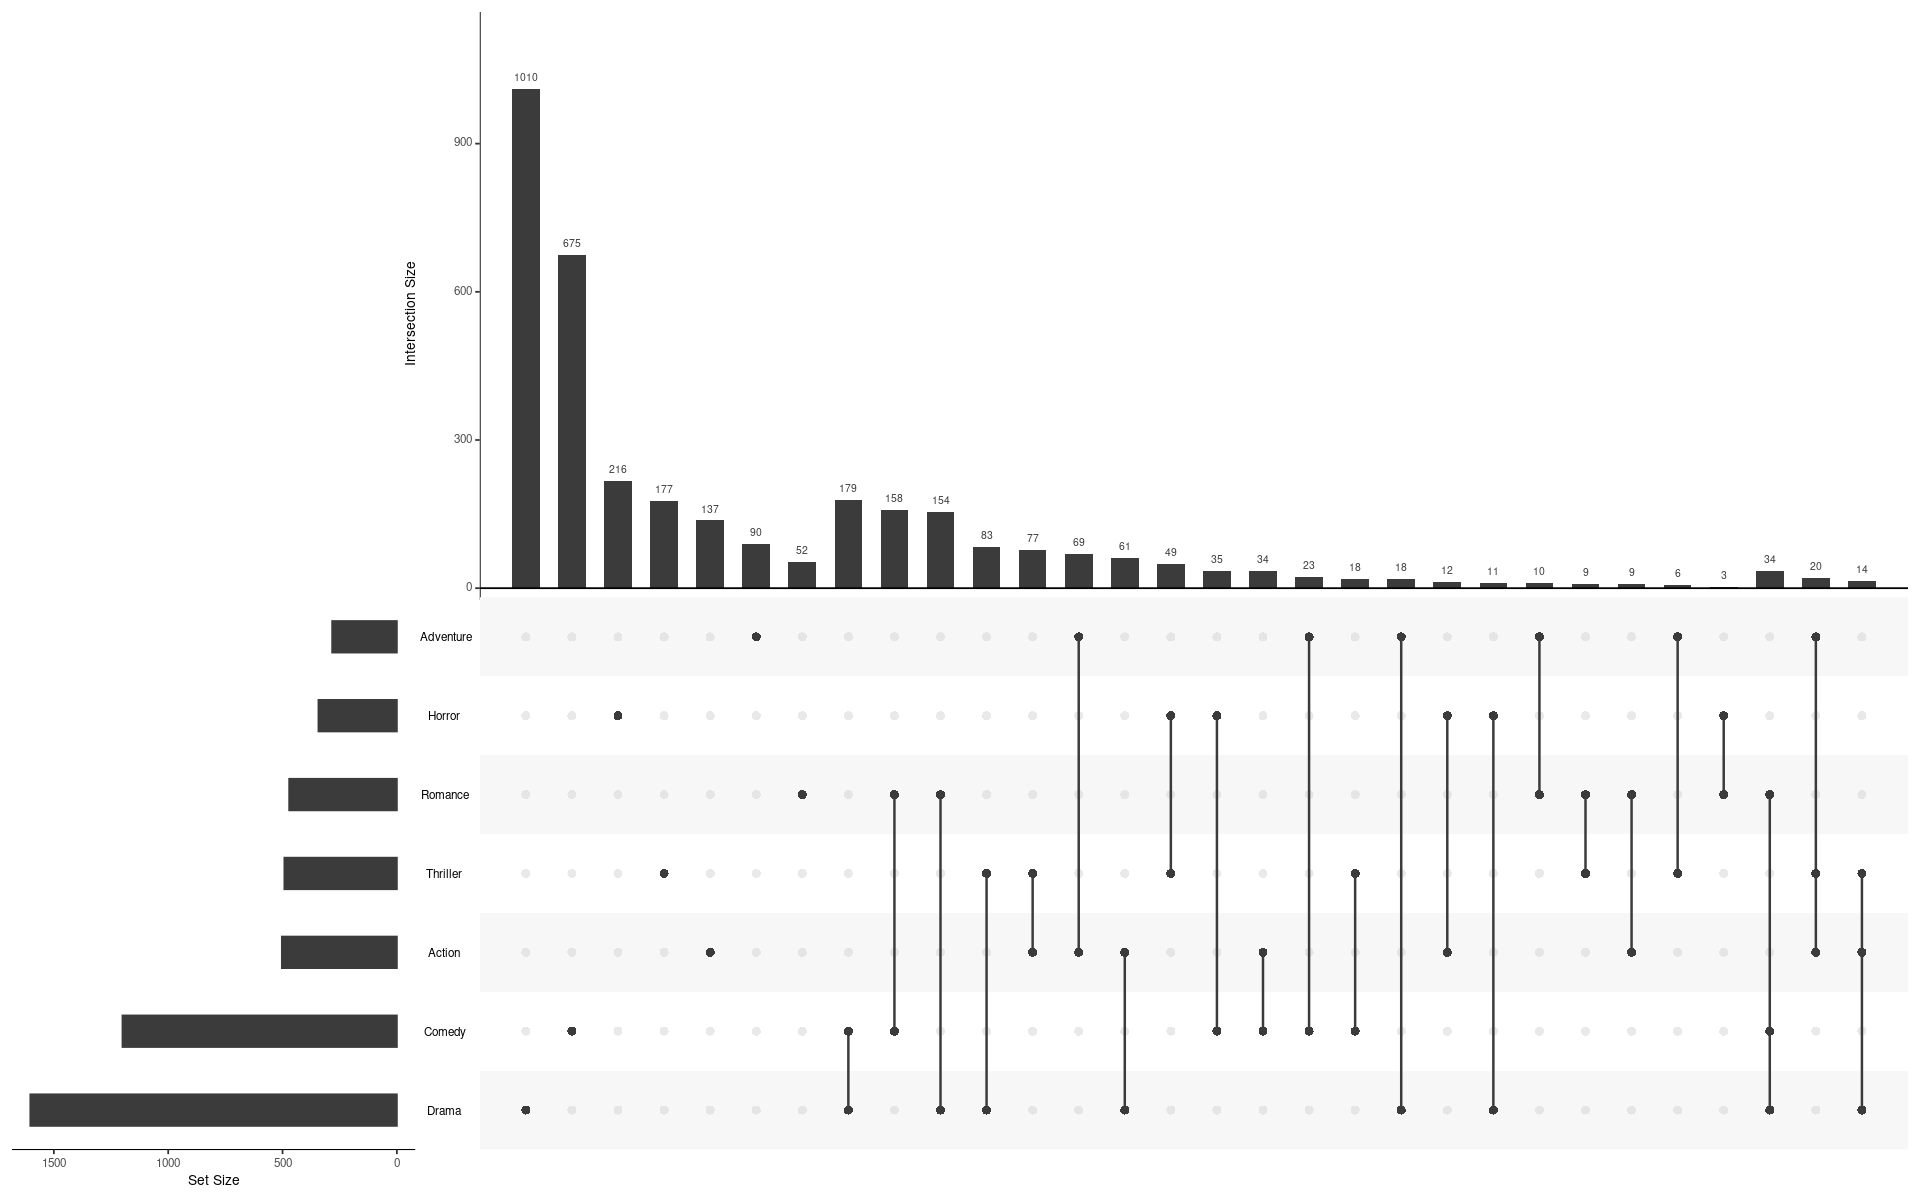

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


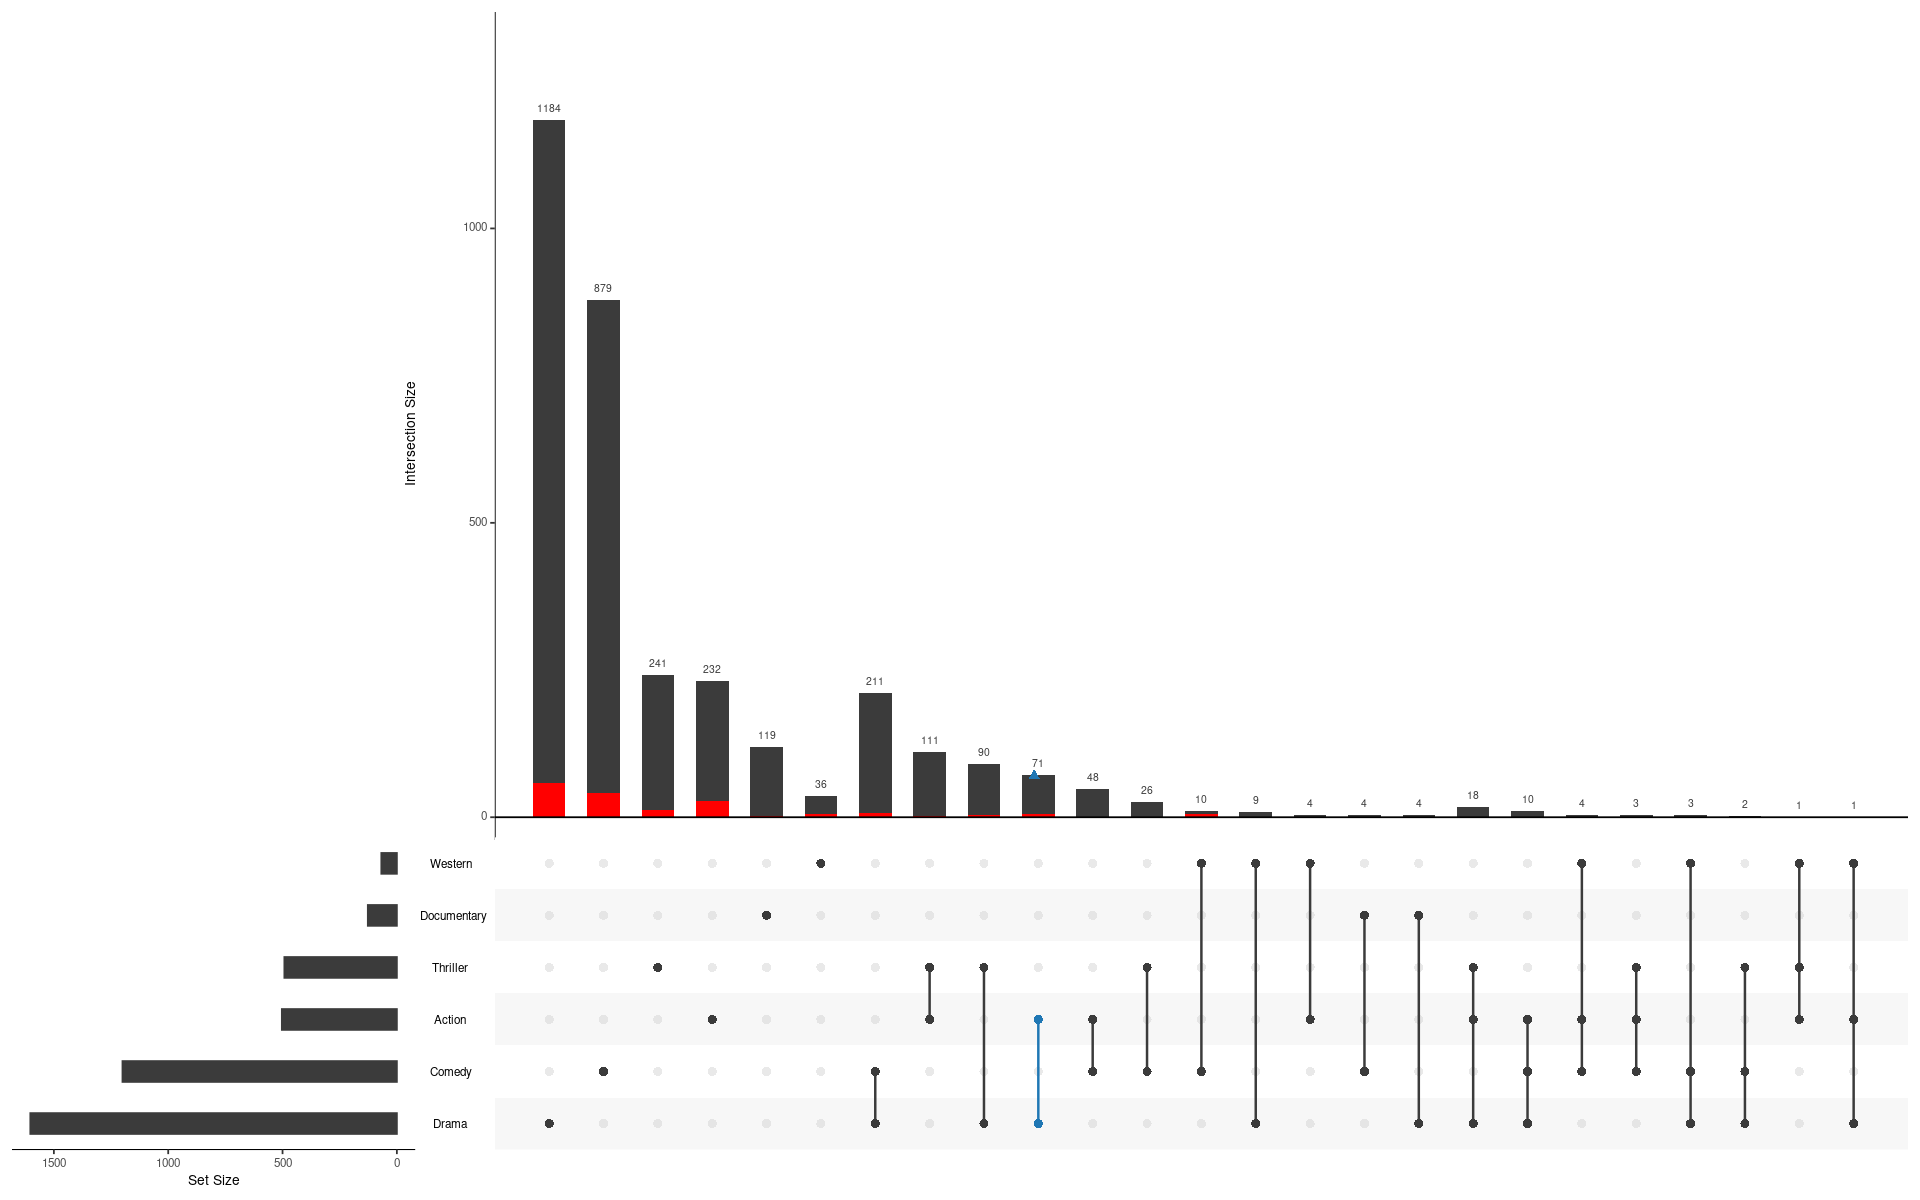

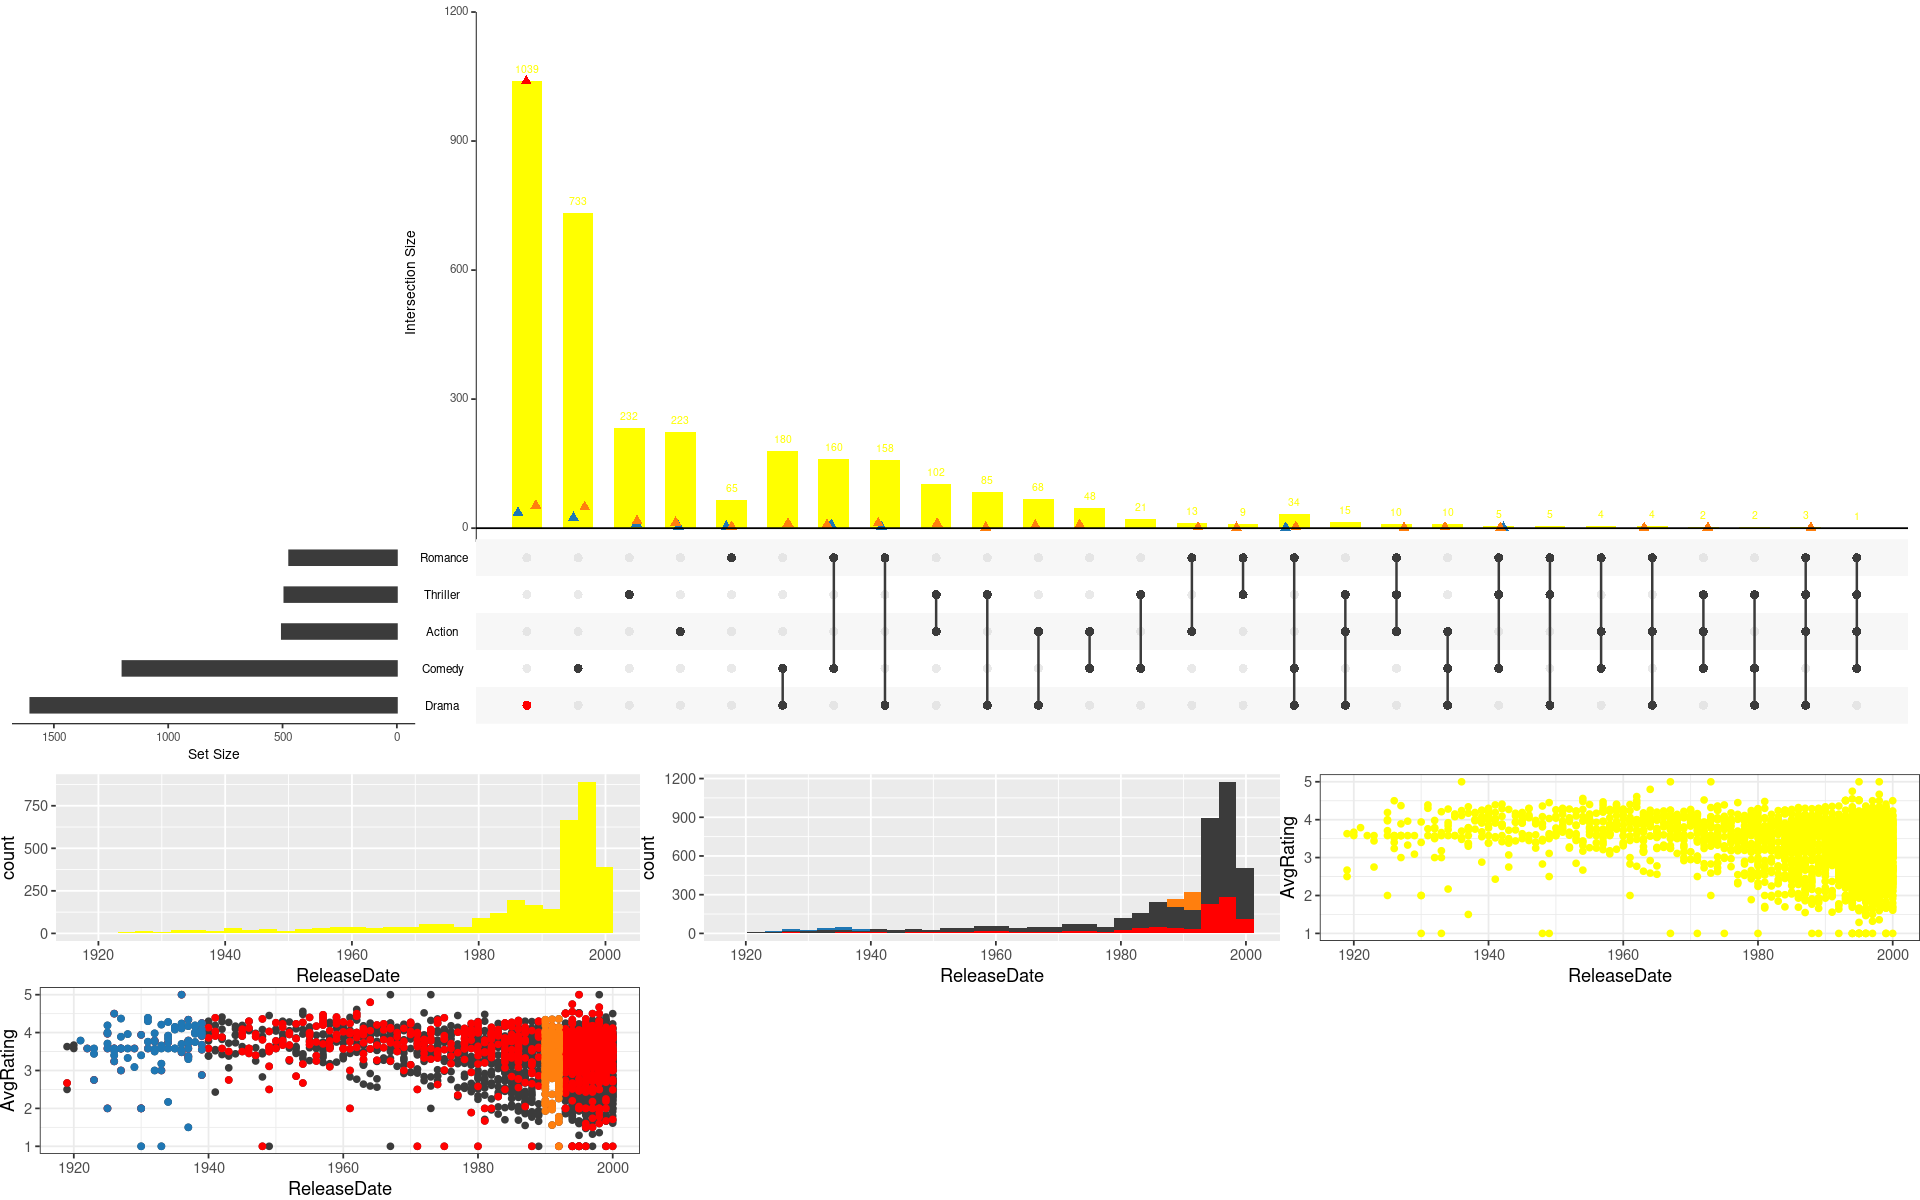

In [115]:
movies <- read.csv( system.file("extdata", "movies.csv", package = "UpSetR"), header=TRUE, sep=";" )

require(ggplot2); require(plyr); require(gridExtra); require(grid);

between <- function(row, min, max){
  newData <- (row["ReleaseDate"] < max) & (row["ReleaseDate"] > min)
}

plot1 <- function(mydata, x){
  myplot <- (ggplot(mydata, aes_string(x= x, fill = "color"))
            + geom_histogram() + scale_fill_identity()
            + theme(plot.margin = unit(c(0,0,0,0), "cm")))
}

plot2 <- function(mydata, x, y){
  myplot <- (ggplot(data = mydata, aes_string(x=x, y=y, colour = "color"), alpha = 0.5)
            + geom_point() + scale_color_identity()
            + theme_bw() + theme(plot.margin = unit(c(0,0,0,0), "cm")))
}

attributeplots <- list(gridrows = 55,
                  plots = list(list(plot = plot1, x= "ReleaseDate",  queries = FALSE),
                         list(plot = plot1, x= "ReleaseDate", queries = TRUE),
                         list(plot = plot2, x = "ReleaseDate", y = "AvgRating", queries = FALSE),
                         list(plot = plot2, x = "ReleaseDate", y = "AvgRating", queries = TRUE)),
                   ncols = 3)

upset(movies, nsets = 7, nintersects = 30, mb.ratio = c(0.5, 0.5),
      order.by = c("freq", "degree"), decreasing = c(TRUE,FALSE))

upset(movies, sets = c("Drama", "Comedy", "Action", "Thriller", "Western", "Documentary"),
      queries = list(list(query = intersects, params = list("Drama", "Action")),
                list(query = between, params = list(1970, 1980), color = "red", active = TRUE)))

upset(movies, attribute.plots = attributeplots,
     queries = list(list(query = between, params = list(1920, 1940)),
                    list(query = intersects, params = list("Drama"), color= "red"),
                    list(query = elements, params = list("ReleaseDate", 1990, 1991, 1992))),
      main.bar.color = "yellow")


# MCMCtreeR

In [1]:
library(MCMCtreeR)

Loading required package: ape

Loading required package: sn

Loading required package: stats4


Attaching package: ‘sn’


The following object is masked from ‘package:stats’:

    sd


Loading required package: coda



In [18]:
phy <- readMCMCtree("FigTree.tre")
MCMCtree.posterior <- read.csv("mcmc.txt", sep="\t")

In [21]:
# Set up the PDF device
pdf("MCMC_tree_plot_0714.pdf", width = 12, height = 10)  # Adjust width and height as needed

# Plot the MCMC tree
MCMC.tree.plot(phy, 
               MCMC.chain = MCMCtree.posterior, 
               cex.tips = .8,           # Increase size of tip labels
               time.correction = 100, 
               plot.type = "phylogram",
               cex.age = 1,            # Increase size of age labels
               cex.labels = .8,         # Increase size of other labels
               relative.height = 0.05,    # Adjust relative height of density distributions
              # all.nodes = 110,
              # col.age = "#ff000040",
               node.method = "bar", 
               col.age = "navy",
               lwd.bar = 2,
               col.tree = "grey40", 
               scale.res = c("Eon", "Period"), 
               no.margin = TRUE,
               density.col = "blue", 
               density.border.col = "#00000080",
               label.offset = 1)

# Close the PDF device
dev.off()


png 
  2

In [ ]:
MCMC.tree.plot(phy, analysis.type = "MCMCtree", cex.tips = 0.2, 
    time.correction = 100, plot.type = "phylogram", lwd.bar = 2, 
    scale.res = c("Eon", "Period"), node.method = "bar", col.age = "navy", 
    no.margin = TRUE, label.offset = 4)

MCMC.tree.plot(phy, analysis.type = "MCMCtree", cex.tips = 0.2, 
    time.correction = 100, plot.type = "phylogram", lwd.bar = 2, 
    scale.res = c("Eon", "Period"), node.method = "node.length", 
    col.age = "#008b0040", no.margin = TRUE, label.offset = 4)

MCMC.tree.plot(phy, analysis.type = "MCMCtree", cex.tips = 0.2, 
    time.correction = 100, plot.type = "phylogram", lwd.bar = 2, 
    scale.res = c("Eon", "Period"), node.method = "full.length", 
    all.nodes = 110, col.age = "#ff000040", no.margin = TRUE, 
    label.offset = 4)

# PIC test

### without outgroup

In [9]:
tree


Phylogenetic tree with 52 tips and 51 internal nodes.

Tip labels:
  Rhizopus_microsporus_ATCC11559, Mucor_mucedo_NRRL3635, Trametopsis_cervina_CIRMBRFM1824, Cytidiella_melzeri_FP_102339, Irpex_rosettiformis_CBS_384_51, Irpex_flavus_38, ...

Rooted; includes branch lengths.

In [14]:
# Load necessary libraries
library(ape)
library(phangorn)
library(dplyr)
library(readr)

# Load the phylogenetic tree
tree_file_path <- "concat_nooutgroup_rooted.contree"
tree <- read.tree(tree_file_path)

# Load the traits data
traits_file_path <- "AmbrosiaFungiGenomeFeature_sub.csv"
traits_data <- read_csv(traits_file_path)

# Remove outgroup
# traits_data <- traits_data %>% filter(Ambrosia != "outgroup")

# Create a combined column that matches the format expected in the tree labels
traits_data$combined_name <- paste(traits_data$FungusName, traits_data$Strain, sep="_")

# Ensure that the species names in traits match the tree
traits_data$species <- factor(traits_data$combined_name, levels=tree$tip.label)

# Create the Ambrosia predictor
ambrosia_predictor <- ifelse(traits_data$Ambrosia == 'Y', 1, 0)

# Compute Phylogenetically Independent Contrasts for multiple traits
traits_list <- c('Genome_size', 'TE_CoverageTotal', 'Num_Gene', 'Secret_protein', 
                 'GC_Genome', 'Num_Contig', 'TE_CoverageTotal_Mbp', 'Num_RIP_Win', 
                 'RIP_Gen_Prop', 'LRAR_Count', 'Avg_LRAR_Size', 'Avg_LRAR_GC', 'LRAR_Gen_Prop', 
                 'LRAR_Prod_Val', 'LRAR_Sub_Val', 'LRAR_Comp_Val')

# Initialize a list to store PIC results
pic_results <- list()

# Loop through each trait and compute PIC, storing results
for(trait in traits_list) {
  if(all(!is.na(traits_data[[trait]]))) {  # check if there are no missing values for the trait
    pic_results[[trait]] <- pic(traits_data[[trait]], tree)
  }
}

# Function to match node contrasts with predictor values
match_pic_to_predictor <- function(pic_values, tree, predictor) {
  node_values <- pic_values
  internal_nodes <- (length(tree$tip.label) + 1):(length(tree$tip.label) + length(node_values))
  
  predictor_aligned <- numeric(length(node_values))
  
  for (i in 1:length(node_values)) {
    node <- internal_nodes[i]
    descendants <- Descendants(tree, node, type = "tips")[[1]]
    predictor_values <- predictor[descendants]
    predictor_aligned[i] <- mean(predictor_values)
  }
  
  return(predictor_aligned)
}

# Align the predictor values with the PIC results
aligned_predictor <- lapply(pic_results, match_pic_to_predictor, tree = tree, predictor = ambrosia_predictor)

# Convert the PIC results to a data frame for analysis
pic_data <- do.call(cbind, lapply(pic_results, function(x) as.numeric(x)))
pic_data <- as.data.frame(pic_data)
colnames(pic_data) <- traits_list

# Convert the aligned predictor to a data frame
aligned_predictor_df <- as.data.frame(do.call(cbind, aligned_predictor))
colnames(aligned_predictor_df) <- paste0(traits_list, "_predictor")

# Combine the PIC data and aligned predictor data
combined_data <- cbind(pic_data, aligned_predictor_df)

# Fit a linear model for each trait and store the results
lm_results <- list()

for(trait in traits_list) {
  trait_predictor <- paste0(trait, "_predictor")
  lm_results[[trait]] <- summary(lm(combined_data[[trait]] ~ combined_data[[trait_predictor]]))
}

# Summarize the linear model results for each trait
summary_results <- data.frame(
  Trait = character(),
  Predictor = character(),
  Estimate = numeric(),
  StdError = numeric(),
  tValue = numeric(),
  pValue = numeric(),
  stringsAsFactors = FALSE
)

for(trait in traits_list) {
  trait_predictor <- paste0(trait, "_predictor")
  lm_summary <- lm_results[[trait]]
  summary_results <- rbind(summary_results, data.frame(
    Trait = trait,
    Predictor = trait_predictor,
    Estimate = lm_summary$coefficients[2, "Estimate"],
    StdError = lm_summary$coefficients[2, "Std. Error"],
    tValue = lm_summary$coefficients[2, "t value"],
    pValue = lm_summary$coefficients[2, "Pr(>|t|)"]
  ))
}

# Print the summarized results
summary_results

# Save the summary results to a CSV file
write_csv(summary_results, "Ambrosia_feature_PIC_no_outgroup_summary_results.csv")


Rows: 51 Columns: 41
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): FungusName, Strain, FungusName_Strain, BeetleAssociate, Beetle_Evo...
dbl (27): Genome_size, TE_CoverageTotal, TE_CoverageTotal_Mbp, Num_Gene, Num...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Trait                Predictor                      Estimate     
1  Genome_size          Genome_size_predictor          -1.646259e+07
2  TE_CoverageTotal     TE_CoverageTotal_predictor     -2.786144e+00
3  Num_Gene             Num_Gene_predictor             -3.625355e+03
4  Secret_protein       Secret_protein_predictor       -1.784073e+03
5  GC_Genome            GC_Genome_predictor            -6.027752e+00
6  Num_Contig           Num_Contig_predictor           -1.888343e+02
7  TE_CoverageTotal_Mbp TE_CoverageTotal_Mbp_predictor  6.296830e+05
8  Num_RIP_Win          Num_RIP_Win_predictor          -2.195213e+03
9  RIP_Gen_Prop         RIP_Gen_Prop_predictor         -2.239753e+00
10 LRAR_Count           LRAR_Count_predictor           -7.569487e+01
11 Avg_LRAR_Size        Avg_LRAR_Size_predictor        -5.055798e+03
12 Avg_LRAR_GC          Avg_LRAR_GC_predictor          -7.872002e+00
13 LRAR_Gen_Prop        LRAR_Gen_Prop_predictor        -6.074930e+05
14 LRAR_Prod_Val        LRAR_Prod_Val_predictor        -1.020260e+00
15 LRAR_Sub_Val         LRAR_Sub_Val_predictor          7.596817e-03
16 LRAR_Comp_Val        LRAR_Comp_Val_predictor        -1.027053e+00
   StdError     tValue      pValue     
1  9.832881e+06 -1.67423834 0.100588580
2  7.430002e+00 -0.37498561 0.709322988
3  3.964137e+03 -0.91453833 0.365005459
4  1.484616e+03 -1.20170717 0.235372599
5  4.884552e+00 -1.23404418 0.223194533
6  9.061576e+02 -0.20839012 0.835806130
7  8.413511e+05  0.74841883 0.457859208
8  7.656821e+02 -2.86700310 0.006137075
9  8.163549e-01 -2.74360171 0.008519816
10 2.792445e+01 -2.71070194 0.009285802
11 3.287379e+03 -1.53794191 0.130629437
12 1.208671e+01 -0.65129404 0.517962829
13 2.258860e+05 -2.68937831 0.009815597
14 6.842820e-01 -1.49099353 0.142506153
15 1.947943e-01  0.03899919 0.969052793
16 5.522073e-01 -1.85990523 0.069032763

### with outgroup

In [74]:
# Load necessary libraries
library(ape)
library(phangorn)
library(dplyr)
library(readr)

# Load the phylogenetic tree
tree_file_path <- "concat_rooted.contree"
tree <- read.tree(tree_file_path)

# Load the traits data
traits_file_path <- "AmbrosiaFungiGenomeFeature.csv"
traits_data <- read_csv(traits_file_path)

# Create a combined column that matches the format expected in the tree labels
traits_data$combined_name <- paste(traits_data$FungusName, traits_data$Strain, sep="_")

# Ensure that the species names in traits match the tree
traits_data$species <- factor(traits_data$combined_name, levels=tree$tip.label)

# Create the Ambrosia predictor
ambrosia_predictor <- ifelse(traits_data$Ambrosia == 'Y', 1, 0)

# List of all potential traits
all_traits_list <- c('Genome_size', 'TE_CoverageTotal', 'Num_Gene', 'TE_CoverageTotal_Mbp', 
                 'GC_Genome', 'Num_Contig', 'Secret_protein', 'Num_RIP_Win')
                     # , 
                 # 'RIP_Gen_Prop', 'LRAR_Count', 'Avg_LRAR_Size', 'Avg_LRAR_GC', 'LRAR_Gen_Prop', 
                 # 'LRAR_Prod_Val', 'LRAR_Sub_Val', 'LRAR_Comp_Val')

# Filter traits to only include those with complete data
valid_traits <- all_traits_list[sapply(all_traits_list, function(trait) all(!is.na(traits_data[[trait]])))]

# Compute Phylogenetically Independent Contrasts for valid traits
pic_results <- lapply(valid_traits, function(trait) pic(traits_data[[trait]], tree))
names(pic_results) <- valid_traits

# Function to match node contrasts with predictor values
match_pic_to_predictor <- function(pic_values, tree, predictor) {
  node_values <- pic_values
  internal_nodes <- (length(tree$tip.label) + 1):(length(tree$tip.label) + length(node_values))
  
  predictor_aligned <- numeric(length(node_values))
  
  for (i in 1:length(node_values)) {
    node <- internal_nodes[i]
    descendants <- Descendants(tree, node, type = "tips")[[1]]
    predictor_values <- predictor[descendants]
    predictor_aligned[i] <- mean(predictor_values)
  }
  
  return(predictor_aligned)
}

# Align the predictor values with the PIC results
aligned_predictor <- lapply(pic_results, match_pic_to_predictor, tree = tree, predictor = ambrosia_predictor)

# Convert the PIC results to a data frame for analysis
pic_data <- as.data.frame(do.call(cbind, pic_results))

# Convert the aligned predictor to a data frame
aligned_predictor_df <- as.data.frame(do.call(cbind, aligned_predictor))
colnames(aligned_predictor_df) <- paste0(valid_traits, "_predictor")

# Combine the PIC data and aligned predictor data
combined_data <- cbind(pic_data, aligned_predictor_df)

# Fit a linear model for each trait and store the results
lm_results <- lapply(valid_traits, function(trait) {
  trait_predictor <- paste0(trait, "_predictor")
  summary(lm(combined_data[[trait]] ~ combined_data[[trait_predictor]]))
})
names(lm_results) <- valid_traits

# Summarize the linear model results for each trait
summary_results <- do.call(rbind, lapply(valid_traits, function(trait) {
  trait_predictor <- paste0(trait, "_predictor")
  lm_summary <- lm_results[[trait]]
  data.frame(
    Trait = trait,
    Predictor = trait_predictor,
    Estimate = lm_summary$coefficients[2, "Estimate"],
    StdError = lm_summary$coefficients[2, "Std. Error"],
    tValue = lm_summary$coefficients[2, "t value"],
    pValue = lm_summary$coefficients[2, "Pr(>|t|)"]
  )
}))

# Print the summarized results
print(summary_results)

# Save the summary results to a CSV file
write_csv(summary_results, "Ambrosia_feature_PIC_summary_results.csv")

Rows: 70 Columns: 45
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (18): FungusName, Strain, FungusName_Strain, BeetleAssociate, Beetle_Evo...
dbl (27): Genome_size, TE_CoverageTotal, TE_CoverageTotal_Mbp, Num_Gene, Num...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


                 Trait                      Predictor      Estimate
1          Genome_size          Genome_size_predictor  1.127566e+07
2     TE_CoverageTotal     TE_CoverageTotal_predictor  9.526707e-01
3             Num_Gene             Num_Gene_predictor  1.695119e+03
4 TE_CoverageTotal_Mbp TE_CoverageTotal_Mbp_predictor -3.900870e+05
5            GC_Genome            GC_Genome_predictor  2.975493e+00
6           Num_Contig           Num_Contig_predictor  3.064535e+02
7       Secret_protein       Secret_protein_predictor  5.699736e+02
      StdError     tValue    pValue
1 1.070380e+07  1.0534257 0.2959302
2 4.614355e+00  0.2064580 0.8370593
3 3.883808e+03  0.4364580 0.6639078
4 9.432147e+05 -0.4135718 0.6805086
5 3.148014e+00  0.9451970 0.3479546
6 1.331530e+03  0.2301515 0.8186753
7 1.265221e+03  0.4504932 0.6538093


# Dendrogram comparison supertree vs supermatrix

In [303]:
library(ape)
library(data.table)

tre <- read.tree('ambrosia_fungi_astral_rooted.tre')
stopifnot(is.binary(tre))
stopifnot(is.rooted(tre))

if(is.ultrametric(tre)) {
    utre <- tre
} else{
    utre <- chronos(tre)
}
write.tree(utre, 'ambrosia_fungi_astral_rooted_ultra.tre')



Setting initial dates...
Fitting in progress... get a first set of estimates
         (Penalised) log-lik = -16460.71 
Optimising rates... dates... -16460.71 
Optimising rates... dates... -32.71322 
Optimising rates... dates... -32.33615 
Optimising rates... dates... -32.33373 
Optimising rates... dates... -32.32958 
Optimising rates... dates... -31.9785 
Optimising rates... dates... -31.97756 
Optimising rates... dates... -31.97755 
Optimising rates... dates... -31.97749 
Optimising rates... dates... -31.97749 


Warning message:
“function evaluation limit reached without convergence (9)”



log-Lik = -30.23359 
PHIIC = 420.1 


In [72]:
library(ape)
library(data.table)

tre <- read.tree('concat_rooted.contree')
stopifnot(is.binary(tre))
stopifnot(is.rooted(tre))

if(is.ultrametric(tre)) {
    utre <- tre
} else{
    utre <- chronos(tre)
}
write.tree(utre, 'concat_rooted_ultra.contree')



Setting initial dates...
Fitting in progress... get a first set of estimates
         (Penalised) log-lik = -43.47382 
Optimising rates... dates... -43.47382 
Optimising rates... dates... -43.47377 

log-Lik = -43.41894 
PHIIC = 499.75 


In [73]:
# Load necessary libraries
library(ape)
library(dendextend)

# Read the phylogenetic trees from Newick format
tree1 <- read.tree("concat_rooted_ultra.contree")
tree2 <- read.tree("ambrosia_fungi_astral_rooted_ultra.tre")

# Convert trees to dendrograms
dend1 <- as.dendrogram(as.hclust.phylo(tree1))
dend2 <- as.dendrogram(as.hclust.phylo(tree2))

# # Plot the trees with increased font size and better styling
# par(mfrow = c(1, 2), mar = c(5, 4, 4, 2) + 0.1, cex.main = 1.5, cex.lab = 1.5, cex.axis = 1.2)
# plot(dend1, main = "Tree 1", cex = 1.2)
# plot(dend2, main = "Tree 2", cex = 1.2)

# Calculate the cophenetic correlation
cor_cophenetic <- cor_cophenetic(dend1, dend2)
print(paste("Cophenetic correlation:", cor_cophenetic))



pdf("supermatrix_vs_supertree.pdf", width = 10, height = 7)
# Compare the trees using tanglegram with improved styling
tanglegram(dend1, dend2, 
           main_left = "Concatenated supermatrix", 
           main_right = "Astral supertree", 
           common_subtrees_color_lines = TRUE, 
           highlight_distinct_edges = TRUE, 
           highlight_branches_lwd = FALSE,
           margin_inner = 11,
           cex_main = 2, 
           lab.cex = .7)

# Close the PDF device
dev.off()

Registered S3 methods overwritten by 'dendextend':
  method       from   
  rev.hclust   vegan  
  text.pvclust pvclust


---------------------
Welcome to dendextend version 1.17.1
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:phytools’:

    untangle


The following object is masked from ‘package:data.table’:

    set


The following object is masked from ‘package:permute’:

    shuffle


The following objects are masked from ‘package:ap

ERROR: Error in cor(dist_dend1, dist_dend2, method = method_coef): incompatible dimensions


# phylosignal

In [38]:
library(phylosignal)
library(adephylo)
library(ape)
library(phylobase)
data(carni19)


Attaching package: ‘phylosignal’


The following object is masked from ‘package:lattice’:

    dotplot


Loading required package: ade4


Attaching package: ‘phylobase’


The following object is masked from ‘package:phytools’:

    readNexus


The following object is masked from ‘package:ape’:

    edges




In [71]:
# Load the phylogenetic tree
tree <- read.tree("concat_rooted.contree")

# Load the traits data
traits_data <- read.csv("AmbrosiaFungiGenomeFeature.csv")

# Create a combined column that matches the format expected in the tree labels
traits_data$combined_name <- paste(traits_data$FungusName, traits_data$Strain, sep="_")

# Filter out rows where Ambrosia is 'outgroup'
#traits_data <- traits_data[traits_data$Ambrosia != "outgroup",]

# Ensure that the species names in traits match the tree
traits_data$species <- factor(traits_data$combined_name, levels=tree$tip.label)

# Set the species as row names
row.names(traits_data) <- traits_data$species

# Drop the species column since it's now the row names
traits_data <- traits_data[, setdiff(names(traits_data), 'species')]

# Define the list of traits to keep
traits_list <- c('Genome_size', 'TE_CoverageTotal', 'TE_CoverageTotal_Mbp', 'Num_Gene', 
                 'GC_Genome',  'Secret_protein')

# traits_list <- c('Genome_size', 'TE_CoverageTotal', 'TE_CoverageTotal_Mbp', 'Num_Gene', 
#                  'GC_Genome', 'Num_Contig', 'Secret_protein', 'Num_RIP_Win', 
#                  'RIP_Gen_Prop', 'LRAR_Count', 'Avg_LRAR_Size', 'Avg_LRAR_GC', 'LRAR_Gen_Prop', 
#                  'LRAR_Prod_Val', 'LRAR_Sub_Val', 'LRAR_Comp_Val')

# Keep only the columns listed in traits_list
traits_data <- traits_data[, traits_list]

In [40]:
p4d <- phylo4d(tree, traits_data)

In [41]:
p4d

                                       label node ancestor  edge.length
1                      Mucor_mucedo_NRRL3635    1       63 0.5149889176
2             Rhizopus_microsporus_ATCC11559    2       63 0.2678052258
3               Cytidiella_melzeri_FP_102339    3       66 0.2664454604
4           Trametopsis_cervina_CIRMBRFM1824    4       66 0.2609596760
5             Irpex_rosettiformis_CBS_384_51    5       67 0.1529360768
6                Irpex_subulatus_2021_000012    6       68 0.1742586214
7                   Irpex_flavus_2021_000011    7       69 0.0794827936
8              Irpex_lacteus_CCBASFr23861793    8       70 0.8670493918
9                            Irpex_flavus_38    9       70 0.0308820798
10               Aspergillus_fumigatus_Af293   10       71 0.6822331847
11                    Monilinia_laxa_Mlax316   11       72 0.4615682034
12                 Diaporthe_amygdali_CAA958   12       75 0.4145912305
13            Phaeoacremonium_minimum_UCRPA7   13       75 0.264

ERROR: Error in eval(expr, envir, enclos): object 'carni.lipa' not found


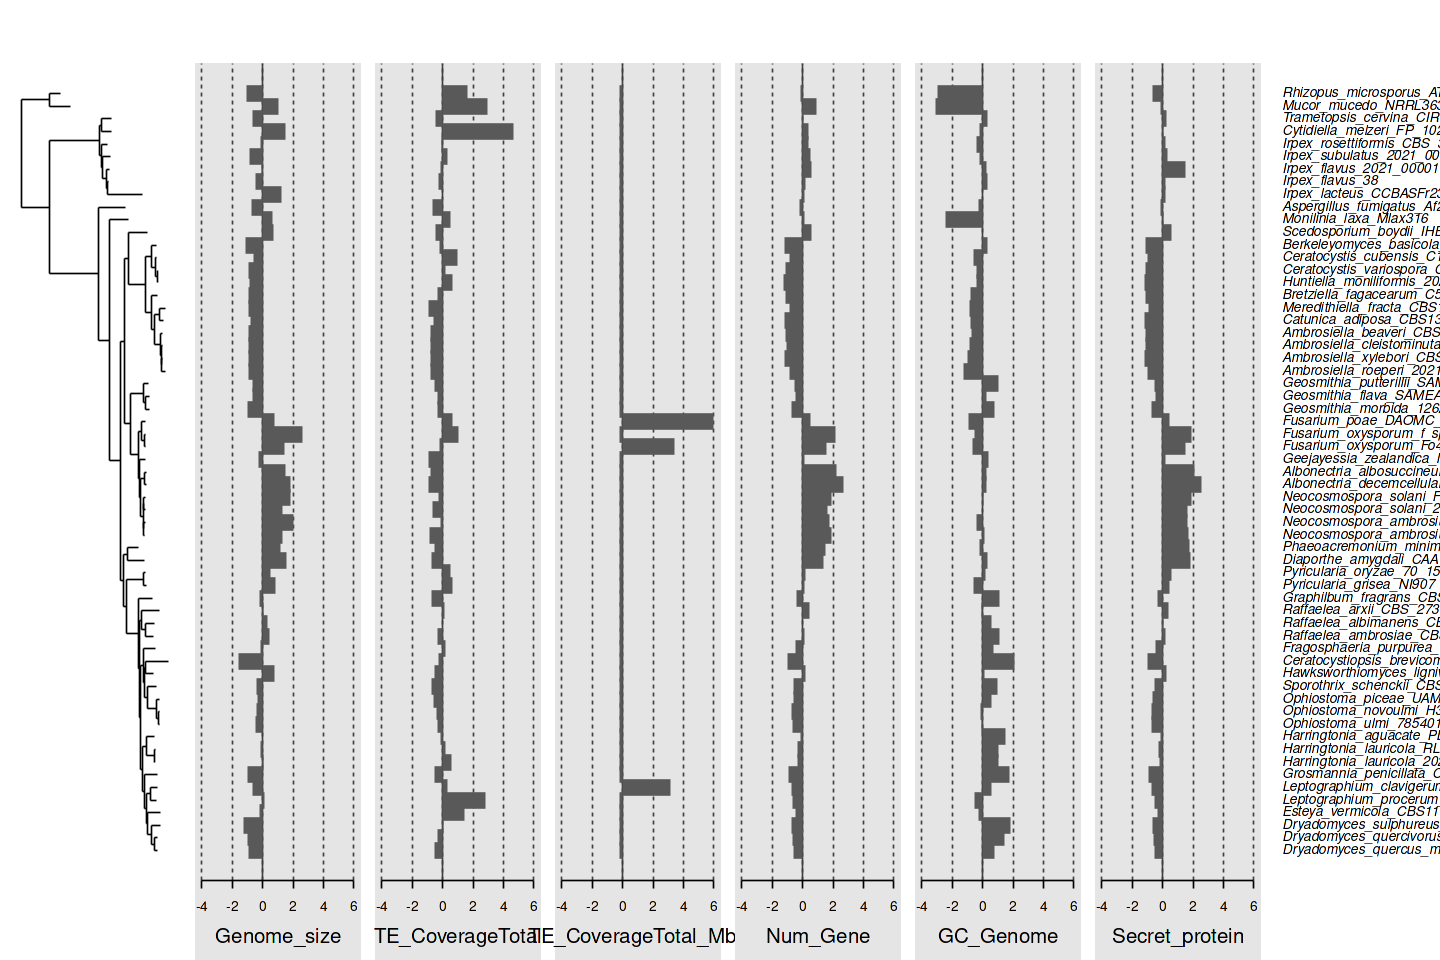

In [42]:
options(repr.plot.width=12, repr.plot.height=8)
# Create the bar plot
barplot.phylo4d(p4d, tree.type = "phylo", tree.ladderize = TRUE)

bar.col=(carni.lipa$p.value < 0.05)

In [43]:
phyloSignal(p4d = p4d, method = "all")

$stat
                         Cmean           I          K    K.star       Lambda
Genome_size          0.4799073 0.263601879 0.16678245 0.3921067 1.008843e+00
TE_CoverageTotal     0.2248023 0.049544443 0.28222761 0.2325256 1.008247e+00
TE_CoverageTotal_Mbp 0.1397222 0.006924339 0.03581823 0.0849431 6.909981e-05
Num_Gene             0.7371525 0.370985168 0.34016820 0.8017299 1.015847e+00
GC_Genome            0.5274963 0.148241602 1.45122891 0.6986534 1.021975e+00
Secret_protein       0.7217363 0.345790105 0.33602875 0.7930707 1.005025e+00

$pvalue
                     Cmean     I     K K.star Lambda
Genome_size          0.001 0.001 0.001  0.001  0.001
TE_CoverageTotal     0.013 0.035 0.003  0.008  0.001
TE_CoverageTotal_Mbp 0.037 0.073 0.625  0.603  1.000
Num_Gene             0.001 0.001 0.001  0.001  0.001
GC_Genome            0.001 0.003 0.001  0.001  0.001
Secret_protein       0.001 0.001 0.001  0.001  0.001

In [44]:
phylosim <- phyloSim(tree = tree, method = "all", nsim = 100, reps = 99)

  |======================================================================| 100%


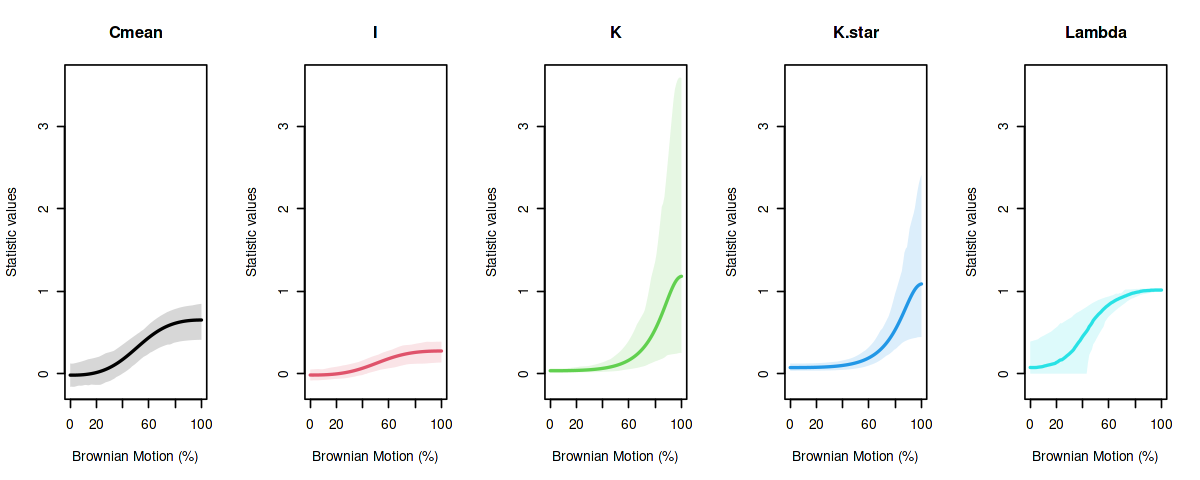

In [45]:
options(repr.plot.width=10, repr.plot.height=4)
plot(phylosim, stacked.methods = FALSE, quantiles = c(0.05, 0.95))

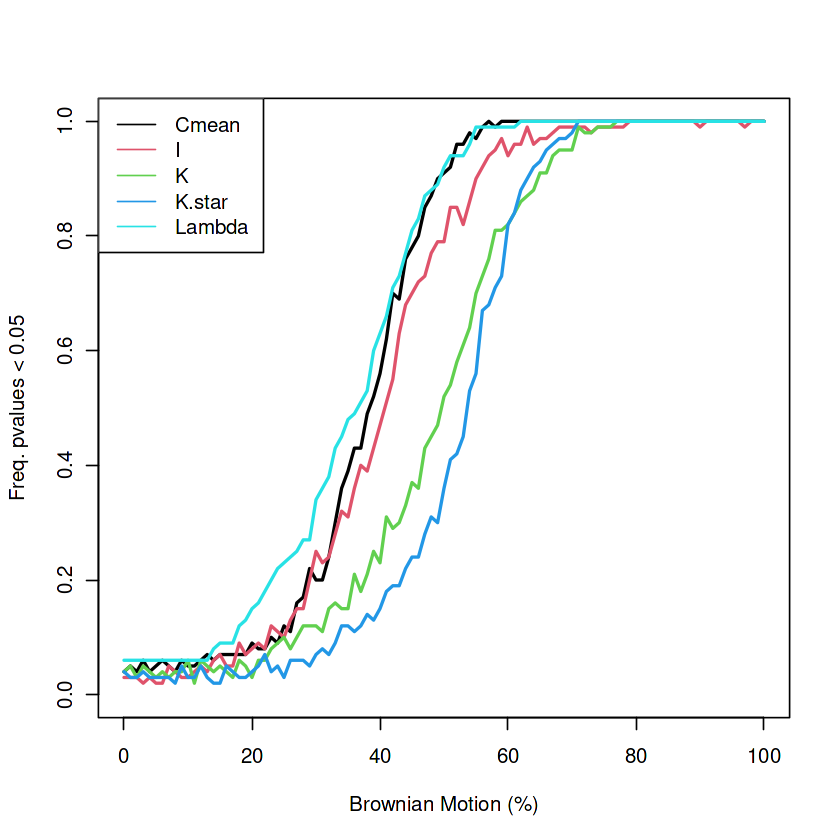

In [46]:
options(repr.plot.width=7, repr.plot.height=7)
plot.phylosim(phylosim, what = "pval", stacked.methods = TRUE)

In [48]:
trait

[1] "LRAR_Comp_Val"

In [49]:
# Load necessary libraries
library(gridExtra)
library(phylosignal)

# Define the list of traits
traits_list <- c('Genome_size', 'TE_CoverageTotal', 'TE_CoverageTotal_Mbp', 'Num_Gene', 
                 'GC_Genome', 'Num_Contig', 'Secret_protein', 'Num_RIP_Win', 
                 'RIP_Gen_Prop', 'LRAR_Count', 'Avg_LRAR_Size', 'Avg_LRAR_GC', 'LRAR_Gen_Prop', 
                 'LRAR_Prod_Val', 'LRAR_Sub_Val', 'LRAR_Comp_Val')

# Initialize an empty list to store the plots
plots <- list()

# Loop through each trait and create a phyloCorrelogram plot
for(trait in traits_list) {
  crlg <- phyloCorrelogram(p4d, trait = trait)
  plot_name <- paste(trait, ".crlg", sep = "")
  
  # Capture the plot with the title
  p <- recordPlot({
    plot(crlg)
    title(main = trait, line = 3)  # Move the title up by specifying the line argument
  })
  
  # Add the plot to the list
  plots[[plot_name]] <- p
}

# Save the plots to a PDF file
pdf("phyloCorrelogram_plots.pdf", width = 14, height = 20)  # Adjust width and height as needed
do.call(grid.arrange, c(plots, ncol = 4))
dev.off()



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [ ]:
options(repr.plot.width=7, repr.plot.height=7)
RIP_Gen_Prop.crlg <- phyloCorrelogram(p4d, trait = "LRAR_Comp_Val")
plot(RIP_Gen_Prop.crlg)

In [55]:
ambtraits.lipa$p.value

Genome_size TE_CoverageTotal
Mucor_mucedo_NRRL3635                    0.828       0.007           
Rhizopus_microsporus_ATCC11559           0.887       0.005           
Cytidiella_melzeri_FP_102339             0.895       0.945           
Trametopsis_cervina_CIRMBRFM1824         0.650       0.930           
Irpex_rosettiformis_CBS_384_51           0.424       0.661           
Irpex_subulatus_2021_000012              0.596       0.169           
Irpex_flavus_2021_000011                 0.466       0.673           
Irpex_lacteus_CCBASFr23861793            0.751       0.557           
Irpex_flavus_38                          0.469       0.781           
Aspergillus_fumigatus_Af293              0.869       0.548           
Monilinia_laxa_Mlax316                   0.048       0.862           
Diaporthe_amygdali_CAA958                0.029       0.030           
Phaeoacremonium_minimum_UCRPA7           0.019       0.043           
Pyricularia_grisea_NI907                 0.249       0.338           
Pyricularia_oryzae_70_15                 0.252       0.282           
Graphilbum_fragrans_CBS_138720           0.303       0.246           
Raffaelea_arxii_CBS_27370                0.438       0.514           
Raffaelea_ambrosiae_CBS18564             0.673       0.352           
Raffaelea_albimanens_CBS_27170           0.544       0.408           
Fragosphaeria_purpurea_CBS_133_34        0.271       0.599           
Hawksworthiomyces_lignivorus_CBS_119148  0.865       0.221           
Ceratocystiopsis_brevicomis_CBS_137839   0.257       0.253           
Sporothrix_schenckii_CBS_35936           0.205       0.164           
Ophiostoma_piceae_UAMH_11346             0.254       0.163           
Ophiostoma_ulmi_785401                   0.321       0.272           
Ophiostoma_novoulmi_H327                 0.312       0.258           
Harringtonia_aguacate_PL1004             0.406       0.410           
Harringtonia_lauricola_2021_000003       0.513       0.399           
Harringtonia_lauricola_RL570             0.492       0.390           
Grosmannia_penicillata_CBS_116008        0.077       0.635           
⋮                                        ⋮           ⋮               
Leptographium_clavigerum_kw1407          0.141       0.167           
Esteya_vermicola_CBS115803               0.202       0.838           
Dryadomyces_sulphureus_CBS_38068         0.030       0.449           
Dryadomyces_quercus_mongolicae_KACC44405 0.051       0.546           
Dryadomyces_quercivorus_JCM11526         0.051       0.436           
Scedosporium_boydii_IHEM_23826           0.083       0.012           
Berkeleyomyces_basicola_CMW49352         0.012       0.368           
Ceratocystis_cubensis_C1811              0.076       0.553           
Huntiella_moniliformis_2021_000010       0.092       0.264           
Ceratocystis_variospora_C1843            0.087       0.310           
Bretziella_fagacearum_C519               0.011       0.071           
Catunica_adiposa_CBS136_34               0.025       0.029           
Meredithiella_fracta_CBS142645           0.021       0.019           
Ambrosiella_beaveri_CBS121753            0.028       0.023           
Ambrosiella_cleistominuta_CBS141682      0.033       0.022           
Ambrosiella_roeperi_2021_000006          0.019       0.022           
Ambrosiella_xylebori_CBS11061            0.028       0.022           
Geosmithia_putterillii_SAMEA104137031    0.682       0.093           
Geosmithia_morbida_1262                  0.699       0.183           
Geosmithia_flava_SAMEA104137030          0.500       0.190           
Fusarium_poae_DAOMC_252244               0.001       0.905           
Fusarium_oxysporum_Fo47                  0.001       0.721           
Fusarium_oxysporum_f_sp_lycopersici_4287 0.001       0.876           
Geejayessia_zealandica_NRRL_22465        0.905       0.026           
Albonectria_decemcellulare_NRRL_13412    0.001       0.022           
Albonectria_albosuccineum_NRRL_20459     0.001     

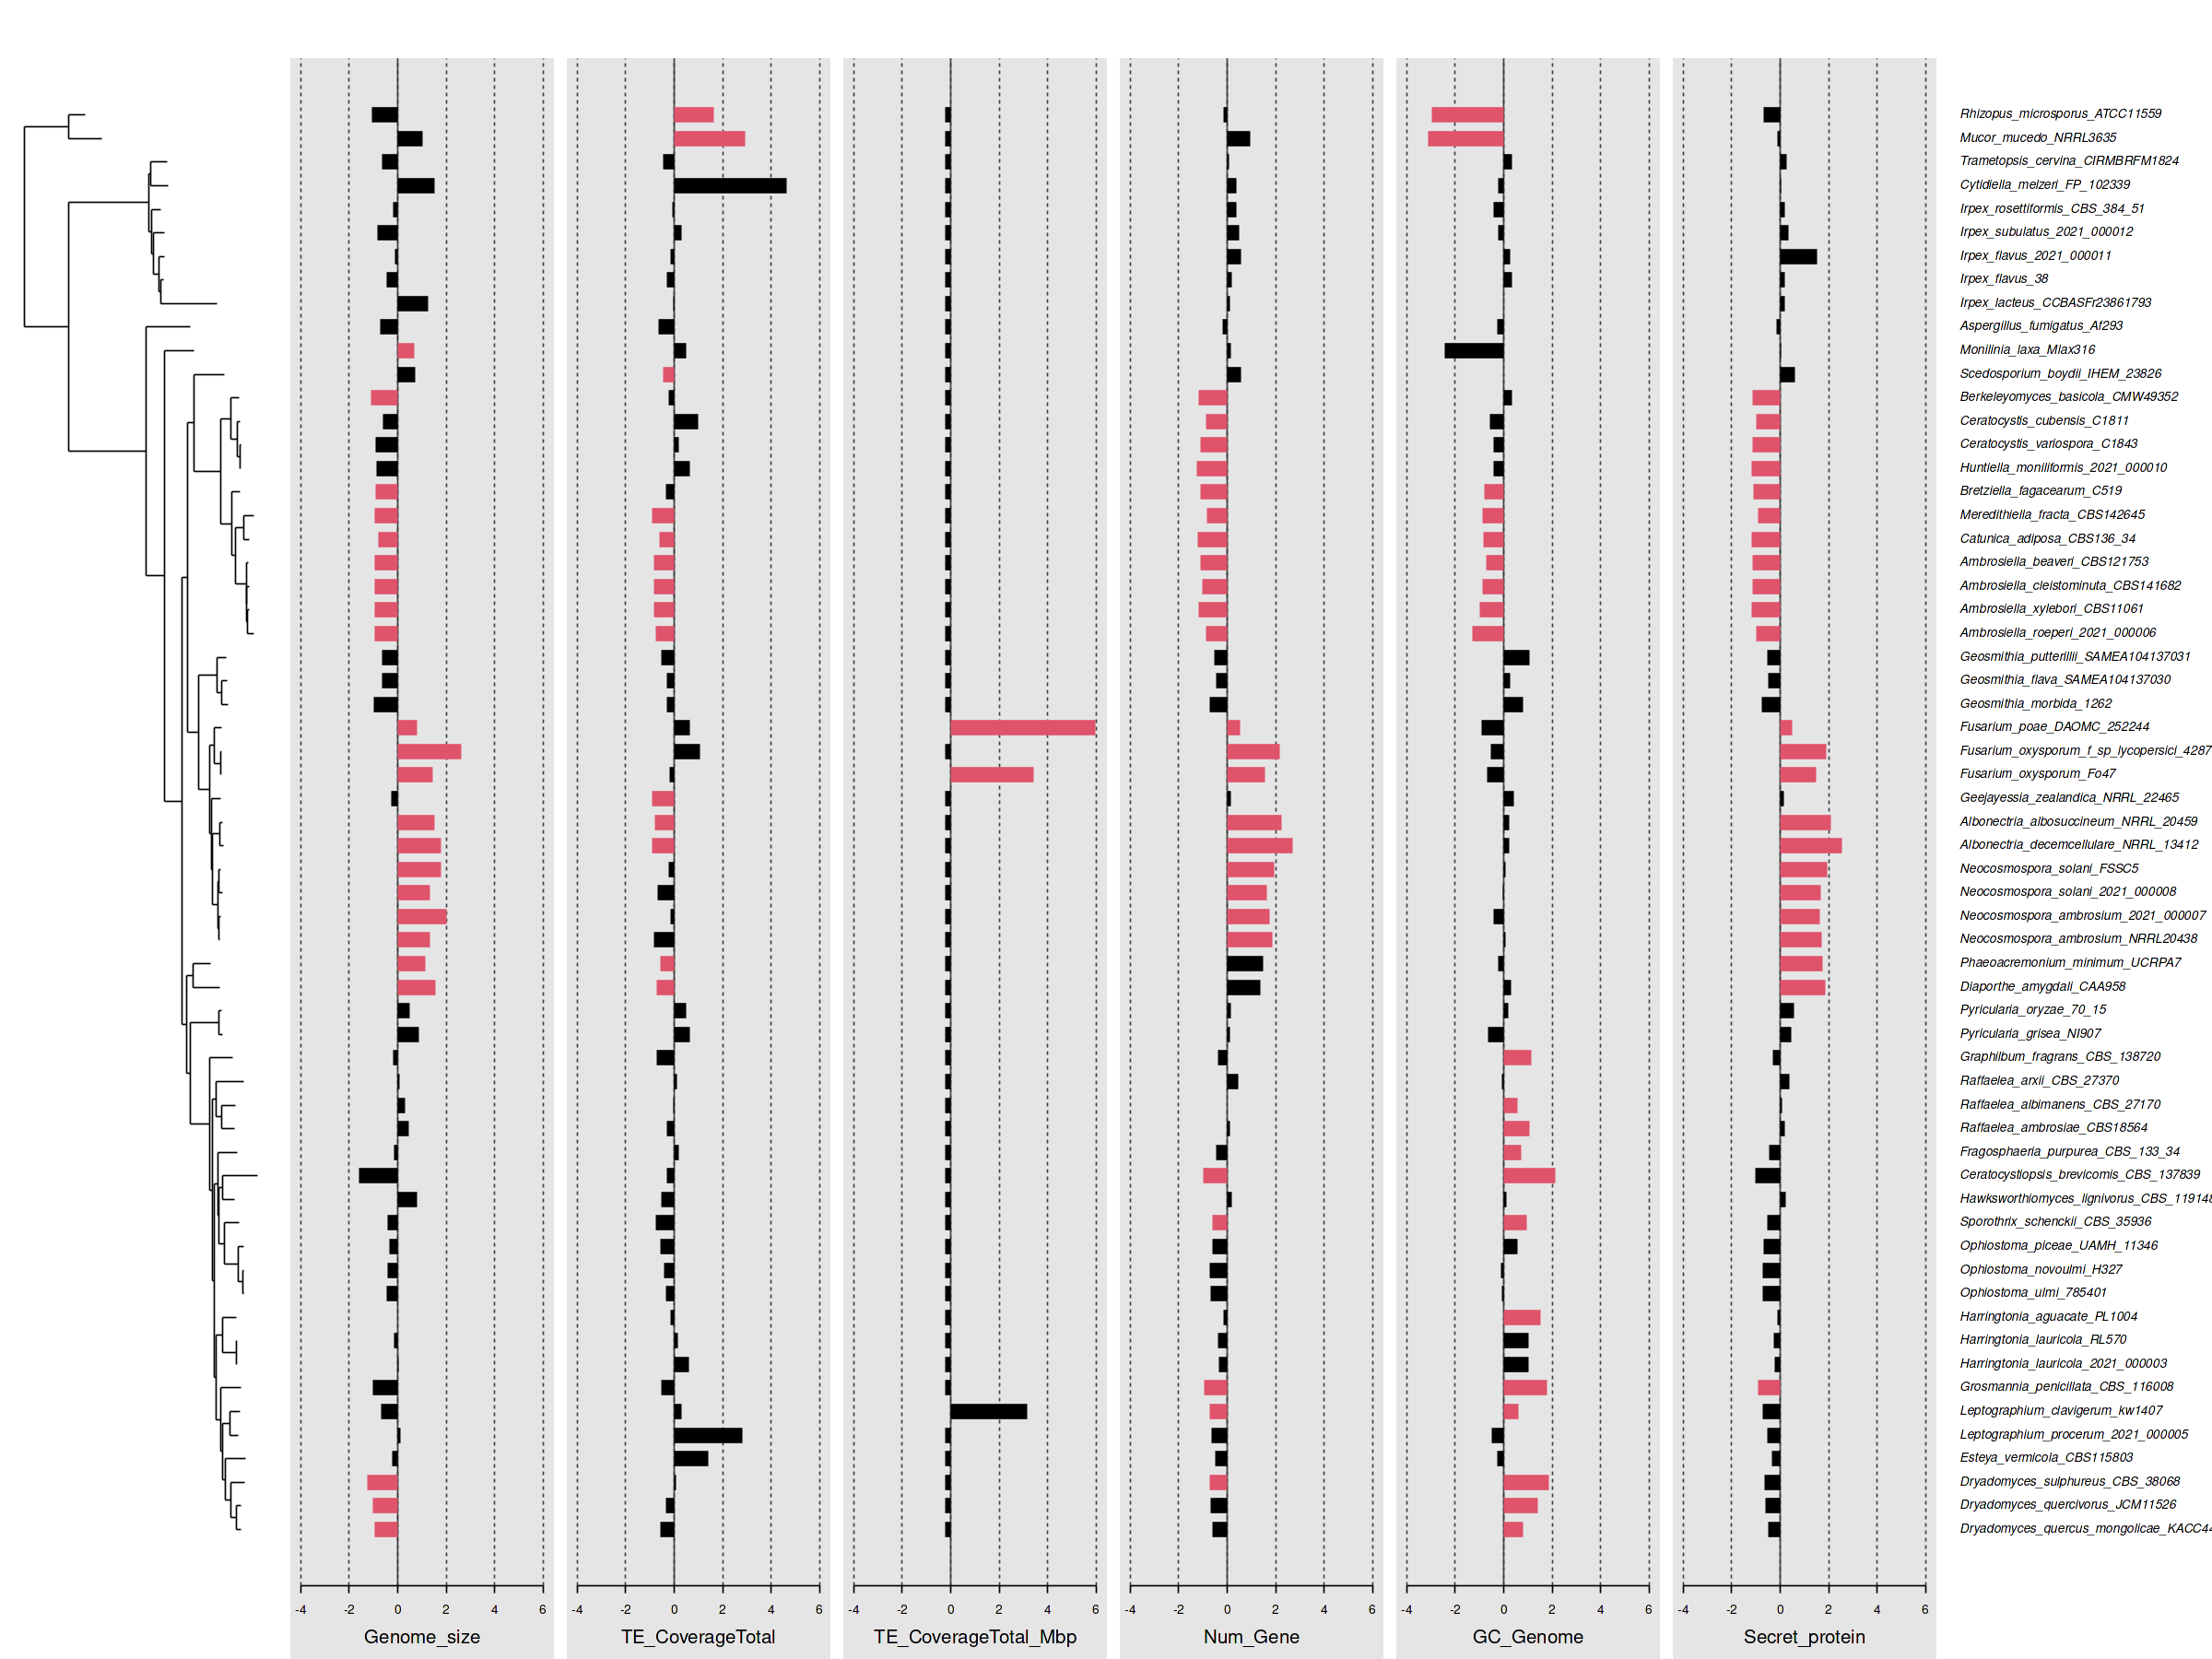

In [56]:
options(repr.plot.width=20, repr.plot.height=15)
ambtraits.lipa <- lipaMoran(p4d)
ambtraits.lipa.p4d <- lipaMoran(p4d, as.p4d = TRUE)

barplot.phylo4d(p4d, bar.col=(ambtraits.lipa$p.value < 0.05) + 1, center = TRUE , scale = TRUE, tree.ladderize = TRUE)